In [1]:
!python --version

Python 3.12.1


# ***Closure***

Functions in Python are first-class citizens.
* Pass function as argument
* Assign a function to a variable
* Return a function from another function (nested functions)


Level 0: Understand What the Closure Is
* closure : a nested function which remembers values in its enclosing scope.

Level 1: Distinguish Closures From Nested Functions

* Closure conditions
 * nested function
 * The inner function must use variables defined in its outer function.
 * The outer function must return the inner function.


In [ ]:
def outer_func():
  leader = "LeeCH"

  def print_leader():
    print(leader)

  return print_leader() # Return The Result!, No Closure

f = outer_func()
print(type(f))

LeeCH
<class 'NoneType'>


Level 2: Know How to Get the Enclosed Values
* Every function in Python has a __closure__, which stores all the “remembered” values.


In [ ]:
def outer_func():
  leader = "LeeCH"

  def print_leader():
      print(leader)

  return print_leader

f = outer_func()
print(outer_func.__closure__)
print(f.__closure__)
print(f.__closure__[0].cell_contents)

None
(<cell at 0x7fc7fb6558a0: str object at 0x7fc7f826cdb0>,)
LeeCH


Level 3: Implement a Bug-Free Closure

In [ ]:
def funcs_generator():
  funcs = []
  for i in range(3):
    def f():
      return i * 2
    funcs.append(f) # scope rule에 의해서 동일 함수로 Overwriting
  return funcs

f1, f2, f3 = funcs_generator()
print(f1(), f2(), f3()) # 동일한 i을 공유
print(f1.__closure__[0].cell_contents)
print(f2.__closure__[0].cell_contents)
print(f3.__closure__[0].cell_contents)

4 4 4
2
2
2


In [ ]:
def funcs_generator():
  funcs = []
  for i in range(3):
    def f(j = i):
      return j * 2
    funcs.append(f)
  return funcs

f1, f2, f3 = funcs_generator()
print(f1(), f2(), f3())
print(f1.__closure__) # 로컬 변수 j만 필요
print(f2.__closure__)
print(f3.__closure__)

0 2 4
None
None
None


In [ ]:
def funcs_generator():
  data_arr = [1, 2, 3]
  funcs = []
  for i in range(3):
    def f(j=i):
      return data_arr[j] * 2
    funcs.append(f)
  return funcs

f1, f2, f3 = funcs_generator()
print(f1(), f2(), f3())
print(f1.__closure__[0].cell_contents)
print(f2.__closure__[0].cell_contents)
print(f3.__closure__[0].cell_contents)

2 4 6
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


Level 4: Use Closures Skilfully
* decorators in Python are just extensive applications of closures.
* Use lambda function to simplify the code
* Closures hide private variables more effectively.
 * It’s more difficult to get and change the value of the leader variable in the function f.
 * The leader variable is more “private”.


In [ ]:
def outer_func():
  leader = "LeeCH"
  return lambda _: print(leader)

f = outer_func()
print(outer_func.__closure__)
print(f.__closure__)
print(f.__closure__[0].cell_contents)

None
(<cell at 0x7fc7fb6563b0: str object at 0x7fc7f826cdb0>,)
LeeCH


# ***Decorator***

Level 0 : Decorator - Callable(function, class, method)를 받아서 callable를 반환

Level 1 : Wrap a Function Properly

In [1]:
def add_things(func):
  def wrapper():
    title = func()
    new_title = title + '!!!'
    return new_title
  return wrapper

@add_things # get_title = add_things(get_title)
def get_title():
  return '7 Levels of Using Decorators in Python'

#get_title # <function __main__.add_things.<locals>.wrapper()>
print(get_title())

7 Levels of Using Decorators in Python!!!


Level 2 : Apply Multiple Decorators to a Function

*   order : from the bottom to the top



In [2]:
def add_author(func):
  def wrapper():
    author = 'LeeCH'
    return author + '\n' + func()
  return wrapper

def add_publication(func):
  def wrapper():
    pub = 'Union'
    return pub + '\n' + func()
  return wrapper

@add_publication # get_title = add_publication(get_title)
@add_author # get_title = add_author(get_title)
def get_title():
  return '7 Levels of Using Decorators in Python'

print(get_title())

Union
LeeCH
7 Levels of Using Decorators in Python


Level 3 : Wrap a Function That Receives Arguments

In [3]:
def add_author(func):
  def wrapper(*args, **kwargs):
    author = 'LeeCH'
    return author + '\n' + func(*args, **kwargs)
  return wrapper

@add_author  # get_title = add_author(get_title)
def get_title(title):
  return title

print(get_title('Harry Potter'))

@add_author
def get_many_title(t1, t2):
  return t1 + '\n' + t2

print(get_many_title('Harry Potter 1', 'Harry Potter 2'))

LeeCH
Harry Potter
LeeCH
Harry Potter 1
Harry Potter 2


Level 4: Write a Decorator That Receives Arguments

In [4]:
def add_author_with_name(author):
  def add_author(func):
    def wrapper(*args, **kwargs):
      return author + '\n' + func(*args, **kwargs)
    return wrapper
  return add_author

# get_title = add_author_with_name('J. K. Rowling')(get_title)
@add_author_with_name('J. K. Rowling')
def get_title(title):
  return title

print(get_title('Harry Potter'))

J. K. Rowling
Harry Potter


Level 5 : Keep the Metadata of Original Functions

In [5]:
def add_author(func):
  def wrapper(*args, **kwargs):
    author = 'LeeCH'
    return author + '\n' + func(*args, **kwargs)
  return wrapper

@add_author
def get_title(title):
    """
    A func that receives and returns a title.
    """
    return title

print(get_title.__name__)
print(get_title.__doc__)

wrapper
None


In [6]:
from functools import wraps

def add_author(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    author = 'Yang Zhou'
    return author + '\n' + func(*args, **kwargs)
  return wrapper

@add_author
def get_title(title):
  """
  A function that receives and returns a title string.
  """
  return title

print(get_title.__name__)
print(get_title.__doc__)

get_title

  A function that receives and returns a title string.
  


Level 6 : The Design Philosophy of Decorators
* Keep it simple and stupid. — A design principle noted by the U.S. Navy
* decorator는 멋진 tool일 뿐이다. 남용과 오용은 가독성을 떨어뜨린다.
* 최대 3 layer까지 함수를 decorator하고 그 이상은 하나의 함수로 rework하자


fluent python

In [7]:
%%writefile clockdeco_param.py

import time

DEFAULT_FMT = '[{elapsed:0.8f}s] {name}({args}) -> {result}'

def clock(fmt=DEFAULT_FMT):
  def decorate(func):
    def clocked(*_args):
      t0 = time.perf_counter()
      _result = func(*_args)
      elapsed = time.perf_counter() - t0
      name = func.__name__
      args = ', '.join(repr(arg) for arg in _args)
      result = repr(_result)
      print(fmt.format(**locals()))
      return _result
    return clocked
  return decorate

if __name__ == '__main__':
  @clock()
  def snooze(seconds):
    time.sleep(seconds)

  for i in range(3):
    snooze(.123)



Writing clockdeco_param.py


In [8]:
import time

DEFAULT_FMT = '[{elapsed:0.8f}s] {name}({args}) -> {result}'

def clock(fmt=DEFAULT_FMT):
  def decorate(func):
    def clocked(*_args):
      t0 = time.perf_counter()
      _result = func(*_args)
      elapsed = time.perf_counter() - t0
      name = func.__name__
      args = ', '.join(repr(arg) for arg in _args)
      result = repr(_result)
      print(locals())
      print(fmt.format(**locals()))
      return _result
    return clocked
  return decorate

if __name__ == '__main__':
  @clock()
  def snooze(seconds):
    time.sleep(seconds)

  for i in range(3):
    snooze(.123)

{'_args': (0.123,), 't0': 547.619545365, '_result': None, 'elapsed': 0.1232631529999253, 'name': 'snooze', 'args': '0.123', 'result': 'None', 'fmt': '[{elapsed:0.8f}s] {name}({args}) -> {result}', 'func': <function snooze at 0x7ec6c2a5add0>}
[0.12326315s] snooze(0.123) -> None
{'_args': (0.123,), 't0': 547.74304496, '_result': None, 'elapsed': 0.1232527019999452, 'name': 'snooze', 'args': '0.123', 'result': 'None', 'fmt': '[{elapsed:0.8f}s] {name}({args}) -> {result}', 'func': <function snooze at 0x7ec6c2a5add0>}
[0.12325270s] snooze(0.123) -> None
{'_args': (0.123,), 't0': 547.867560065, '_result': None, 'elapsed': 0.12317389399993317, 'name': 'snooze', 'args': '0.123', 'result': 'None', 'fmt': '[{elapsed:0.8f}s] {name}({args}) -> {result}', 'func': <function snooze at 0x7ec6c2a5add0>}
[0.12317389s] snooze(0.123) -> None


In [9]:
import time
from clockdeco_param import clock

@clock('{name}({args}) dt={elapsed:0.3f}s')
def snooze(seconds):
  time.sleep(seconds)

for i in range(3):
  snooze(.123)

snooze(0.123) dt=0.123s
snooze(0.123) dt=0.124s
snooze(0.123) dt=0.123s


In [10]:
# 구글드라이브 Colab에 마운팅하기

from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/MyDrive/PythonWorkspace')

Mounted at /content/gdrive/


In [11]:
!ls /content/gdrive/MyDrive/PythonWorkspace

ls: cannot access '/content/gdrive/MyDrive/PythonWorkspace': No such file or directory


In [ ]:
# 파일을 선택하여 Colab에 올리기

from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

In [ ]:
!ls gdrive/MyDrive/PythonWorkspace

# ***Iterator***


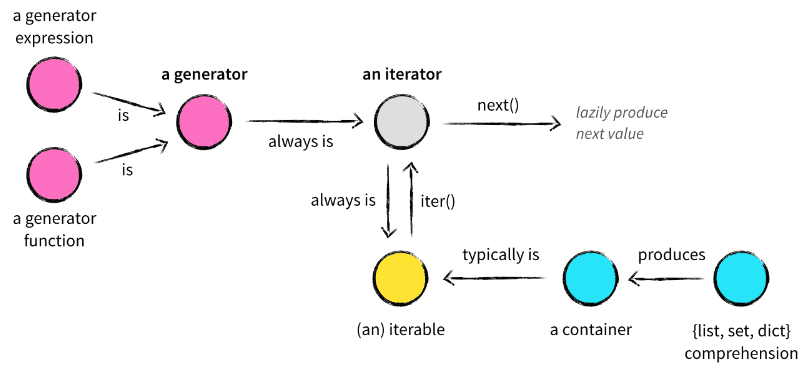![image.png]

Iterator is a subclass of Iterable.

An Iterable object(list, tuple, dict, set, str …) can produce an Iterator by iter() function.

It’s very clear that Iterator is inherited from Iterable.

**Iterable** can print all its elements at once. It really **contains all the elements.**

**Iterator** works as a “factory” which **saves a method to produce elements.**

In a word, an Iterable object is an object which can be iterated (by for loop).
* Iterator contains an item producing method rather than items.



In [ ]:
from collections.abc import Iterable, Iterator

my_list = [1, 2, 3, 4, 5]
print(type(my_list))
my_list_iterator = iter(my_list)
print(type(my_list_iterator))

isinstance(my_list, Iterable) #True
isinstance(my_list, Iterator) #False
isinstance(my_list_iterator, Iterable) #True
isinstance(my_list_iterator, Iterator) #True

<class 'list'>
<class 'list_iterator'>


True

How to Get An Iterator?
* Using iter() function
* Implement __iter__() and __next__() methods
 * The __iter__() is the method called on initialization of an Iterator.
 * The __next__() defines a method to produce items.
* Using Generator

In [ ]:
from collections.abc import Iterable, Iterator

class Fib:
  def __init__(self):
    self.a, self.b = 0, 1

  def __iter__(self):
    return self

  def __next__(self):
    self.a, self.b = self.b, self.a + self.b
    if self.a > 1000:  # set a limitation to stop
      raise StopIteration()
    return self.a

f = Fib()
print(isinstance(f, Iterator)) # Class내에 __iter__, __next__ 둘 다 있어야 True
print(next(f))
print(next(f))
print(next(f))

True
1
1
2


In [ ]:
from collections.abc import Iterable, Iterator

class Fib:
  def __init__(self):
    self.a, self.b = 0, 1

  def __iter__(self):
    print('iter')
    return Fib()

  def __next__(self):
    self.a, self.b = self.b, self.a + self.b
    if self.a > 1000:  # set a limitation to stop
      raise StopIteration()
    return self.a

f = Fib()
f.a, f.b = 10, 5
print(isinstance(f, Iterator)) # Class내에 __iter__, __next__ 둘 다 있어야 True
print(f.a, f.b)

f = iter(f) # f.__iter__()

for i in f: # f.__iter__()
  print(i)

print(next(f))
print(next(f))
print(next(f))

True
10 5
iter
iter
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1
1
2


In [ ]:
def Fib(max):
  n, a, b = 0, 0, 1
  while n < max:
    yield b
    a, b = b, a + b
    n = n + 1
  return 'done'

f = Fib(3)
print(isinstance(f, Iterator)) # function 내에 yield가 있으면 True
print(next(f))
print(next(f))
print(next(f))
print(next(f))

True
1
1
2


StopIteration: ignored

# ***ZIP***

Level 0: Know the Basic Usage of the Zip Function
* 다른 iterable들로부터 결합된 **tuple 형태의 새로운 iterable를 반환**

In [ ]:
id = [1, 2, 3, 4]
leaders = ['Elon Mask', 'Tim Cook', 'Bill Gate', 'Yang Zhou']
record = zip(id, leaders) # <zip object>
print(list(record))

[(1, 'Elon Mask'), (2, 'Tim Cook'), (3, 'Bill Gate'), (4, 'Yang Zhou')]


Level 1: Zip Less or More Iterables at Once

In [ ]:
id = [1, 2, 3]
record = zip(id)
print(list(record))

id = [1, 2, 3]
leaders = ['Elon Mask', 'Tim Cook', 'Bill Gate', 'Yang Zhou']
sex = ['male', 'male', 'male']
record = zip(id, leaders, sex)
print(list(record))

[(1,), (2,), (3,)]
[(1, 'Elon Mask', 'male'), (2, 'Tim Cook', 'male'), (3, 'Bill Gate', 'male')]


Level 2: Deal With Unequal Length Arguments

In [ ]:
id = [1, 2]
leaders = ['Elon Mask', 'Tim Cook', 'Bill Gate', 'Yang Zhou']
record = zip(id, leaders)
print(list(record))

from itertools import zip_longest
long_record = zip_longest(id, leaders)
print(list(long_record))
long_record2 = zip_longest(id, leaders, fillvalue='Top')
print(list(long_record2))


[(1, 'Elon Mask'), (2, 'Tim Cook')]
[(1, 'Elon Mask'), (2, 'Tim Cook'), (None, 'Bill Gate'), (None, 'Yang Zhou')]
[(1, 'Elon Mask'), (2, 'Tim Cook'), ('Top', 'Bill Gate'), ('Top', 'Yang Zhou')]


Level 3: Know the Unzip Operation

In [ ]:
record = [(1, 'Elon Mask'), (2, 'Tim Cook'), (3, 'Bill Gates'), (4, 'Yang Zhou')]
id, leaders = zip(*record)
print(id, leaders)

record = [(1, 'Elon Mask'), (2, 'Tim Cook'), (3, 'Bill Gates'), (4, 'Yang Zhou')]
print(*record)
id, leaders = zip((1, 'Elon Mask'), (2, 'Tim Cook'), (3, 'Bill Gates'), (4, 'Yang Zhou'))
print(id, leaders)

(1, 2, 3, 4) ('Elon Mask', 'Tim Cook', 'Bill Gates', 'Yang Zhou')
(1, 'Elon Mask') (2, 'Tim Cook') (3, 'Bill Gates') (4, 'Yang Zhou')
(1, 2, 3, 4) ('Elon Mask', 'Tim Cook', 'Bill Gates', 'Yang Zhou')


Level 4: Create and Update Dictionaries by the Zip Function

In [ ]:
id = [1, 2, 3, 4]
leaders = ['Elon Mask', 'Tim Cook', 'Bill Gate', 'Yang Zhou']

leader_dict = {i: name for i, name in zip(id, leaders)}
leader_dict2 = dict(zip(id, leaders)) # simple
print(leader_dict)

other_id = [5, 6]
other_leaders = ['Larry Page', 'Sergey Brin']
leader_dict.update(zip(other_id, other_leaders))
print(leader_dict)

{1: 'Elon Mask', 2: 'Tim Cook', 3: 'Bill Gate', 4: 'Yang Zhou'}
{1: 'Elon Mask', 2: 'Tim Cook', 3: 'Bill Gate', 4: 'Yang Zhou', 5: 'Larry Page', 6: 'Sergey Brin'}


Level 5: Use the Zip Function in For-Loops

In [ ]:
products = ["cherry", "strawberry", "banana"]
price = [2.5, 3, 5]
cost = [1, 1.5, 2]
for prod, p, c in zip(products, price, cost):
    print(f'The profit of a box of {prod} is ${p-c}!')

The profit of a box of cherry is $1.5!
The profit of a box of strawberry is $1.5!
The profit of a box of banana is $3!


Level 6: Get the Transpose of a Matrix

In [ ]:
matrix = [[1, 2, 3], [1, 2, 3]]
matrix_T = [list(i) for i in zip(*matrix)]
print(matrix_T)

[[1, 1], [2, 2], [3, 3]]


# ***Exception***

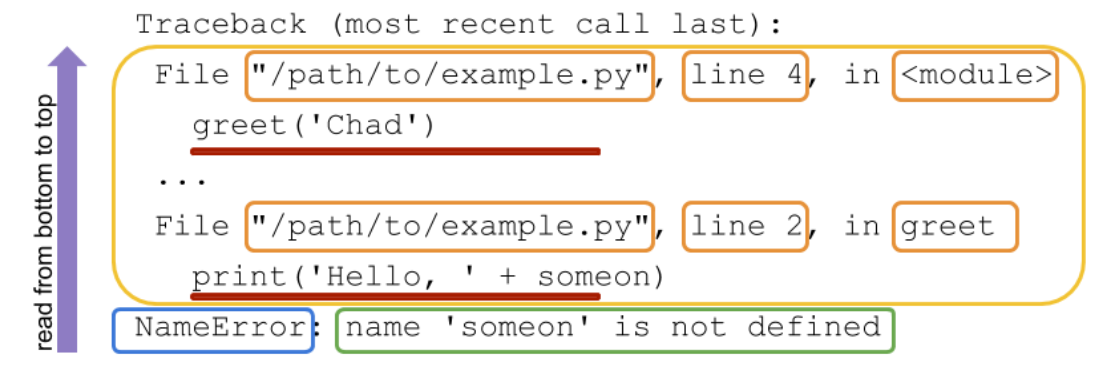
In Python, it’s best to read the traceback from the bottom up:

* Blue box: error message line, exception name
* Green box: helpful information for understanding the reason for the exception being raised.
* Yellow box: Further up the traceback
* Red underline: the actual code that was executed.


In [ ]:
import sys

def linux_interaction():
    assert ('linux' in sys.platform), "Function can only run on Linux systems."
    print('Doing something.')

try:
    linux_interaction()
except AssertionError as error:
    print(error)
else:
    try:
        with open('file.log') as file:
            read_data = file.read()
    except FileNotFoundError as fnf_error:
        print(fnf_error)
finally:
    print('Cleaning up, irrespective of any exceptions.')

Doing something.
[Errno 2] No such file or directory: 'file.log'
Cleaning up, irrespective of any exceptions.


# ***Pathlib***

In [ ]:
from pathlib import Path

cwd_path = Path('.')
cwd_path

PosixPath('/content')

In [ ]:
cwd_path.absolute()

PosixPath('/content')


pathlib 모듈에는 os.chdir()에 해당하는 명령은 없음<br>
pathlib 모듈은 경로를 객체로 다루고, 경로 조작을 편리하게 하는 기능만을 제공

In [ ]:
import os
os.chdir(cwd_path)
Path.cwd()

PosixPath('/content')

Building Paths

In [ ]:
student_folder = cwd_path.joinpath('data').joinpath('student-data')
student_folder = cwd_path / 'data' / 'student-data'
student_folder = Path('./data/student-data')
print(student_folder.absolute())
student_folder

/content/data/student-data


PosixPath('data/student-data')

In [ ]:
student_data_path = student_folder / 'data.json'
student_data_path

PosixPath('data/student-data/data.json')

In [ ]:
student_data_path.name, student_data_path.stem, student_data_path.suffix

('data.json', 'data', '.json')

In [ ]:
student_data_path.parent

PosixPath('data/student-data')

In [ ]:
student_data_path.with_suffix('.py')

PosixPath('data/student-data/data.py')

In [ ]:
student_data_path.with_name('student_data.txt')

PosixPath('data/student-data/student_data.txt')

In [ ]:
student_data_path.with_name('numbers').with_suffix('.xslx')

PosixPath('data/student-data/numbers.xslx')

In [ ]:
student_data_path

PosixPath('data/student-data/data.json')

In [ ]:
student_data_path.exists(), student_data_path.is_file(), student_data_path.is_dir()

(True, True, False)

In [ ]:
student_data_folder = student_data_path.parent
student_data_folder

PosixPath('data/student-data')

In [ ]:
student_data_folder.exists()

True

In [ ]:
student_data_folder.mkdir()

FileExistsError: [Errno 17] File exists: 'data/student-data'

In [ ]:
# parents = True : will make parents if they are not there
# exists_ok = True : will not fail if the folder already exists
student_data_folder.mkdir(parents=True, exist_ok=True)

In [ ]:
student_data_path.exists()

True

In [ ]:
student_data = [
    {
        "name": "John Smith",
        "age": 10,
        "on_vacation": False,
        "test_scores": [66, 85, 39, 61, 16, 92, 33, 3, 87, 71],
    },
    {
        "name": "Jane Doe",
        "age": 10,
        "on_vacation": False,
        "test_scores": [4, 73, 75, 4, 50, 83, 8, 23, 42, 23],
    },
    {
        "name": "Isaac Newton",
        "age": 30,
        "on_vacation": True,
        "test_scores": [93, 96, 94, 92, 95, 90, 100, 98, 90, 94],
    },
]

In [ ]:
import json

student_data_path.write_text(json.dumps(student_data, indent=4))

856

In [ ]:
print(student_data_path.read_text())

[
    {
        "name": "John Smith",
        "age": 10,
        "on_vacation": false,
        "test_scores": [
            66,
            85,
            39,
            61,
            16,
            92,
            33,
            3,
            87,
            71
        ]
    },
    {
        "name": "Jane Doe",
        "age": 10,
        "on_vacation": false,
        "test_scores": [
            4,
            73,
            75,
            4,
            50,
            83,
            8,
            23,
            42,
            23
        ]
    },
    {
        "name": "Isaac Newton",
        "age": 30,
        "on_vacation": true,
        "test_scores": [
            93,
            96,
            94,
            92,
            95,
            90,
            100,
            98,
            90,
            94
        ]
    }
]


Renaming a file

In [ ]:
moved_file_location = student_data_path.parent.parent / 'new_location.txt'
moved_file_location

PosixPath('data/new_location.txt')

In [ ]:
data = moved_file_location.parent
data.absolute()

PosixPath('/content/data')

In [ ]:
%cd data

/content/data


In [ ]:
moved_file_location.exists()

False

리눅스 파일 삭제 시스템 호출
* unlink는 link count를 1 감소
* rmdir은 비어있는 디렉토리만 삭제 가능
* remove는 입력 인자가 파일명이면 unlink이고 디렉토리이면 rmdir

In [ ]:
if student_data_path.exists():
    student_data_path.unlink()
if moved_file_location.exists():
    moved_file_location.unlink()

In [ ]:
if student_data_folder.is_dir():
    student_data_folder.rmdir()
if student_data_folder.parent.is_dir():
    student_data_folder.parent.rmdir()

In [ ]:
student_data_folder.mkdir(parents=True, exist_ok=True)
student_data_path.write_text(json.dumps(student_data, indent=4))

856

Iterating on a dir.

In [ ]:
import os
cwd_path = Path('/content')
os.chdir(cwd_path)
Path.cwd()

PosixPath('/content')

In [ ]:
Path('example1.txt').write_text("# Example")
Path('example2.txt').write_text("# Example")
Path('example3.txt').write_text("# Example")

9

In [ ]:
cwd_path

PosixPath('/content')

In [ ]:
list(cwd_path.iterdir())

[PosixPath('/content/.config'),
 PosixPath('/content/example3.txt'),
 PosixPath('/content/drive'),
 PosixPath('/content/data'),
 PosixPath('/content/example1.txt'),
 PosixPath('/content/example2.txt'),
 PosixPath('/content/sample_data')]

In [ ]:
[path for path in cwd_path.glob('**/*.txt')] # **: 모든 하위 디렉토리 포함

[PosixPath('/content/example3.txt'),
 PosixPath('/content/example1.txt'),
 PosixPath('/content/example2.txt'),
 PosixPath('/content/drive/MyDrive/English/추가단어.txt'),
 PosixPath('/content/data/example.txt')]

In [ ]:
def replace_all_txt_with_md():
  for file_path in Path.cwd().glob('*.txt'):
    file_path.rename(file_path.with_suffix('.md'))

In [ ]:
Path('example.txt').write_text("# Example")

9

In [ ]:
replace_all_txt_with_md()
!ls

data  drive  example1.md  example2.md  example3.md  example.md	sample_data


In [ ]:
Path('example.md').unlink()
!ls

data  drive  example1.md  example2.md  example3.md  sample_data


Base64 : 대소문자52개, 숫자10개, 특수문자 2개로 구성

HTML 또는 Email과 같이 문자를 위한 Media에 **Binary Data를 포함**해야 될 필요가 있을 때,

포함된 Binary Data가 시스템 독립적으로 동일하게 전송 또는 저장되는 걸 보장하기 위해 사용

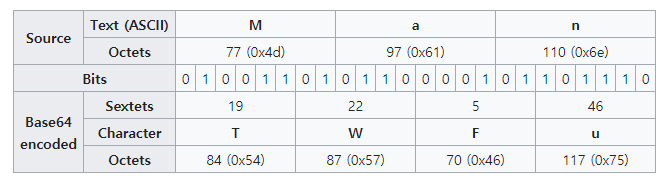

In [ ]:
import base64

def scramble(string: str) -> bytes:
    return base64.b64encode(string.encode("utf-8"))

def un_scramble(string: bytes) -> str:
    return base64.b64decode(string).decode("utf-8")

# ***logging***

In [ ]:
import logging

logger = logging.getLogger()  # root logger

def cal(a, b):
    try:
        result = a / b
    except ZeroDivisionError:
        # logger.exception은 try문에서만 사용가능하며 로깅 메시지는 ERROR level로 전달
        logger.exception("Division by zero is not possible")
    else:
        return result

cal(2, 0)

ERROR:root:Division by zero is not possible
Traceback (most recent call last):
  File "<ipython-input-1-a1819bc42ddc>", line 7, in cal
    result = a / b
ZeroDivisionError: division by zero


작동 원리
* Level 설정
 * DEBUG	: DEBUG용, 자세한 정보를 기록
 * INFO : 계획대로 동작하고 있음을 알리는 확인 메시지
 * WARNING : 정상 동작 하지만, 예상치 못한 일의 발생 및 가능성을 알림 (default)
 * ERROR	: 중대한 문제로 인해 몇몇 기능들을 수행하지 못함을 알림
 * CRITICAL : 작동이 불가능한 수준의 심각한 에러 발생을 알림

* logging 주요 구성 요소들
 * Logger: 어플리케이션을 위한 인터페이스를 제공
 * Handler: logger에 의해 만들어진 log 기록들이 보내지는 위치를 지정
 * Filter: 어떤 log 기록들이 출력되어야 하는지를 결정
 * Formatter: log 기록들의 최종 출력본의 레이아웃을 결정

* 부가 설명
 * logging은 고유 이름을 갖는 Logger instance를 만들고 이들은 마침표로 계층 관계를 형성한다.
   * 자식 logger는 부모 logger의 여러 특성들을 상속함
 * 이 후 Handler를 통해 log 기록 위치를 결정한다.
 * Filter는 잘 사용되지 않지만 더 복잡한 필터링을 원할 때 사용된다.
 * Formatter는 실제로 출력되는 log의 형식을 결정한다.

logger 생성

In [ ]:
# 이름이 없으면 root logger가 반환됨
# 해당 이름의 logger가 존재하면 해당 logger를 반납하나 없으면 새로 생성 후 반납
# child_logger = logging.getLogger("name.child") # name이 없다면 name logger는 자동 생성
logger = logging.getLogger("name")

level 설정

In [ ]:
logger.setLevel(logging.INFO) # 이 logger는 INFO 이상의 메시지만 출력한다.
logger.info("Message") # console에 메시지를 출력

INFO:name:Message


handler와 formatter 설정하기
* logger는 addHandler()로 필요한 handler를 추가
* 각 handler는 자신만의 log level과 Formatter를 가진다.
 * StreamingHandler	- Console
 * FileHandler - File
 * RotatingFileHandler - 일정 사이즈의 여러개의 파일에 log를 출력
 * SocketHandler - 외부 로그 서버로 소켓을 통해 전송
 * DatagramHandler - UDP 통신을 통해 외부 서버로 전송
 * SMTPHandler - 메일로 로그 전송

계층적 logger 구조 : logger.propagate = True (default)
* 메시지는 자식에서 부모 logger handler로 전파됨
* root logger handler를 설정한 후 필요 시 자식 logger를 생성하는 방식이 효율적
* 계층적 logger 구조가 필요 없으면 propagate attribute를 False로 설정한다.

handler 객체 생성

In [ ]:
stream_handler = logging.StreamHandler()
file_handler = logging.FileHandler(filename="information.log")

formatter 객체 생성

In [ ]:
formatter = logging.Formatter(fmt="%(asctime)s - %(name)s - %(levelname)s - %(message)s")

handler에 level 설정

In [ ]:
stream_handler.setLevel(logging.INFO)
file_handler.setLevel(logging.DEBUG)

handler에 format 설정

In [ ]:
stream_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

logger에 handler 추가하기

In [ ]:
logger.addHandler(stream_handler)
logger.addHandler(file_handler)

logger Setting 방법
* json 파일 방식

In [ ]:
%%writefile logging.json
{
    "version": 1,
    "formatters": {
        "basic": {
            "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
        }
    },

    "handlers": {
        "console": {
            "class": "logging.StreamHandler",
            "level": "INFO",
            "formatter": "basic",
            "stream": "ext://sys.stdout"
        },

        "file_handler": {
            "class": "logging.FileHandler",
            "level": "DEBUG",
            "formatter": "basic",
            "filename": "info.log"
        }
    },

    "root": {
        "level": "INFO",
        "handlers": ["console", "file_handler"]
    }
}

Writing logging.json


* 파이썬 코드

In [ ]:
import json
import logging, logging.config

with open("logging.json", "rt") as file: # read text file
    config = json.load(file)
logging.config.dictConfig(config)
logger = logging.getLogger()

* 코드로 세팅 (위에 있는 정보를 코드로 입력)

In [ ]:
def make_logger(name=None):
    logger = logging.getLogger(name) # logger instance 생성
    logger.setLevel(logging.DEBUG) # logger level 설정
    formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")
    console = logging.StreamHandler() # handler instance 생성
    file_handler = logging.FileHandler(filename="test.log")
    console.setLevel(logging.INFO) # handler logging level 설정
    file_handler.setLevel(logging.DEBUG)
    console.setFormatter(formatter) # handler formatter 지정
    file_handler.setFormatter(formatter)
    logger.addHandler(console) # logger에 handler 추가
    logger.addHandler(file_handler)
    return logger

logger = make_logger()
logger.debug("test")
logger.info("test")
logger.warning("test")

Format 편리하게 설정하기
*   속성이름  	--- format ----	설명
-----------------------------------------------------------------
 * asctime	---    %(asctime)s	---    인간이 읽을 수 있는 시간 표시
 * created	---    %(created)f	---    logRecord가 만들어진 시간
 * filename	 ---   %(filename)s	 --- file 이름 부분(Path 제외)
 * funcName	 ---   %(funcName)s	 --- logging call을 포함하는 function의 이름
 * levelname	---  %(levelname)s ---  메시지의 logging level
 * lineno	  ---    %(lineno)d		---  logging call이 발생한 코드의 line 숫자
 * module	  ---    %(module)s		---  filename의 모듈 이름 부분
 * message	---    %(message)s	---    메시지
 * name		  ---    %(name)s		  ---  logger의 이름
 * pathname	 ---   %(pathname)s	 --- full pathname
 * thread	  ---    %(thread)d		---  thread ID
 * threadName	--- %(threadName)s --- thread 이름

In [ ]:
import logging
LOG_FORMAT = "[%(asctime)-10s] (줄 번호: %(lineno)d) %(name)s:%(levelname)s - %(message)s"
# Level: WARNING
# Handler: StreamHandler
# Format: LOG_FORMAT이 지정되지 않은 경우, 기본 형식은 '%(levelname)s:%(name)s:%(message)s'
logging.basicConfig(format=LOG_FORMAT)
logger = logging.getLogger("setting")
logger.setLevel(logging.INFO)
logger.info("sth happened")

[%(asctime)-10s] (줄 번호: %(lineno)d) %(name)s:%(levelname)s - %(message)s
INFO:setting:sth happened


In [ ]:
%%writefile logging.conf
[formatters]
keys=simple,complex

[formatter_simple]
format=[%(name)s] %(message)s

[formatter_complex]
format=%(asctime)s %(levelname)s [%(name)s] [%(filename)s:%(lineno)d] - %(message)s

[handlers]
keys=console,file

[handler_console]
class=StreamHandler
args=(sys.stdout,)
formatter=simple
level=DEBUG

[handler_file]
class=FileHandler
args=("error.log",)
formatter=complex
level=ERROR

[loggers]
keys=root,parent,child

[logger_root]
level=WARNING
handlers=console,file

[logger_parent]
qualname=parent
level=INFO
handlers=

[logger_child]
qualname=parent.child
level=DEBUG
handlers=

Writing logging.conf


In [ ]:
# The qualname entry is the hierarchical channel name of the logger,
# that is to say the name used by the application to get the logger.
import logging
import logging.config

logging.config.fileConfig("logging.conf")
logger = logging.getLogger('parent')
logger.info('is_ok')

[parent] is_ok


In [ ]:
# 파이썬 공식 가이드 추천 방법 : dictionary을 사용한 로깅 설정 권장
import logging
import logging.config

config = {
    "version": 1,
    "formatters": {
        "simple": {"format": "[%(name)s] %(message)s"},
        "complex": {
            "format": "%(asctime)s %(levelname)s [%(name)s] [%(filename)s:%(lineno)d] - %(message)s"
        },
    },
    "handlers": {
        "console": {
            "class": "logging.StreamHandler",
            "formatter": "simple",
            "level": "DEBUG",
        },
        "file": {
            "class": "logging.FileHandler",
            "filename": "error.log",
            "formatter": "complex",
            "level": "ERROR",
        },
    },
    "root": {"handlers": ["console", "file"], "level": "WARNING"},
    "loggers": {"parent": {"level": "INFO"}, "parent.child": {"level": "DEBUG"},},
}

logging.config.dictConfig(config)
logger = logging.getLogger('parent.child')
logger.debug('is_ok')

[parent.child] is_ok


**logging_in_python.ipynb**
* by default, the logging module logs the messages with a severity level of WARNING.

basicConfig(**kwargs)
- `level`: The root logger will be set to the specified severity level.
- `filename`: This specifies the file.
- `filemode`: If filename is given, the file is opened in this mode. The default is an append mode.
- `format`: This is the format of the log message.

In [ ]:
%%python

import logging
logger = logging.getLogger('my_logger')

logging.basicConfig()

logger.debug('This is my 😂 debug message ')
logger.warning('This is my 🤔 warning message ')

In [ ]:
%%python

import logging
from pathlib import Path

logger = logging.getLogger('my_logger')

logging.basicConfig(
    filename='app.log', # write to this file
    filemode='a', # open in append mode
    format='%(name)s - %(levelname)s - %(message)s'
    )

logging.warning('This will get logged to a file')
print(Path('app.log').read_text())

root - WARNING - This will get logged to a file



In [ ]:
%ls

app.log  drive/  error.log  sample_data/


In [ ]:
%%python

import logging
logger = logging.getLogger('my_logger')

logging.basicConfig(format='ID:%(process)d - %(levelname)s - %(message)s')
logger.warning('This Warning contains the process ID of the process who logged it')


ID:2209 - WARNING - This Warning contains the process ID of the process who logged it


In [ ]:
%%python

import logging
logger = logging.getLogger('my_logger')

logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)
logger.info('This message has a date/time timestamp')

2024-08-11 23:13:44,814 - This message has a date/time timestamp


In [ ]:
%%python

import logging
logger = logging.getLogger('my_logger')

logging.basicConfig(format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')
logger.warning('Date looks different for this message')

11-Aug-24 23:14:02 - Date looks different for this message


https://colab.research.google.com/github/aviadr1/learn-advanced-python/blob/master/content/15_logging/logging_in_python.ipynb#scrollTo=UCOwXmDvv0hA

## 원격 로깅 예제
### 원격 로깅 서버 설정

In [ ]:
import logging
import logging.handlers
import socketserver
import struct
import pickle

class LogRecordStreamHandler(socketserver.StreamRequestHandler):  # socketserver로 수정
    def handle(self):
        while True:
            chunk = self.connection.recv(4)
            if len(chunk) < 4:
                break
            slen = struct.unpack('>L', chunk)[0] # Big-endian, unsigned long
            chunk = self.connection.recv(slen)
            while len(chunk) < slen:
                chunk = chunk + self.connection.recv(slen - len(chunk))
            obj = self.unPickle(chunk)
            record = logging.makeLogRecord(obj)
            self.handleLogRecord(record)

    def unPickle(self, data):
        return pickle.loads(data)

    def handleLogRecord(self, record):
        logger = logging.getLogger(record.name)
        logger.handle(record)

if __name__ == "__main__":
    logging.basicConfig(format='%(relativeCreated)5d %(name)-15s %(levelname)-8s %(message)s')
    tcp_server = socketserver.TCPServer(("localhost", 9999), LogRecordStreamHandler)  # socketserver로 수정
    try:
        tcp_server.serve_forever()
    except KeyboardInterrupt:
        tcp_server.shutdown()
        tcp_server.server_close()
        print("Server stopped.")


Server stopped.


### 클라이언트 로그 설정

In [ ]:
import logging
import logging.handlers

logger = logging.getLogger('myLogger')
logger.setLevel(logging.DEBUG)

socket_handler = logging.handlers.SocketHandler('localhost', 9999)
logger.addHandler(socket_handler)

logger.debug('This is a test message.')


[myLogger] This is a test message.


### Modern Python Logging ###
https://www.youtube.com/watch?v=9L77QExPmI0&t=50s

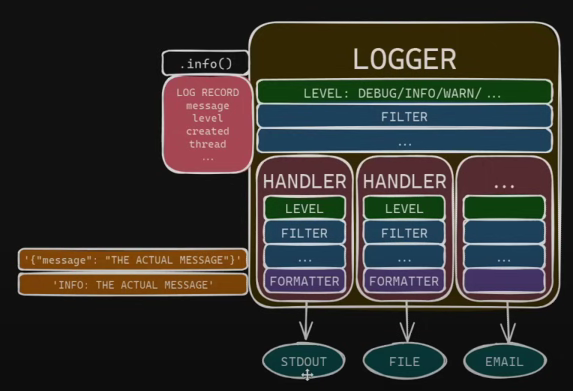

### 1. use dictConfig ###
``` python
import logging.config

logger = logging.getLogger("my_app")

logging_config = {
    "version": 1,
    "disable_existing_loggers": False,
    "filters": {...},
    "formatters": {...},
    "handlers": {...},
    "loggers": {...},
}

def main():
    logging.config.dictConfig(config=logging_config)
    logger.addHandler(logging.StreamHandler(...))
    logger.debug("debug message")
    logger.info("info message")
    logger.warning("warning message")
    logger.error("error message")
    logger.critical("critical message")
    try:
        1 / 0
    except ZeroDivisionError:
        logger.exception("exception message")
```

### 2. Put all handlers/filters on the root ###
여러 계층 구조를 만들지 말고 root 바로 밑에 logger를 두어라, 밑에 있는 logger는 logger propergation에 의해서 root logger의 filter와 formatter를 통과하게 된다.
### 3. Don't use the root logger ###
작은 응용 프로그램은 하나의 non-root logger 만으로 충분하다.
### 4. One logger per major-subcomponent ###
getLogger(\_\_name__)을 모든 파일에서 사용한다면 logger을 유지하기 위한 글로벌 자원 소모가 많게 된다.

### simple config that logs everything to stdout ###

In [ ]:
logging_config = {
    "version": 1,
    # True이면 여기서 설정된 로그 이외는 disable
    # False로 설정 시 third party logger 사용 가능
    "disable_existing_loggers": False,

    "formatters": {
        "simple": {"format": "[%(name)s] %(message)s"},
    },
    "handlers": {
        "stdout": {
            "class": "logging.StreamHandler",
            "formatter": "simple",
            "stream": "ext://sys.stdout",
        },
    },
    "loggers": {
        "level": "DEBUG", "handlers": ["stdout"]
    },
}


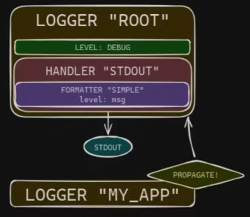

### 5. Store CONFIG IN JSON or YAML file ###


In [ ]:
%%writefile logging.json
{
    "version": 1,
    "disable_existing_loggers": false,
    "formatters": {
        "basic": {
            "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
        }
    },
    "handlers": {
        "stderr": {
            "class": "logging.StreamHandler",
            "level": "WARNING",
            "formatter": "basic",
            "stream": "ext://sys.stdout"
        },
        "file": {
            "class": "logging.handlers.RotatingFileHandler",
            "level": "DEBUG",
            "formatter": "basic",
            "filename": "logs/my_app.log",
            "maxBytes": 10000,
            "backupCount": 3
        }
    },
    "loggers": {
        "root": {
            "level": "DEBUG",
            "handlers": ["stderr", "file"],
        }
    }
}

Writing logging.json


### 6. USE ISO-8601 TIMESTAMPS (WITH TIMEZONE) ###
ISO-8601은 날짜와 시간을 표기하는 국제 표준
1. **날짜와 시간의 형식**: YYYY-MM-DD 형식의 날짜 표기법을 사용 (2024-01-31)
2. **시간 표기법**: 시간은 보통 HH:MM:SS 형식으로 표기 (15:30:45)
3. **시간대**: ISO-8601은 시간대 표현을 지원 (UTC보다 5시간 앞선 시간대는 "+05:00")
4. **날짜와 시간의 결합**: 날짜와 시간은 함께 "YYYY-MM-DDTHH:MM:SS" 형식으로 표기 T는 날짜와 시간의 구분을 표시
5. **주 (Weeks)와 기간 (Duration)**: "2024-W05"는 2024년의 5번째 주를 의미

### 7. Store persistent logs in json ###
JSON Formatter - pip install
### 8. add context with logging.info(..., extra={...}) ###
추가적인 컨텍스트 정보를 포함하기 위해 사용<br>
extra는 dict 형태로 제공되고 로그 레코드의 속성으로 추가됨<br>
logging.info("Some message", extra={"user": "john_doe"})

In [ ]:
class NonErrorFilter(logging.Filter):
  @override
  def filter(self, record: logging.LogRecord) -> bool:
    return record.levelno <= logging.INFO

### 9. Log off the main thread ###
logging으로 인해 앱의 고객 반응 속도가 늦어질 수 있다.<br>
따라서 main thread가 아닌 thread에서 QueueHandler을 사용하라

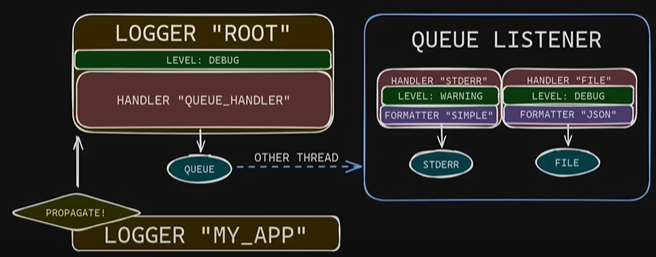

In [ ]:
"queue_handler": {
    "class": "logging.handlers.QueueHandler",
    "handlers": ["stderr", "file"],
    "respect_handler_level": true,
},
"loggers": {
    "root": {
        "level": "DEBUG",
        "handlers": ["queue_handler"],
        "respect_handler_level": true,
    }
}

def setup_logging():
  config_file = pathlib.Path("logging_configs/config.json")
  with open(config_file) as f_in:
    config = json.load(f_in)
  logging.config.dictConfig(config)
  queue_handler = logging.getHandlerByName("queue_handler")
  if queue_handler is not None:
    queue_handler.listener.start()
    atexit.register(queue_handler.listener.stop) # atexit 모듈을 사용하여 프로그램 종료 시 특정 함수를 호출하도록 등록

 "respect_handler_level": true를 설정함으로써, 각 핸들러는 자신의 로그 레벨 설정에 따라 독립적으로 메시지를 필터링하고 처리할 수 있습니다. 예를들면 개발 중에는 디버깅 목적으로 모든 메시지를 파일에 기록하면서, 동시에 경고 이상의 메시지만 콘솔에 출력하고자 할 때 유용

### 10. for libraries don't configure logging ###


# ***Pickle***

* 프로그램 실행 시 모든 object는 메모리에 적재되고 프로그램이 종료되면 제거된다.
* pickling : python object를 bytes로 변환한다 (Serialization)
 * storage에 저장하거나 Network로 전송이 가능

In [ ]:
# dumps : an object → bytes
import pickle

Geek = dict(name='yang', tech='Python', level='highest')
Geek_byte = pickle.dumps(Geek)
print(Geek_byte)

b'\x80\x04\x955\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x04name\x94\x8c\x04yang\x94\x8c\x04tech\x94\x8c\x06Python\x94\x8c\x05level\x94\x8c\x07highest\x94u.'


In [ ]:
# dump : dumps 작업 후 file에 저장
Geek = dict(name='yang', tech='Python', level='highest')
f = open('dump.txt','wb')
pickle.dump(Geek,f)
f.close()

In [ ]:
# load : file에서 bytes을 얻은 후 → an object
f = open('dump.txt', 'rb')
d = pickle.load(f)
f.close()
print(d)

{'name': 'yang', 'tech': 'Python', 'level': 'highest'}


# ***JSON***

Use JSON to Replace Pickle
* pickle 모듈은 python에서만 사용 가능하므로 언어에 독립된 포맷으로 serialize하려면 JSON을 사용하라
* JSON은 string 객체이므로 손쉽게 storage에 저장하거나 Network로 전송이 가능

JSON (JavaScript Object Notation)
* JSON is a lightweight data-interchange format based on the syntax of JavaScript objects.
* It is a text-based, human-readable, language-independent format for representing structured object data for easy transmission or saving.
* JSON objects can also be stored in files — typically a text file with a .json extension and an application/json MIME type.

Working with Simple Built-in Datatypes (Python - JSON)
* dict - object
* list, tuple - array
* str - string
* int, float, enums - number
* True - true
* False - false
* None - null

In [ ]:
import json

json_data = json.dumps({
    "name": "Foo Bar",
    "age": 78,
    "friends": ["Jane","John"],
    "balance": 345.80,
    "other_names":("Doe","Joe"),
    "active":True,
    "spouse":None
    }, sort_keys=True, indent=4)

print(json_data)

{
    "active": true,
    "age": 78,
    "balance": 345.8,
    "friends": [
        "Jane",
        "John"
    ],
    "name": "Foo Bar",
    "other_names": [
        "Doe",
        "Joe"
    ],
    "spouse": null
}


In [ ]:
with open('user.json','w') as file:
    json.dump({
        "name": "Foo Bar",
        "age": 78,
        "friends": ["Jane","John"],
        "balance": 345.80,
        "other_names":("Doe","Joe"),
        "active":True,
        "spouse":None
    }, file, sort_keys=True, indent=4)

In [ ]:
with open('user.json', 'r') as file:
    user_data = json.load(file)

print(user_data)

{'active': True, 'age': 78, 'balance': 345.8, 'friends': ['Jane', 'John'], 'name': 'Foo Bar', 'other_names': ['Doe', 'Joe'], 'spouse': None}


Working with Custom Objects
* Serializing Custom Objects

In [ ]:
class User:
   """
   Custom User Class
   """
   def __init__(self,name,age,active,balance,other_names,friends,spouse):
       self.name = name
       self.age = age
       self.active = active
       self.balance = balance
       self.other_names = other_names
       self.friends = friends
       self.spouse = spouse

   def __str__(self):
       return self.name


new_user = User(
        name = "Foo Bar",
        age = 78,
        friends = ["Jane","John"],
        balance = 345.80,
        other_names = ("Doe","Joe"),
        active = True,
        spouse = None)

json.dumps(new_user)

TypeError: Object of type User is not JSON serializable

A simple solution would be to convert our custom type into a serializable type(built-in type).

In [ ]:
def convert_to_dict(obj):
  """
  A function takes in a custom object and returns a dictionary representation of the object.
  This dict representation includes meta data such as the object's module and class names.
  """

  #  Populate the dictionary with object metadata, for reconstruct the object when decoding
  obj_dict = {
    "__class__": obj.__class__.__name__,
    "__module__": obj.__module__
  }
  #  Populate the dictionary with object properties
  obj_dict.update(obj.__dict__)

  return obj_dict

data = json.dumps(new_user, default=convert_to_dict, indent=4, sort_keys=True)
print(data)

{
    "__class__": "User",
    "__module__": "__main__",
    "active": true,
    "age": 78,
    "balance": 345.8,
    "friends": [
        "Jane",
        "John"
    ],
    "name": "Foo Bar",
    "other_names": [
        "Doe",
        "Joe"
    ],
    "spouse": null
}


Decoding Custom Objects
* json.loads()의 object_hook 함수를 사용하여 customer object를 복원

In [ ]:
user_data = json.loads('{"__class__": "User", "__module__": "__main__", "name": "Foo Bar", "age": 78, "active": true, "balance": 345.8, "other_names": ["Doe", "Joe"], "friends": ["Jane", "John"], "spouse": null}')
type(user_data)


dict

In [ ]:
def dict_to_obj(our_dict):
    """
    Function that takes in a dict and returns a custom object associated with the dict.
    This function makes use of the "__module__" and "__class__" metadata in the dictionary
    to know which object type to create.
    """
    if "__class__" in our_dict:
        # Pop ensures we remove metadata from the dict to leave only the instance arguments
        class_name = our_dict.pop("__class__")
        # Get the module name from the dict and import it
        module_name = our_dict.pop("__module__")
        # We use the built in __import__ function since the module name is not yet known at runtime
        module = __import__(module_name)
        # Get the class from the module
        class_ = getattr(module,class_name)
        # Use dictionary unpacking to initialize the object
        obj = class_(**our_dict)
    else:
        obj = our_dict
    return obj

new_object = json.loads('{"__class__": "User", "__module__": "__main__", "name": "Foo Bar", "age": 78, "active": true, "balance": 345.8, "other_names": ["Doe", "Joe"], "friends": ["Jane", "John"], "spouse": null}',object_hook=dict_to_obj)
type(new_object)


__main__.User

getattr(object, name [, default]) → name(string type)에 해당하는 객체 속성을 가져오는 built-in 함수

In [ ]:
class Point:
    def __init__(self):
        self.x = 10
        self.y = 20

p = Point()
print( getattr(p, 'x') )          	# 10
print( getattr(p, 'z', 'Hello') ) 	# name이 없으면 Hello를 돌려줌
print( getattr(p, 'a') )          	# ❌ Error

10
Hello


AttributeError: ignored

Python object → JSON String
* **json.JSONEncoder** class

JSON String → Python object
* **json.JSONDecoder** class


JSON Serialization class JSONEncoder
* default(o) – Implemented in the subclass and return serialize object for o object.
* encode(o) – Same as JSON dumps Python method return JSON string of Python data structure.
* iterencode(o) – Represent string one by one and encode object o.

In [ ]:
from json.encoder import JSONEncoder

colour_dict = { "colour": ["red", "yellow", "green" ]}
JSONEncoder().encode(colour_dict)

'{"colour": ["red", "yellow", "green"]}'

In [ ]:
import json

class ComplexNumber:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag

class CustomEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, ComplexNumber):
            return {'__complex__': True, 'real': obj.real, 'imag': obj.imag}
        # Let the base class default method raise the TypeError
        return json.JSONEncoder.default(self, obj)

# 사용자 정의 객체 생성
complex_num = ComplexNumber(2, 3)

# CustomEncoder를 사용하여 JSON 문자열로 변환
json_str = json.dumps(complex_num, cls=CustomEncoder)
print(json_str)


{"__complex__": true, "real": 2, "imag": 3}


In [ ]:
def decode_complex(dct):
    if "__complex__" in dct:
        return ComplexNumber(dct["real"], dct["imag"])
    return dct

# object_hook 파라미터에 decode_complex 함수를 전달하여 복소수 객체로 변환
complex_num = json.loads(json_str, object_hook=decode_complex)
print(f"Real part: {complex_num.real}, Imaginary part: {complex_num.imag}")


NameError: name 'json_str' is not defined

JSON Deserialization class JSONDecoder
* default(o) – Implemented in the subclass and return deserialized object o object.
* decode(o) – Same as json.loads() method return Python data structure of JSON string or data.
* raw_decode(o) – Represent Python dictionary one by one and decode object o.

In [ ]:
import json
from json.decoder import JSONDecoder

colour_string = '{ "colour": ["red", "yellow"]}'
JSONDecoder().decode(colour_string)

{'colour': ['red', 'yellow']}

In [ ]:
z = complex(2, -3)
print(z)
z = complex()
print(z)
z = complex(1)
print(z)

(2-3j)
0j
(1+0j)


In [ ]:
class ComplexEncoder(json.JSONEncoder):
  def default(self, obj):
    if isinstance(obj, complex):
      return [obj.real, obj.imag]
    # Let the base class default method raise the TypeError
    return json.JSONEncoder.default(self, obj)

print(json.dumps(2 + 1j, cls=ComplexEncoder))
print(ComplexEncoder().encode(2 + 1j))
# Encode the given object and yield each string representation as available
list(ComplexEncoder().iterencode(2 + 1j))

[2.0, 1.0]
[2.0, 1.0]


['[2.0', ', 1.0', ']']

# ***namedtuple & dataclasses Module***

## namedtuple

* to create tuple subclasses with named fields.
* obj.attr로 접근 가능
* 특징
 * immutable data structure
 * hash value (Can work as dictionary keys)
 * helpful docstring
 * helpful string representation
 * support indexing
 * _make(), ._asdict(), ._fields
 * backward compatible with tuple

Creating Tuple-Like Classes With namedtuple()

In [ ]:
from collections import namedtuple

Point = namedtuple("Point", "x y")
print(issubclass(Point, tuple))
point = Point(2, 4)
print(point)
print(point.x)
print(point.y)
print(point[0])
print(point[1])
# point.x = 100 # AttributeError

True
Point(x=2, y=4)
2
4
2
4


In [ ]:
import typing

#Coordinate = typing.NamedTuple('Coordinate', [('lat', float), ('lon', float)])
Coordinate = typing.NamedTuple('Coordinate', lat=float, lon=float)

print(issubclass(Coordinate, tuple))
typing.get_type_hints(Coordinate)

True


{'lat': float, 'lon': float}

The typing.NamedTuple is equivalent to a collections.namedtuple, but with \_\_annotations__, _field_types and _field_defaults attributes added.

In [ ]:
from decimal import Decimal
from typing import NamedTuple

class Customer(NamedTuple):
  name: str
  fidelity: int

class LineItem(NamedTuple):
  product: str
  quantity: int
  price: Decimal

  def total(self):
    return self.price * self.quantity

## dataclasses
* __init__, __repr__, __eq__는 자동 추가되는 기본 메소드

매개변수
* init : __init__이 생성, default가 True
* repr : __repr__이 생성, default가 True
* eq : __eq__가 생성, filed를 tuple 기준으로 비교함, default가 True
* order : __lt__, __le__, __gt__, __ge__가 생성, default가 False
* unsafe_hash : __hash__를 생성, default가 False
* frozen : immutable instance를 생성, default가 False

일반 class 객체는 모든 값이 동일해도 비교 시 False이나 dataclass는 True가 됨


In [ ]:
from dataclasses import dataclass

In [ ]:
@dataclass
class User:
    number: int
    name: str

user1 = User(123, 'kim')
user2 = User(123, 'kim')
print(user1)
print(user1 == user2)

User(number=123, name='kim')
True


In [ ]:
@dataclass(frozen=True)
class User:
    number: int
    name: str

user1 = User(123, 'kim')
user1.name = 'lee' # dataclasses.FrozenInstanceError


FrozenInstanceError: cannot assign to field 'name'

In [ ]:
@dataclass(order=True)
class User:
    number: int
    name: str

user1 = User(123, 'kim')
user2 = User(121, 'lee')
print(user1 > user2)
print(sorted([user1, user2]))

True
[User(number=121, name='lee'), User(number=123, name='kim')]


In [ ]:
@dataclass(unsafe_hash=True)
class User:
    number: int
    name: str

user = User(123, 'kim')
user1 = User(123, 'kim')
user2 = User(122, 'kim')
user3 = User(122, 'lee')
print({user, user1, user2, user3}) # user, user1 중복 제거

{User(number=123, name='kim'), User(number=122, name='lee'), User(number=122, name='kim')}


* field를 사용하여 container type의 빈 값을 기본값으로 할당
* asdict으로 dic으로 변환, astuple로 tuple로 변환

In [ ]:
from dataclasses import dataclass, field, asdict, astuple

@dataclass
class User:
    number: int
    name: str = 'Anonymous' # 초기값 할당
    test: list = field(default_factory=list)

user = User(number=122, name='kim')
print(asdict(user))
print(astuple(user))

{'number': 122, 'name': 'kim', 'test': []}
(122, 'kim', [])


1 — Less code to define a class

In [ ]:
import inspect
from dataclasses import dataclass

@dataclass
class Person:
     first_name: str
     last_name: str
     age: int
     job: str

# __eq__, __init__, __repr__ 자동 생성
print(inspect.getmembers(Person, inspect.isfunction))

[('__eq__', <function Person.__eq__ at 0x7ae3c1784820>), ('__init__', <function Person.__init__ at 0x7ae3c1784a60>), ('__repr__', <function Person.__repr__ at 0x7ae3c1784e50>)]


2 — Support for default values

In [ ]:
@dataclass
class Person:
     first_name: str = "Ahmed"
     last_name: str = "Besbes"
     age: int = 30
     job: str = "Data Scientist"

@dataclass
class Person:
     first_name: str = "Ahmed"
     last_name: str = "Besbes"
     age: int = 30
     job: str = "Data Scientist"
     hobbies: str  # raise TypeError


TypeError: non-default argument 'hobbies' follows default argument

3 — Custom representations of the objects

In [ ]:
@dataclass
class Person:
     first_name: str = "Ahmed"
     last_name: str = "Besbes"
     age: int = 30
     job: str = "Data Scientist"

ahmed = Person()
print(ahmed)

Person(first_name='Ahmed', last_name='Besbes', age=30, job='Data Scientist')


In [ ]:
@dataclass
class Person:
    first_name: str = "Ahmed"
    last_name: str = "Besbes"
    age: int = 30
    job: str = "Data Scientist"

    def __repr__(self):
        return f"{self.first_name} {self.last_name} ({self.age})"

ahmed = Person()
print(ahmed) # Ahmed Besbes (30)

Ahmed Besbes (30)


4— Easy conversion to a tuple or a dictionary

In [ ]:
from dataclasses import astuple, asdict

ahmed = Person()
print(astuple(ahmed))
print(asdict(ahmed))

('Ahmed', 'Besbes', 30, 'Data Scientist')
{'first_name': 'Ahmed', 'last_name': 'Besbes', 'age': 30, 'job': 'Data Scientist'}


5 — Frozen instances / immutable objects

In [ ]:
@dataclass(frozen=True)
class Person:
     first_name: str = "Ahmed"
     last_name: str = "Besbes"
     age: int = 30
     job: str = "Data Scientist"

6 — No need to write comparison methods (eq 디폴트 지원)

In [ ]:
from dataclasses import dataclass, field

@dataclass
class Person:
    first_name: str = "Ahmed"
    last_name: str = "Besbes"
    age: int = 30
    job: str = "Data Scientist"
    full_name: str = field(init=False, repr=False)

8 — The __post_init__ hook

In [ ]:
@dataclass
class Person:
     first_name: str = "Ahmed"
     last_name: str = "Besbes"
     age: int = 30
     job: str = "Data Scientist"
     full_name: str = field(init=False, repr=True)
     def __post_init__(self):
         self.full_name = self.first_name + " " + self.last_name

ahmed = Person()
print(ahmed)
ahmed.full_name

Person(first_name='Ahmed', last_name='Besbes', age=30, job='Data Scientist', full_name='Ahmed Besbes')


'Ahmed Besbes'

9 — Compare objects and sort them

In [ ]:
from dataclasses import dataclass, field

@dataclass(order=True)
class Person:
     first_name: str = "Ahmed"
     last_name: str = "Besbes"
     age: int = 30
     job: str = "Data Scientist"
     sort_index: int = field(init=False, repr=False) # tuple 형태로 비교되므로 필요하다면 맨 앞으로 이동
     def __post_init__(self):
         self.sort_index = self.age

p1 = Person(age=30)
p2 = Person(age=20)
print(p1 > p2)
p2.first_name = 'Lee'
print(p1 > p2)

True
False


**This is why python data classes are awesome**

In [ ]:
from dataclasses import dataclass

@dataclass
class Position:
    name: str
    lon: float = 0.0
    lat: float = 0.0

@dataclass
class Capital(Position):
    country: str  # Does NOT work

# def __init__(name: str, lon: float = 0.0, lat: float = 0.0, country: str):  → TypeError
# If a parameter has a default value, all following parameters must also have a default value

In [ ]:
from dataclasses import dataclass, field

@dataclass
class Position:
    name: str
    lon: float = 0.0
    lat: float = 0.0

@dataclass
class Capital(Position):
    country: str = field(init=False, repr=True)

c = Capital('chlee')
c.country = 'Korea'
print(c)

Capital(name='chlee', lon=0.0, lat=0.0, country='Korea')


In [ ]:
import random
import string
from dataclasses import dataclass, field

def generate_id() -> str:
    return "".join(random.choices(string.ascii_uppercase,k=12))

@dataclass
class Person:
    name: str
    address: str
    active: bool = True
    # ValueError: mutable default <class 'list'> for field email_address is not allowed: use default_factory
    # email_address: list = []
    email_addresses: list = field(default_factory=list)
    id: str = field(default_factory=generate_id)

person = Person(name='John', address='123 Main st')
print(person)

Person(name='John', address='123 Main st', active=True, email_addresses=[], id='RHTKSSTIDGYD')


# **Descriptor**

객체 속성에 접근할 때 수행, descriptor protocol method를 가진 객체
* \_\_get__(self, obj, type=None) -> object
* \_\_set__(self, obj, value) -> None
* \_\_delete__(self, obj) -> None
* \_\_set_name__(self, owner, name)

\_\_get__()만 구현하면 non-data descriptor라고하며,
추가로 \_\_set__() 또는 \_\_delete__()까지 구현하면 data descriptor라고 함

In [ ]:
class Descriptor:
    def __init__(self, name=''):
        self.name = name

    def __get__(self, obj, objtype):
        return f'{self.name}Baby{self.name}'

    def __set__(self, obj, name):
        if isinstance(name, str):
            self.name = name
        else:
            raise TypeError('Name shoud be string')

class CFG:
    # 대부분의 경우 디스크립터는 클래스 속성으로 정의되어 사용됩니다
    name = Descriptor()

g = CFG()
g.name = 'GO'
print(g.name)
CFG.__dict__

GOBabyGO


mappingproxy({'__module__': '__main__',
              'name': <__main__.Descriptor at 0x7c74f36df340>,
              '__dict__': <attribute '__dict__' of 'CFG' objects>,
              '__weakref__': <attribute '__weakref__' of 'CFG' objects>,
              '__doc__': None})

Python의 property는 descriptor임

In [ ]:
class Person:
    def __init__(self, name):
        self._name = name

    @property
    def name(self):
        return "I'm the 'name' property." + self._name

    @name.setter
    def name(self, value):
        if isinstance(value, str):
            self._name = value
        else:
            raise TypeError('must be string')

    @name.deleter
    def name(self):
        print(f'{self._name} deleted')
        del self._name

item = Person('CHLee')
print(item.name)
item.name = 'Babo'
print(item.name)

I'm the 'name' property.CHLee
I'm the 'name' property.Babo


In [ ]:
# @title
class Person:
    def __init__(self, name):
        self._name = name

    def getter(self):
        return "I'm the 'name' property." + self._name

    def setter(self, value):
        if isinstance(value, str):
            self._name = value
        else:
            raise TypeError('must be string')

    def deleter(self):
        print(f'{self._name} deleted')
        del self._name

    # decorators are just syntactic sugar
    name = property(getter, setter, deleter, doc='descriptor')
    # name = property(fget=getter, fset=setter, fdel=deleter)

item = Person('CHLee')
print(item.name)
item.name = 'Babo'
print(item.name)
help(Person.name)
del(item.name)



I'm the 'name' property.CHLee
I'm the 'name' property.Babo
Help on property:

    descriptor

Babo deleted




```
# 코드로 형식 지정됨
```

property(fget=None, fset=None, fdel=None, doc=None) -> object
* returns a property object that implements the descriptor protocol(fget, fset, fdel)

 non-data descriptor의 \_\_get__()을 통한 변환
 * object method : obj.method(*args) -> method(obj, *args)
 * class method : obj.method(type(obj), *args) -> method(type(obj), *args)
 * static method : obj.method(*args) -> method(*args)

class도 object임 따라서 class의 모든 속성과 method를 포함하는 \_\_dict__을 가진다.
* object 또는 class 속성 접근은 \_\_dict__에 대한 접근이다.

lookup chain : attribute 접근 방법

Data Descriptor:
* \_\_get__()의 반환 값을 확인
* 반환 값이 없으면 객체의 \_\_dict__에서 찾음
* 반환 값이 없으면 class 객체인 type(obj)의 \_\_dict__에서 찾음
* 찾지 못하면 obj의 parent type의 \_\_dict__에서 찾음 (계속해서 parents을 추적하며 수행)
* 끝내 찾지 못하면 AttributeError exception을 발생시킴

Non-Data Descriptor:
* 객체의 __dict__ 확인
* \_\_get__() 호출
* 클래스의 __dict__ 확인
* 부모 클래스의 __dict__ 확인
* AttributeError 발생

In [ ]:
class Vehicle():
  can_fly = False
  number_of_weels = 0

class Car(Vehicle):
  number_of_weels = 4
  def __init__(self, color):
    self.color = color

my_car = Car("red")
print(my_car.__dict__)
print(type(my_car).__dict__) # class 객체 레벨에서 접근

print(my_car.color)
print(my_car.number_of_weels)
print(my_car.can_fly)

print(my_car.__dict__['color'])
print(type(my_car).__dict__['number_of_weels'])
print(type(my_car).__base__.__dict__['can_fly']) # Parent Class
print(type(my_car).__base__.__dict__['number_of_weels']) # Parent Class

{'color': 'red'}
{'__module__': '__main__', 'number_of_weels': 4, '__init__': <function Car.__init__ at 0x7c74f36c2dd0>, '__doc__': None}
red
4
False
red
4
False
0


descroptor protocol 주요 method
* \_\_get__(self, obj, type=None) -> object
* \_\_set__(self, obj, value) -> None
 * obj : descriptor에 붙이고자 하는 object instance
 * type : descriptor에 붙이고자 하는 object의 type

Python descriptors are instantiated just once per class.

In [ ]:
# number는 class level 속성이므로 모든 Foo 객체가 공유한다.
class OneDigitNumericValue():
  def __init__(self):
    self.value = 0
  def __get__(self, obj, type=None) -> object:
    return self.value
  def __set__(self, obj, value) -> None:
    if value > 9 or value < 0 or int(value) != value:
      raise AttributeError("The value is invalid")
    self.value = value

class Foo():
  number = OneDigitNumericValue()

my_foo_object = Foo()
my_second_foo_object = Foo()

my_foo_object.number = 3
my_second_foo_object.number = 4

print(my_foo_object.number)
print(my_second_foo_object.number)

4
4


In [ ]:
# class level 속성 number에 대해서 단지 한번만 접근 가능한 문제에 대한 해결책
# descriptor 객체을 가진 객체의 __dict__에 number라는 이름으로 값을 저장
class OneDigitNumericValue():
  def __init__(self, name):
    self.name = name

  def __get__(self, obj, type=None) -> object:
    return obj.__dict__.get(self.name) or 0

  def __set__(self, obj, value) -> None:
    obj.__dict__[self.name] = value

class Foo():
  number = OneDigitNumericValue("number")

my_foo_object = Foo()
my_second_foo_object = Foo()

my_foo_object.number = 3
print(my_foo_object.number)
print(my_second_foo_object.number)

3
0


whenever you instantiate a descriptor this method is called
* \_\_set_name__(self, owner, name)
* \_\_init__()은 이제 필요 없음

In [ ]:
class OneDigitNumericValue():
  def __set_name__(self, owner, name):
    self.name = name
    # print(self.name) # number
    # print(owner) # <class '__main__.Foo'>

  def __get__(self, obj, type=None) -> object:
    return obj.__dict__.get(self.name) or 0

  def __set__(self, obj, value) -> None:
    obj.__dict__[self.name] = value

class Foo():
  number = OneDigitNumericValue()

my_foo_object = Foo()
my_second_foo_object = Foo()

my_foo_object.number = 3
print(my_foo_object.number)
print(my_second_foo_object.number)

3
0


In [ ]:
import time

class LazyProperty:
  def __init__(self, function):
    self.function = function
    self.name = function.__name__

  def __get__(self, obj, type=None) -> object:
    obj.__dict__[self.name] = self.function(obj)
    return obj.__dict__[self.name]

class DeepThought:
  @LazyProperty # meaning_of_life = LazyProperty(meaning_of_life)
  def meaning_of_life(self):
    time.sleep(3)
    return 42

my_deep_thought_instance = DeepThought()
start = time.time()
print(my_deep_thought_instance.__dict__)
print(my_deep_thought_instance.meaning_of_life) # non-data descriptor get()을 수행
print(my_deep_thought_instance.__dict__)
print(my_deep_thought_instance.meaning_of_life) # __dict__에서 찾음
print(time.time() - start)


{}
42
{'meaning_of_life': 42}
42
3.019620180130005


lookup chain
* data descriptor __get__()의 반환 값을 확인
* 반환 값이 없으면 객체의 __dict__에서 찾음
* 찾지 못하면 non-data descriptor의 __get__()을 수행

In [ ]:
import time

class LazyProperty:
  def __init__(self, function):
    self.function = function
    self.name = function.__name__

  def __get__(self, obj, type=None) -> object:
    obj.__dict__[self.name] = self.function(obj)
    return obj.__dict__[self.name]

  def __set__(self, obj, value):
    pass

class DeepThought:
  @LazyProperty # meaning_of_life = LazyProperty(meaning_of_life)
  def meaning_of_life(self):
    time.sleep(3)
    return 42

my_deep_thought_instance = DeepThought()
start = time.time()
print(my_deep_thought_instance.meaning_of_life) # data descriptor get()을 수행
print(my_deep_thought_instance.meaning_of_life) # data descriptor get()을 수행
print(time.time() - start)

42
42
6.007300615310669


D.R.Y Code (Don't Repeat Yourself)

In [ ]:
class Values:
  def __init__(self):
    self._value1 = 0
    self._value2 = 0
    self._value3 = 0

  @property
  def value1(self):
      return self._value1

  @value1.setter
  def value1(self, value):
    self._value1 = value if value % 2 == 0 else 0

  @property
  def value2(self):
    return self._value2

  @value2.setter
  def value2(self, value):
    self._value2 = value if value % 2 == 0 else 0

  @property
  def value3(self):
    return self._value3

  @value3.setter
  def value3(self, value):
    self._value3 = value if value % 2 == 0 else 0

my_values = Values()
my_values.value1 = 1
my_values.value2 = 4
print(my_values.value1)
print(my_values.value2)

0
4


In [ ]:
class EvenNumber:
  def __set_name__(self, owner, name):
      self.name = name

  def __get__(self, obj, type=None) -> object:
      return obj.__dict__.get(self.name) or 0

  def __set__(self, obj, value) -> None:
      obj.__dict__[self.name] = (value if value % 2 == 0 else 0)

class Values:
  value1 = EvenNumber()
  value2 = EvenNumber()
  value3 = EvenNumber()

my_values = Values()
my_values.value1 = 1
my_values.value2 = 4
print(my_values.value1)
print(my_values.value2)

0
4


# ***Thread & Process***

Threading 모듈 객체
* Thread - 단일 실행 스레드를 만드는 객체
* Timer - 지정된 시간에 한번 또는 주기적으로 실행되는 종류의 Thread
* Lock - Lock Object, 일종의 Mutex
* RLock -  획득한 락을 다시 획득할 수 있는 Re-entrance Lock Object
* Condition - 다른 스레드에서 신호를 줄 때까지 기다리는 객체
* Event - 컨디션 변수의 일반화 버전
* Semaphore - 정해놓은 갯수만큼의 스레드를 허용하는 동기화 객체, release() 수행 제한 없음
* BoundedSemaphore - 초기 설정된 값 이상으로 증가 될 수 없게 한 Semaphore, release() 수행 회수 제한 있음
* Barrier - 정해진  개수 이상의 스레드들이 해당 지점에 도달해야만  스레드 진행이 계속됨

스레드 생성 - Thread(name=, target=, args=, kwargs=, *, daemon=)
* name : 스레드 이름으로 로깅 등을 위한 용도로 사용되나 없어도 무방
* target : 스레드에서 실행할 함수
* args : target에 전달할 tuple 인자
* kwargs : target에 전달할 dict 인자
* daemon : 데몬 여부 (데몬 Thread는 부모 Thread가 종료되면 강제 종료, 데몬 프로세스는 종료되지 않음)

Thread Class Method/Attribute
* start() : 스레드 시작
* join() : 해당 스레드 종료까지 대기, timeout를 주면 timeout 시간 만료 시 exception 발생없이 None을 반환
* is_alive() :  스레드 종료 여부 확인
* name : Thread name
* ident : 스레드 식별 정수값 (종료 후 재 활용 가능한 값)
* native_id : 스레드 고유 식별자
* daemon : 데몬 스레드 여부 (default = False)

**threading.Event** - thread간의 간단한 동기화 기법을 제공, 단순히 하나의 신호를 여러 스레드에 전달<br>
1) Event 플래그(boolean): Event 객체 내부에 상태 Flag - .set()과 .clear() 메서드로 조작<br>
2) set(): 이벤트 플래그가 True가 되면서 wait()에서 대기 중인 모든 스레드는 동작을 재개<br>
3) clear(): 이벤트 플래그가 False가 되면서 wait()를 호출한 스레드는 모두 block 됨<br>
4) wait(timeout=None): 이벤트 플래그가 True가 될때까지 대기, event가 발생하면 True, timeout이 발생하면 False를 반환<br>
5) is_set(): 이벤트의 플래그 상태를 반환<br>



In [ ]:
import threading

# threading.Timer 클래스는 threading.Thread를 상속 - Thread 모든 메서드 사용 가능
# Timer 클래스 자체 메서드로는 .start()와 .cancel()

def periodic_function():
    print("Hello, World!")
    # 다음 실행을 위한 타이머 설정 및 시작
    threading.Timer(2.0, periodic_function).start()

# 최초 실행을 위한 타이머 설정 및 시작
threading.Timer(2.0, periodic_function).start()

Hello, World!


In [ ]:
import threading
import time

def wait_for_event(e):
    print("wait_for_event: 이벤트를 기다리고 있습니다.")
    event_is_set = e.wait()
    print(f"wait_for_event: 이벤트 상태: {event_is_set}, 실행!")

def trigger_event(e):
    time.sleep(3)
    print("trigger_event: 이벤트를 설정합니다.")
    e.set()

event = threading.Event() # Event 객체 생성

t1 = threading.Thread(target=wait_for_event, args=(event,))
t2 = threading.Thread(target=trigger_event, args=(event,))

t1.start()
t2.start()
t1.join()
t2.join()

wait_for_event: 이벤트를 기다리고 있습니다.
trigger_event: 이벤트를 설정합니다.
wait_for_event: 이벤트 상태: True, 실행!


**Lock**
* thread간의 공유 자원을 관리하기 위한 일종의 mutex
* .acquire(), .release()로 자원을 획득 또는 반환
* .acquire(blocking=True, timeout=-1): 기본적으로 Lock이 사용 가능해질 때까지 호출한 스레드는 블록되지만 blocking=False를 설정하면 대기하지 않고 즉시 실패, timeout을 사용하면 지정된 초 동안 Lock 획득을 시도한다.
* lock을 획득한 thread만 release가 가능
* locked(): Lock이 현재 획득된 상태인지를 나타내는 boolean 값을 반환
* RLock은 counter semaphore을 가진 Mutex로 볼 수 있음

In [ ]:
import threading

class Counter:
    def __init__(self):
        self.value = 0
        self.lock = threading.Lock()

    def increment(self):
        with self.lock:  # .acquire(), .release()가 자동 실행
            self.value += 1

# 스레드에서 실행될 함수
def worker(counter):
    for _ in range(1000):
        counter.increment()

counter = Counter()
threads = []

# 스레드 생성 및 시작
for _ in range(10):
    thread = threading.Thread(target=worker, args=(counter,))
    thread.start()
    threads.append(thread)

# 모든 스레드가 종료될 때까지 기다림
for thread in threads:
    thread.join()

print(f"The final count is {counter.value}")


The final count is 10000


In [ ]:
import threading

# RLock 객체 생성
rlock = threading.RLock()

def recursive_locker(depth):
    print(f"Depth: {depth}")
    if depth > 0:
        rlock.acquire()
        print(f"Lock acquired at depth {depth}")
        recursive_locker(depth - 1)
        rlock.release()
        print(f"Lock released at depth {depth}")

# 스레드에서 실행할 작업
def worker():
    rlock.acquire()
    try:
        recursive_locker(3)
    finally:
        rlock.release()

# 스레드 생성 및 시작
thread = threading.Thread(target=worker)
thread.start()
thread.join()


Depth: 3
Lock acquired at depth 3
Depth: 2
Lock acquired at depth 2
Depth: 1
Lock acquired at depth 1
Depth: 0
Lock released at depth 1
Lock released at depth 2
Lock released at depth 3


**threading.Condition**<br>
특정 조건이 만족될 때 하나의 스레드 또는 모든 스레드가 깨어나도록 제어<br>
Lock이나 RLock을 입력 파라메터로 받음<br>
스레드간 복잡한 상호작용과 조건에 기반한 작업 흐름을 관리할 필요가 있을 때 사용<br>
1) wait() - notify 수신 대기<br>
2) notify() - 하나의 thread에 notify (수신 thread는 OS가 결정)<br>
3) notify_all() - notify 수신 대기 중인 모든 thread에 통보<br>
<br>
Condition의 일반적인 사용 패턴 <br>
1) Condition의 락을 획득 <br>
2) 특정 조건이 충족될 때까지 wait()을 호출하여 스레드를 대기시킴 <br>
3) 조건이 충족되면 notify(), notify_all()로 대기중인 스레드를 깨움 <br>
4) Condition의 락을 해제

In [ ]:
import threading

class BoundedBuffer:
    def __init__(self, capacity):
        self.buffer = []
        self.capacity = capacity
        self.lock = threading.Lock()
        self.condition = threading.Condition(self.lock)

    def add(self, item):
        with self.condition: # self.lock의 acquire(), release()를 자동으로 수행
            while len(self.buffer) == self.capacity:
                self.condition.wait() # 현재 스레드는 락을 잠시 해제하고 다른 스레드에게 락을 넘긴 후 대기
            self.buffer.append(item)
            self.condition.notify()

    def remove(self):
        with self.condition:
            while len(self.buffer) == 0:
                self.condition.wait()
            item = self.buffer.pop(0)
            self.condition.notify()
            return item

# 생산자 스레드 함수
def producer(buffer):
    for i in range(10):
        buffer.add(i)
        print(f"Produced {i}")

# 소비자 스레드 함수
def consumer(buffer):
    for i in range(10):
        item = buffer.remove()
        print(f"Consumed {item}")

# 버퍼와 스레드 초기화
buffer = BoundedBuffer(5)
p = threading.Thread(target=producer, args=(buffer,))
c = threading.Thread(target=consumer, args=(buffer,))

p.start()
c.start()

p.join()
c.join()

# 버퍼와 스레드 초기화
buffer = BoundedBuffer(5)
p = threading.Thread(target=producer, args=(buffer,))
c = threading.Thread(target=consumer, args=(buffer,))

p.start()
c.start()

p.join()
c.join()

Produced 0
Produced 1
Produced 2
Produced 3
Produced 4
Consumed 0
Consumed 1
Consumed 2
Consumed 3
Consumed 4
Produced 5
Produced 6
Produced 7
Produced 8
Produced 9
Consumed 5
Consumed 6
Consumed 7
Consumed 8
Consumed 9


**threading.BoundedSemaphore**<br>
동시에 자원에 접근할 수 있는 스레드의 최대 수를 제한하는 동기화 메커니즘<br>
1) \_\_init__: 최대 카운터 값을 지정<br>
2) acquire(): 자원 획득, 카운터가 1씩 감소하고 0이 되면 추가적 thread 접근을 차단<br>
3) release(): 스레드가 자원 사용 완료 시 호출하며 카운터가 1 증가하나 만약 상한을 초과하면 ValueError를 발생

In [ ]:
import threading
import time

def task(semaphore):
    with semaphore:
        print(f"{threading.current_thread().name} is accessing the resource")
        time.sleep(2)
        print(f"{threading.current_thread().name} is releasing the resource")

semaphore = threading.BoundedSemaphore(3)
threads = [threading.Thread(target=task, args=(semaphore,)) for i in range(5)]

for t in threads:
    t.start()
for t in threads:
    t.join()


Thread-25 (task) is accessing the resource
Thread-26 (task) is accessing the resource
Thread-27 (task) is accessing the resource
Thread-25 (task) is releasing the resource
Thread-26 (task) is releasing the resource
Thread-29 (task) is accessing the resource
Thread-27 (task) is releasing the resource
Thread-28 (task) is accessing the resource
Thread-29 (task) is releasing the resource
Thread-28 (task) is releasing the resource


**threading.Barrier**<br>
여러 스레드가 특정 지점에 도달할 때까지 서로를 기다리게 하는 동기화 메커니즘을 제공<br>
병렬 계산과 같은 분산 처리 작업에서 유용하게 사용<br>
1) \_\_init__: 참여할 스레드의 총 수를 인자로 받음<br>
2) wait(): 해당 thread를 장벽에서 대기시킴<br>
3) abort(): BrokenBarrierError가 발생<br>
4) reset(): Barrier를 초기 상태로 복원<br><br>

Barrier.abort()는 Barrier의 상태를 'broken'으로 변경하고 대기 중인 모든 스레드에 BrokenBarrierError 예외를 발생시켜 대기 상태에서 벗어나게 함<br>
1) 오류 처리: 여러 스레드가 동시에 작업을 수행하는 과정에서, 어떤 스레드에서 오류가 발생하면 전체 작업을 중단하고 모든 스레드를 정리할 필요가 있을 때 abort()를 호출할 수 있다.<br>
2) 시간 초과: 특정 시간 안에 모든 스레드가 Barrier에 도달하지 않는 경우, 시간 초과로 인해 작업을 중단하고자 할 때 사용할 수 있다.<br>
3) abort() 이후에 Barrier를 다시 사용하고 싶다면, reset() 메서드를 호출하여 Barrier를 초기 상태로 복원, reset() 호출 전에 abort()로 인해 대기 상태에 있던 스레드들이 모두 BrokenBarrierError 예외 처리를 완료했는지 확인하는 것이 중요


In [ ]:
import threading

def worker(barrier):
    print(f"{threading.current_thread().name} waiting at the barrier")
    barrier.wait()
    print(f"{threading.current_thread().name} passed the barrier")

barrier = threading.Barrier(3)

threads = [threading.Thread(target=worker, args=(barrier,)) for i in range(3)]

for t in threads:
    t.start()
for t in threads:
    t.join()


Thread-30 (worker) waiting at the barrier
Thread-31 (worker) waiting at the barrier
Thread-32 (worker) waiting at the barrier
Thread-32 (worker) passed the barrier
Thread-30 (worker) passed the barrier
Thread-31 (worker) passed the barrier


thread 생성시 함수 지정 방식

In [ ]:
import threading
import urllib.request
import time

image_source = [
  r"https://live.staticflickr.com/65535/53403303259_e3356543a2_b.jpg",
  r"https://combo.staticflickr.com/pw/images/favicons/favicon-32.png",
  r"https://combo.staticflickr.com/pw/images/favicons/favicon-228.png", ]

def executeThread(i):
    imageName = f"image-{str(i)}.png"
    urllib.request.urlretrieve(image_source[i], imageName)
    # urllib.request.urlretrieve : URL의 문서를 로컬 파일로 다운로드
    # urllib.request.urlopen : URL의 문서를 메모리로 로드

def main():
    t0 = time.time()
    threads = []
    for i in range(len(image_source)):
        thread = threading.Thread(target=executeThread, args=(i,))
        threads.append(thread)
        thread.start()

    for i in threads:
        print("i ::: ", i)
        i.join()

    t1 = time.time()
    totalTime = t1- t0
    print(f"Total Execution Time {totalTime}")

if __name__ == "__main__":
    main()

!ls

i :::  <Thread(Thread-14 (executeThread), started 135060400367168)>
i :::  <Thread(Thread-15 (executeThread), stopped 135059789043264)>
i :::  <Thread(Thread-16 (executeThread), stopped 135059805828672)>
Total Execution Time 0.09283018112182617
drive  image-0.png  image-1.png  image-2.png  sample_data


thread 생성 시 Class 상속 방식
* threading.Thread를 상속
* .start 시 run 함수가 수행

In [ ]:
import threading
import time

class Messenger(threading.Thread):
    def run(self):
        for _ in range(3):
            time.sleep(0.01)
            print(threading.currentThread().getName())

send = Messenger(name="Sending out Messages")
receive = Messenger(name="Receiving Messages")

send.start()
receive.start()

<ipython-input-3-0590fe4142cb>:8: DeprecationWarning: currentThread() is deprecated, use current_thread() instead
  print(threading.currentThread().getName())
<ipython-input-3-0590fe4142cb>:8: DeprecationWarning: getName() is deprecated, get the name attribute instead
  print(threading.currentThread().getName())


Sending out Messages
Receiving Messages
Sending out Messages
Receiving Messages
Sending out Messages
Receiving Messages


멀티 Thread 프로그래밍을 할 때 Queue

주요 method
* .put/.get : 큐에 데이터를 삽입/삭제한다
*  .task_done : 큐 작업이 완료되었음을 notify
*  .join : 큐의 task_done 수신까지 대기한다
*  .qsize(), .empty(), .full()

Producer-Consumer 구조의 주요 components:
* Bounded buffer
* Producer thread
* Consumer thread

3개의 semaphore을 사용하는 방법
* unused : buffer에서 사용되지 않은 slot의 수,  초기값은 전체 slot의 수
* used : buffer에서 사용된 slot의 수, 초기값은 0
* mutex : race condition solution

Bounded buffer을 Access 하기 위한 2개의 point : in, out

In [ ]:
import threading
import time

# Shared Memory variables
CAPACITY = 10

buffer = [-1 for i in range(CAPACITY)]
in_index = 0
out_index = 0

# Declaring Semaphores
mutex = threading.Semaphore() # 1개
unused = threading.Semaphore(CAPACITY) # Max limit
used = threading.Semaphore(0) # Min limit

# Producer Thread Class
class Producer(threading.Thread):
  def run(self):
    global CAPACITY, buffer, in_index, out_index
    global mutex, unused, used
    items_produced = 0
    counter = 0

    while items_produced < 20:
      unused.acquire()
      mutex.acquire()

      counter += 1
      buffer[in_index] = counter
      in_index = (in_index + 1) % CAPACITY
      print("Producer produced : ", counter)

      mutex.release()
      used.release()

      time.sleep(1)
      items_produced += 1

# Consumer Thread Class
class Consumer(threading.Thread):
  def run(self):
    global CAPACITY, buffer, in_index, out_index, counter
    global mutex, unused, used

    items_consumed = 0

    while items_consumed < 20:
      used.acquire()
      mutex.acquire()

      item = buffer[out_index]
      out_index = (out_index + 1) % CAPACITY
      print("Consumer consumed item : ", item)

      mutex.release()
      unused.release()

      time.sleep(2.5)

      items_consumed += 1

# Creating Threads
producer = Producer()
consumer = Consumer()
# Starting Threads
consumer.start()
producer.start()
# Waiting for threads to complete
producer.join() # 생산자를 먼저 join한다.
consumer.join()

Producer produced :  1
Consumer consumed item :  1
Producer produced :  2
Producer produced :  3
Consumer consumed item :  2
Producer produced :  4
Producer produced :  5
Consumer consumed item :  3
Producer produced :  6
Producer produced :  7
Producer produced :  8
Consumer consumed item :  4
Producer produced :  9
Producer produced :  10
Consumer consumed item :  5
Producer produced :  11
Producer produced :  12
Producer produced :  13
Consumer consumed item :  6
Producer produced :  14
Producer produced :  15
Consumer consumed item :  7
Producer produced :  16
Producer produced :  17
Consumer consumed item :  8
Producer produced :  18
Consumer consumed item :  9
Producer produced :  19
Consumer consumed item :  10
Producer produced :  20
Consumer consumed item :  11
Consumer consumed item :  12
Consumer consumed item :  13
Consumer consumed item :  14
Consumer consumed item :  15
Consumer consumed item :  16
Consumer consumed item :  17
Consumer consumed item :  18
Consumer consume

queue.Queue를 사용하는 방법 - 위의 방법보다 Simple한 구조
* 데이터를 Queue에 넣고, Queue에 저장된 데이터를 가져와 처리
* get을 호출하여 데이터를 가져와서 작업을 수행하고 작업이 완료된 시점에 task_done을 명시적으로 호출시켜 Queue에서 가져온 데이터에 대한 작업이 완료됨을 알려준다. 이를 통해 큐에서도 작업이 완료됨을 알 수 있고 join으로 종료 시점을 설정할 수 있다.


In [ ]:
import threading
import time
import logging
import random
import queue

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
# formatter = logging.Formatter('(%(threadName)-9s) %(message)s')
# console = logging.StreamHandler() # handler instance 생성
# console.setLevel(logging.INFO) # handler logging level 설정
# console.setFormatter(formatter) # handler formatter 지정
# logger.addHandler(console) # logger에 handler 추가

# logging.basicConfig(level=logging.DEBUG, format='(%(threadName)-9s) %(message)s',)

BUF_SIZE = 10
q = queue.Queue(BUF_SIZE)

class ProducerThread(threading.Thread):
    def __init__(self, group=None, target=None, name=None, args=(), kwargs=None, verbose=None):
        super(ProducerThread,self).__init__()
        self.target = target
        self.name = name

    def run(self):
        while True:
            if not q.full():
                item = random.randint(1,10)
                q.put(item)
                logger.debug('Putting ' + str(item) + ' : ' + str(q.qsize()) + ' items in queue')
                time.sleep(random.random())

class ConsumerThread(threading.Thread):
    def __init__(self, group=None, target=None, name=None, args=(), kwargs=None, verbose=None):
        super(ConsumerThread,self).__init__()
        self.target = target
        self.name = name

    def run(self):
        while True:
            if not q.empty():
                item = q.get()
                logger.debug('Getting ' + str(item) + ' : ' + str(q.qsize()) + ' items in queue')
                time.sleep(random.random())

if __name__ == '__main__':

    p = ProducerThread(name='producer')
    c = ConsumerThread(name='consumer')

    p.start()
    time.sleep(2)
    c.start()
    time.sleep(2)

DEBUG:root:Putting 8 : 1 items in queue
DEBUG:root:Putting 4 : 2 items in queue
DEBUG:root:Putting 6 : 3 items in queue
DEBUG:root:Putting 4 : 4 items in queue
DEBUG:root:Getting 8 : 3 items in queue
DEBUG:root:Getting 4 : 2 items in queue
DEBUG:root:Getting 6 : 1 items in queue
DEBUG:root:Putting 6 : 2 items in queue
DEBUG:root:Getting 4 : 1 items in queue
DEBUG:root:Getting 6 : 0 items in queue
DEBUG:root:Putting 6 : 1 items in queue


파이썬(python) Multiprocessing 사용법
* IPC : Queue, Pipe, Value, Array ...

Process는 독립 실행 환경으로 동작한다.

In [ ]:
import os
from multiprocessing import Process

num = 42

def f(name):
    global num
    num += 1
    print('pid of parent:', os.getppid())
    print('pid of %s : %d' %(name, os.getpid()))
    print('%d' %num)

if __name__ == '__main__':
    print('pid of main:', os.getpid())
    p1 = Process(target=f, args=("proc_1",))
    p2 = Process(target=f, args=("proc_2",))
    p1.start()
    p1.join()
    p2.start()
    p2.join()


pid of main: 130
pid of parent: 130
pid of proc_1 : 718
43
pid of parent: 130
pid of proc_2 : 735
43


Pool
* Pool Class 내부 Process에 작업을 할당하고 수행하는 인터페이스
* pool.map은 가용한 모든 Process를 수행하여 결과가 반환될때까지 blocking됨


In [ ]:
import time
from multiprocessing import Pool

def count(process_name):
    for i in range(1, 21):
        print(process_name, i)

if __name__=="__main__":
    start_time = time.time()
    p_list = ["proc_1", "proc_2", "proc_3", "proc_4"]
    pool = Pool(processes = 4)
    pool.map(count, p_list)
    pool.close()  # .map, .apply를 더이상 수행할 수 없다.
    pool.join()    # 모든 process 종료까지 대기한다.
    print(time.time() - start_time)


In [ ]:
import time
from multiprocessing import Pool

def count(process_name, id):
    for i in range(1, 21):
        print(f'{process_name}:{id} -> {i}')

if __name__ == '__main__':
    p_list = [('proc_1',1), ('proc_2',2), ('proc_3',3), ('proc_4',4)]
    start = time.time()
    pool = Pool(processes=4)
    pool.starmap(count, p_list) # starmap : 2개 이상의 인자를 넘기는 경우
    pool.close()
    pool.join()
    end = time.time()
    print(f'Total time: {end - start}')

Queue

In [ ]:
from multiprocessing import Process, Queue

def f(q, l:list):
    q.put(l)

if __name__ == '__main__':
    q = Queue()
    p1 = Process(target=f, args=(q,[42, None, 'process 1']))
    p2 = Process(target=f, args=(q,[31, None, 'process 2']))
    p1.start()
    print(q.get()) # prints "[42, None, 'process 1']"
    p1.join()
    p2.start()
    print(q.get()) # prints "[31, None, 'process 2']"
    p2.join()

[42, None, 'process 1']
[31, None, 'process 2']


Pipe

In [ ]:
from multiprocessing import Process, Pipe

def f(conn):
    print(conn.recv())
    conn.send([42, None, 'send from child_conn'])
    conn.close()

if __name__ == '__main__':
    parent_conn, child_conn = Pipe()
    parent_conn.send([31, None, 'send from parent_conn'])
    p = Process(target=f, args=(child_conn,))
    p.start()
    print(parent_conn.recv())
    p.join()

[31, None, 'send from parent_conn']
[42, None, 'send from child_conn']


Value, Array → shared memory between processes

In [ ]:
from multiprocessing import Process, Value, Array

def f(n, a):
    n.value = 3.1415927
    for i in range(len(a)):
        a[i] = -a[i]

if __name__ == '__main__':
    num = Value('d', 0.0)  # 'd' indicates a double precision float
    arr = Array('i', range(10)) #  'i' indicates a signed integer

    p = Process(target=f, args=(num, arr))
    p.start()
    p.join()

    print(num.value)
    print(arr[:])

3.1415927
[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]


In [ ]:
import threading
import time

class myThread(threading.Thread):
    def __init__(self, threadId, name, count):
        super().__init__() # threading.Thread.__init__(self)
        self.threadId = threadId
        self.name = name
        self.count = count

    def run(self):
        print("Starting: " + self.name + "\n")
        print_time(self.name, 1,self.count)
        print("Exiting: " + self.name + "\n")

def print_time(name, delay, count):
    while count:
        time.sleep(delay)
        print ("%s: %s %s" % (name, time.ctime(time.time()), count) + "\n")
        count -= 1

thread1 = myThread(1, "Thread1", 3)
thread2 = myThread(2, "Thread2", 2)

thread1.start()
thread2.start()
thread1.join()
thread2.join()
print("Done main thread")

Starting: Thread1

Starting: Thread2

Thread1: Mon Aug 19 08:55:47 2024 3

Thread2: Mon Aug 19 08:55:47 2024 2

Thread1: Mon Aug 19 08:55:48 2024 2

Thread2: Mon Aug 19 08:55:48 2024 1

Exiting: Thread2

Thread1: Mon Aug 19 08:55:49 2024 1

Exiting: Thread1

Done main thread


Synchronizing and Locking Threads

In [ ]:
import threading
import time

class myThread(threading.Thread):
    def __init__(self, threadId, name, count):
        threading.Thread.__init__(self) # super().__init__()
        self.threadId = threadId
        self.name = name
        self.count = count

    def run(self):
        print("Starting: " + self.name + "\n")
        threadLock.acquire()
        print_time(self.name, 1, self.count)
        threadLock.release()
        print("Exiting: " + self.name + "\n")

class myThread2(threading.Thread):
    def __init__(self, threadId, name, count):
        threading.Thread.__init__(self)
        self.threadId = threadId
        self.name = name
        self.count = count

    def run(self):
        print("Starting: " + self.name + "\n")
        threadLock.acquire()
        print_time(self.name, 1, self.count)
        threadLock.release()
        print("Exiting: " + self.name + "\n")

def print_time(name, delay, count):
    while count:
        time.sleep(delay)
        print ("%s: %s %s" % (name, time.ctime(time.time()), count) + "\n")
        count -= 1

threadLock = threading.Lock()

thread1 = myThread(1, "Payment", 2)
thread2 = myThread2(2, "Sending Email", 3)
thread3 = myThread2(3, "Loading Page", 2)

thread1.start()
thread2.start()
thread3.start()
thread1.join()
thread2.join()
thread3.join()
print("Done main thread")

Starting: Payment

Starting: Sending Email

Starting: Loading Page

Payment: Tue Aug 20 02:23:59 2024 2

Payment: Tue Aug 20 02:24:00 2024 1

Exiting: Payment

Sending Email: Tue Aug 20 02:24:01 2024 3

Sending Email: Tue Aug 20 02:24:02 2024 2

Sending Email: Tue Aug 20 02:24:03 2024 1

Exiting: Sending Email

Loading Page: Tue Aug 20 02:24:04 2024 2

Loading Page: Tue Aug 20 02:24:05 2024 1

Exiting: Loading Page

Done main thread


In [ ]:
import multiprocessing
import time

class Process(multiprocessing.Process):
  def __init__(self, id):
    super().__init__()
    self.id = id

  def run(self):
    time.sleep(1)
    print("I'm the process with id: {}".format(self.id))

if __name__ == '__main__':
  processes = Process(1), Process(2), Process(3), Process(4)
  [p.start() for p in processes]
  [p.join() for p in processes]

I'm the process with id: 1
I'm the process with id: 2
I'm the process with id: 3
I'm the process with id: 4


In [ ]:
import multiprocessing

def square(x):
    print(".", flush=True, end='')
    return x*x

if __name__ == '__main__':
    # Pool 객체 초기화
    pool = multiprocessing.Pool() # processes 수를 지정하지 않으면 시스템 코어와 동일한 수의 Worker를 생성
    # pool = multiporcessing.Pool(processes=4)

    # Pool.map (blocking)
    inputs = [0, 1, 2, 3, 4]
    outputs = pool.map(square, inputs) # list 개수 만큼의 process를 생성, <class 'list'>
    print("main1", flush=True, end='')
    print(outputs)

    # Pool.map_async (non-blocking), 모든 작업이 완료되어야만 get()을 통해 전체 결과를 얻을 수 있다
    outputs_async = pool.map_async(square, inputs) #  <class 'multiprocessing.pool.MapResult'>
    print("main2", flush=True, end='')
    outputs = outputs_async.get()
    print(outputs)

    # Pool.apply_async, 개별 작업을 비동기적으로 처리하며, 각 작업의 결과를 하나씩 받아봄
    results_async = [pool.apply_async(square, [i]) for i in range(10)] # <class 'multiprocessing.pool.ApplyResult'>
    print("main3", flush=True, end='')
    results = [r.get() for r in results_async]
    print(results)

.....main1[0, 1, 4, 9, 16]
main2.....[0, 1, 4, 9, 16]
main3..........[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Pool은 입력 받은 job을 process에 분배하여 함수 실행의 병렬처리를 도와준다.

In [ ]:
import time, os
from multiprocessing import Pool

def work_func(x):
    print("value %s is in PID : %s" % (x, os.getpid()), flush=True)
    time.sleep(1)
    return x**5

def main():
    start = int(time.time())
    num_cores = 4
    pool = Pool(num_cores)  # 인자가 없으면 시스템 코어와 동일한 수의 Worker가 생성됨
    result = pool.map(work_func, range(1,13))
    print(result)
    print("***run time(sec) :", int(time.time()) - start)

if __name__ == "__main__":
    main()

value 2 is in PID : 63196value 4 is in PID : 63198
value 1 is in PID : 63195value 3 is in PID : 63197


value 5 is in PID : 63196
value 6 is in PID : 63197
value 7 is in PID : 63198value 8 is in PID : 63195

value 9 is in PID : 63196
value 11 is in PID : 63198value 12 is in PID : 63195value 10 is in PID : 63197


[1, 32, 243, 1024, 3125, 7776, 16807, 32768, 59049, 100000, 161051, 248832]
***run time(sec) : 3


In [ ]:
%%writefile train.csv
name, sexual, tall
데이콘, 남자, 180
홍길동, 남자, 175
아이유, 여자, 163

Writing train.csv


In [ ]:
import time, os
import numpy as np
import pandas as pd
from multiprocessing import Pool

def work_func(data):
    print('PID :', os.getpid())
    data['length_str'] = data['name'].apply(lambda x : len(x))
    return data

def parallel_dataframe(df, func, num_cores):
    df_splits = np.array_split(df, num_cores) # num_cores 수 만큼 df를 split
    print(df_splits)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_splits))
    pool.close()
    return df

def main():
    start = time.time()
    df = pd.read_csv("train.csv", dtype=str)
    num_cores = 4
    df = parallel_dataframe(df, work_func, num_cores)
    print("***run time(sec) :", time.time() - start)
    df.to_csv('train_parallel.csv')

if __name__ == "__main__":
    main()

!cat train_parallel.csv

[  name  sexual  tall
0  데이콘      남자   180,   name  sexual  tall
1  홍길동      남자   175,   name  sexual  tall
2  아이유      여자   163, Empty DataFrame
Columns: [name,  sexual,  tall]
Index: []]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


PID :PID :PID :  PID :64093 6409264095 

64094

***run time(sec) : 0.20381927490234375
,name, sexual, tall,length_str
0,데이콘, 남자, 180,3
1,홍길동, 남자, 175,3
2,아이유, 여자, 163,3


Python은 GIL로 인해 Multi-thread를 사용하여도 전체 연산 속도는 향상되지 않는다.<br>이 경우 multiprocess 모듈을 사용하여 처리

In [ ]:
import time, os
from multiprocessing import Process

def work_func(x):
    print("value %s is in PID : %s" % (x, os.getpid()))
    return x**5

def main():
    start = time.time()
    procs = []
    for num in range(1,10):
        proc = Process(target=work_func, args=(num,))
        procs.append(proc)
        proc.start()

    for proc in procs:
        proc.join()

    print("***run time(sec) :", time.time() - start)

if __name__ == "__main__":
    main()

value 1 is in PID : 1977
value 2 is in PID : 1980
value 3 is in PID : 1987
value 4 is in PID : 1990

DEBUG:root:Putting 2 : 5 items in queue


value 5 is in PID : 1995

value 6 is in PID : 2000
value 7 is in PID : 2005
value 8 is in PID : 2014
value 9 is in PID : 2017
***run time(sec) : 0.3412961959838867


partial을 사용하는 방법
* g는 함수 f의 3개 인자를 고정시키고  x 인자만 받아서 수행
* add_part는 추가적으로 a 인자만 받아서 add 함수를 수행


In [ ]:
from functools import partial

# A normal function
def f(a, b, c, x):
    return 1000*a + 100*b + 10*c + x

# A partial function that calls f with a as 3, b as 1 and c as 4.
g = partial(f, 3, 1, 4)
print(g(5))

# A normal function
def add(a, b, c):
    return 100 * a + 10 * b + c

# A partial function with b = 1 and c = 2
add_part = partial(add, c = 2, b = 1)
# Calling partial function
print(add_part(3))

3145
312


In [ ]:
def foo(x, y=1):
    return x*y

pool = multiprocessing.Pool(processes=4)
func = partial(foo, y=2)
result = pool.map(func, [1,2,4,5])
pool.close()
pool.join()
print(result)

DEBUG:root:Getting 9 : 4 items in queue
DEBUG:root:Putting 4 : 5 items in queue


[2, 4, 8, 10]


In [ ]:
def foo(x):
    return x, x**2, x+10

pool = multiprocessing.Pool(processes=multiprocessing.cpu_count() * 2)
result = pool.map(foo, [1,2,4,5])
pool.close()
pool.join()
print(result)


DEBUG:root:Getting 1 : 4 items in queue


[(1, 1, 11), (2, 4, 12), (4, 16, 14), (5, 25, 15)]


Process간의 자원 공유는 보통 Queue를 통해서 이루어짐

multiprocess의 시작 방법
* spawn: child process는 최소한의 자원만 승계받는다. Windows에서  multiprocess사용시 기본옵션
* fork: child process는 parent의 모든 자원을 승계받는다. Unix에서
multiprocess사용시 기본 옵션

시작 방법은
* mp.set_start_method('spawn')
* mp.set_start_method('fork')

Pool : 실행 함수를 process에 분배하여 병렬 처리


In [ ]:
import matplotlib.pyplot as plt
import random

def random_walk_(seed_):
    random.seed(seed_)
    fig = plt.figure(figsize=(12,6))

    for i in range(100):
        walk_ = [0]
        for j in range(100):
            walk_.append(random.uniform(-1,1) + walk_[-1])
        plt.plot(walk_, alpha=0.5)

    plt.savefig(f'{seed_}.png')
    plt.close(fig)

    return None

def process_A():
    list(map(random_walk_, range(48)))

import time
start = int(time.time())
process_A() # 일반적인 연산
print(int(time.time() - start))
!ls

# ***Asyncio***

* event loop는 Task를 하나씩 실행, 실행 Task가 통제권을 event loop에 넘기면 다른 Task를 수행시킴
* Coroutine : 동일 Thread 상에서 동작하면서 통제권을 event loop에 전달하거나 받을 수 있는 함수
* async def로 선언된 함수는 Coroutine object 비동기식 함수이며 내부에서 await()로 통제권을 넘김
* 동기 함수에서 비동기 함수 호출은 event loop를 사용 - asyncio.run(main())
* colab은 event loop가 이미 실행되고 있기 때문에 asyncio.run(main()) 대신에 await main()을 사용함
 * .ipynb: await main() # 현재 event loop 내부에 있음
 * .py: asyncio.run(main()) # new event loop 생성, 한 번의 실행에 한정됨

In [ ]:
# Event loop running 상태 체크
import asyncio

async def main_coroutine():
    loop = asyncio.get_running_loop() # 동기 코드에서 사용 불가
    if loop is None:
        print("No event loop is running")
    else:
        print("An event loop is already running")

await main_coroutine()

An event loop is already running


**asyncio library** 구성 요소들
1. **Event Loop**: manages the execution of asynchronous tasks and handles events and I/O operations.
2. **Coroutines**: Asynchronous functions
3. **Tasks**: asyncio.create_task(coroutine)로 생성되며 coroutine를 wrapping 한 후 실행을 관리, Task의 base class는 Future, 쉽게 말해 event loop가 관리하는 작업의 단위<br>
1) .cancel() : task에 취소 요청을 보내면 해당 task는 asyncio.CancelledError 예외가 발생함<br>
2) .done(), .cancelled() : task의 상태를 확인 (True or False)<br>
3) .result() : Task 수행 결과를 얻거나 예외를 가져옴
4. **Futures**: 비동기 작업의 최종 결과를 나타내는 객체, 미결의 작업을 캡슐화하여 수행하고 작업 완료 시 결과를 얻거나 예외를 처리, asyncio.Future class나 loop.create_future()에 의해 생성되며 파이썬 내부에서 주로 사용됨<br>
1) 결과 상태: 비동기 작업의 상태를 표시(작업 완료, 미완료, 예외)<br>
2) 결과 저장: 작업이 성공적으로 완료되면 결과 값을 저장, 실패하면 예외 정보를 저장<br>
3) 콜백 함수 등록: 작업 완료 시 호출될 하나 이상의 콜백 함수를 등록 가능<br>
4) 결과 대기: await Future object로 완료 대기 가능<br>
5. **Transports and Protocols**: Low-level abstractions for reading and writing data to sockets or other communication channels. 비동기 네트워킹 프로그래밍에 중요한 역할을 수행
6. **Synchronous and Asynchronous Iterators**: Interfaces for reading and writing data in a way that is compatible with the asyncio event loop.
7. **Locks and Semaphores**
8. **Queues**
9. **Event Handlers**: Functions that are executed when specific events occur, such as when a timer expires or when a socket is ready for reading.

In [ ]:
async def fetch_data():
    print('start fetching')
    await asyncio.sleep(2)
    print('done fetching')
    return {'data':1}

async def print_numbers():
    for i in range(10):
        print(i)
        await asyncio.sleep(0.25)

async def main():
    task1 = asyncio.create_task(fetch_data()) # return a future object
    task2 = asyncio.create_task(print_numbers())
    value = await task1
    print(value)
    await task2

await main()

start fetching
0
1
2
3
4
5
6
7
done fetching
{'data': 1}
8
9


In [ ]:
async def add(a, b):
    print(f'add: {a} + {b}')
    await asyncio.sleep(1.0)    # asyncio.sleep도 코루틴이므로 await를 사용
    return a + b    # 두 수를 더한 결과 반환

async def print_add(a, b):
    result = await add(a, b)    # await로 다른 네이티브 코루틴 실행하고 반환값을 변수에 저장
    print(f'print_add: {a} + {b} = {result}')

await print_add(1, 2)

add: 1 + 2
print_add: 1 + 2 = 3


In [ ]:
# 비동기 방식 수행의 효율성을 검증하기 위한 동기 방식의 예제
from time import time
from urllib.request import urlopen, Request

urls = ['https://www.google.com/search?q=' + item
        for item in ['apple', 'banana', 'orange', 'grape', 'peach', 'pear', 'strawberry']]

begin = time()
result = []
for url in urls:
    request = Request(url, headers={'User-Agent': 'Mozilla/5.0'}) # UA가 없으면 403 에러 발생
    with urlopen(request) as response:
        page = response.read()
        result.append(len(page))

print(result)
end = time()
print(f'Total time: {end - begin}')

[275121, 197868, 155569, 161708, 174307, 190740, 183641]
Total time: 2.9431920051574707


**awaitable objects : coroutine, task, future**

```
Coroutine
  |
  |- (pass to asyncio.create_task)
  |
Task (subclass of Future) 즉 future의 한 종류
  |
  |- (represents an asynchronous operation)
  |
Future (represents the result of an asynchronous operation)
```

**event_loop.run_in_executor**
* event loop의 관리하에 동기 함수를 Thread 또는 프로세스 방식의 비동기 함수로 전환
* 1번째 인자는 concurrent.futures.Executor 객체
 * Default는 None(I/O 바운드 작업에 적합한 asyncio 내장 executor인 ThreadPoolExecutor를 사용)<br>CPU 바운드 작업은 concurrent.futures.ProcessPoolExecutor를 사용
* 2번째 인자는 함수
* 3번째 인자는 함수 파라미터 *args
* 실행 결과는 future 객체로 반환

**asyncio.gather()** : awaitable object들을 인자로 받아서 실행한 후 결과를 future objects로 반환<br>

In [ ]:
from time import time
from urllib.request import Request, urlopen
import asyncio

loop = asyncio.get_event_loop()

urls = ['https://www.google.co.kr/search?q=' + item
        for item in ['apple', 'pear', 'grape', 'pineapple', 'orange', 'strawberry']]

async def fetch(url):
    request = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    response = await loop.run_in_executor(None, urlopen, request) # 동기 함수를 비동기적으로 실행
    page = await loop.run_in_executor(None, response.read)
    # page = response.read()  # read를 동기적으로 호출
    return len(page)

async def main():
    futures = [asyncio.create_task(fetch(url)) for url in urls]
    result = await asyncio.gather(*futures)	# 결과를 한꺼번에 가져옴
    print(result)

begin = time()
await main()
end = time()
print(f'Total time: {end - begin}')

[276678, 190712, 161648, 135043, 155631, 195829]
Total time: 0.621577262878418


1. 동기 라이브러리인 urllib 대신에 비동기 라이브러리인 aiohttp를 사용
2. asyncio.ensure_future() 대신에 asyncio.create_task()로 코루틴을 태스크로 변환
3. async with는 비동기 작업의 시작과 종료에 필요한 코드를 간결하게 작성할 수 있도록 보조하여 코드의 가독성과 유지보수성을 향상, 비동기 컨텍스트 관리자는 \_\_aenter__와 \_\_aexit__ 로 구현

In [ ]:
import asyncio
import aiohttp
from time import time

urls = ['https://www.google.co.kr/search?q=' + item
        for item in ['apple', 'pear', 'grape', 'pineapple', 'orange', 'strawberry']]

async def fetch(session, url):
    async with session.get(url, headers={'User-Agent': 'Mozilla/5.0'}) as response:
        page = await response.read()
        return len(page)

async def main():
    async with aiohttp.ClientSession() as session:
        tasks = [asyncio.create_task(fetch(session, url)) for url in urls]
        result = await asyncio.gather(*tasks)
        print(result)

begin = time()
await main()  # asyncio.run(main())
end = time()
print(f'Total time: {end - begin}')

[256282, 191990, 161759, 135043, 153085, 183659]
Total time: 0.5071275234222412


In [ ]:
| 특징                        | `run_in_executor` 방식         | `aiohttp.ClientSession` 방식                 |
|----------------------------|---------------------------------------------------------|-------------------|
| **HTTP 연결**               | 요청마다 새로운 연결 생성           | 세션을 공유하여 연결 재사용 (Keep-Alive)           |
| **성능**                    | 상대적으로 느리고 비효율적           | 빠르고 효율적                                  |
| **코드 간결성**               | 비교적 복잡한 작업 흐름            | `async with`로 간단하고 안전하게 세션 관리     환    |
| **자원 소모**                | 연결 생성/해제 비용이 큼            | 연결 재사용으로 자원 소모 적음                     |
| **멀티플렉싱(HTTP/2)** 지원    | 기본적으로 지원하지 않음            | HTTP/2 멀티플렉싱 지원                          |


In [ ]:
import asyncio

async def slow_operation(future):
    print("Starting slow operation")
    await asyncio.sleep(1)
    print("Finished slow operation")
    future.set_result("Slow operation is done!") # Future가 완료 상태로 전환

async def main():
    future = asyncio.Future() # 비동기 작업의 결과 또는 상태를 나타내는 객체을 생성
    asyncio.create_task(slow_operation(future)) # 코루틴을 태스크로 스케줄링
    try:
        result = await future
        print("Future result:", result)
    except Exception as e:
        print("Future exception:", e)

await main()

Starting slow operation
Finished slow operation
Future result: Slow operation is done!


In [ ]:
import asyncio

async def background_task(future):
    try:
        # Perform some time-consuming operation
        await asyncio.sleep(5)
        future.set_result("Task complete")
    except asyncio.CancelledError:
        print('future canced:', future.cancelled())

async def main():
    future = asyncio.Future()
    asyncio.create_task(background_task(future))
    print("Task started")
    await asyncio.sleep(1)
    future.cancel() # cancels the future, future가 취소 요청 상태가 됨
    try:
        result = await future
    except asyncio.CancelledError:
        print("Task cancelled")
    else:
        print("Task returned:", result)

await main()

Task started
Task cancelled


In [ ]:
import asyncio

async def background_task(future):
    # Perform some time-consuming operation
    await asyncio.sleep(5)
    future.set_result("Task complete") # sets the result of the future

async def main():
    future = asyncio.Future()
    asyncio.create_task(background_task(future))
    print("Task started")
    result = await future # it waits for the future's result
    print("Task returned:", result)

await main()

Task started
Task returned: Task complete


In [ ]:
import asyncio

async def background_task(future):
    try:
        # Perform some time-consuming operation
        await asyncio.sleep(5)
        future.set_result("Task complete")
    except asyncio.CancelledError:
        future.cancelled()

async def main():
    future = asyncio.Future()
    asyncio.create_task(background_task(future))
    print("Task started")
    await asyncio.sleep(1)
    future.cancel() # cancels the future
    try:
        result = await future
    except asyncio.CancelledError:
        print("Task cancelled")
    else:
        print("Task returned:", result)

await main()

Task started
Task cancelled


In [ ]:
# 개선 버전
import asyncio

async def background_task():
    try:
        # Perform some time-consuming operation
        await asyncio.sleep(5)
        return "Task complete"
    except asyncio.CancelledError:
        print("Task cancelled")
        raise

async def main():
    task = asyncio.create_task(background_task())
    print("Task started")
    await asyncio.sleep(1)
    task.cancel()  # 태스크 취소
    try:
        result = await task
    except asyncio.CancelledError:
        print("Task was cancelled")
    else:
        print("Task returned:", result)

await main()

Task started
Task cancelled
Task was cancelled


In [ ]:
import asyncio

async def background_task(n):
    print(f"Task {n} started")
    await asyncio.sleep(1)
    print(f"Task {n} completed")
    return n

async def main():
    tasks = [asyncio.create_task(background_task(i)) for i in range(5)]
    print("Tasks created")
    await asyncio.gather(*tasks)
    print("All tasks completed")

await main()

Tasks created
Task 0 started
Task 1 started
Task 2 started
Task 3 started
Task 4 started
Task 0 completed
Task 1 completed
Task 2 completed
Task 3 completed
Task 4 completed
All tasks completed


In [ ]:
# 'example.txt' 파일 생성 및 1부터 1000까지의 숫자 작성
with open('example.txt', 'w') as file:
    for i in range(1, 1001):
        file.write(f"{i} ")

print("example.txt 파일이 생성되었습니다.")


example.txt 파일이 생성되었습니다.


In [ ]:
import asyncio
import concurrent.futures

# 동기적으로 파일을 읽는 함수
def read_file_sync(file_path):
    with open(file_path, 'r') as file:
        return file.read()

async def main():
    file_path = 'example.txt'

    # 이벤트 루프와 기본 ThreadPoolExecutor를 가져옵니다.
    loop = asyncio.get_running_loop()

    # run_in_executor를 사용하여 파일 읽기 작업을 비동기적으로 실행합니다.
    # ThreadPoolExecutor를 사용하여 I/O 작업을 처리합니다.
    file_content = await loop.run_in_executor(None, read_file_sync, file_path)

    print(file_content)

# 이벤트 루프를 실행합니다.
# asyncio.run(main())
await main()


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [ ]:
async def make_americano():
    print("Americano Start")
    await asyncio.sleep(3)
    print("Americano End")
    return "Americano"

async def make_latte():
    print("Latte Start")
    await asyncio.sleep(5)
    print("Latte End")
    return "Latte"

async def main():
    coro1 = make_americano() # coroutine object가 반환되며 스케줄되지 않아서 수행되지 않음
    coro2 = make_latte()
    print(type(coro1)) # <class 'coroutine'>
    # <class 'asyncio.tasks._GatheringFuture'>
    result = await asyncio.gather(coro1, coro2) # gather에 의해 schedule되며, await에 의해 대기됨
    print(result)

await main()

<class 'coroutine'>
Americano Start
Latte Start
Americano End
Latte End
['Americano', 'Latte']


asyncio.wait_for() - coroutine 함수에 실행 제한 시간 설정

In [ ]:
import asyncio

async def eternity():
    await asyncio.sleep(4)
    print('Alive')

async def main():
    try:
        await asyncio.wait_for(eternity(), timeout=1.0)
    except asyncio.TimeoutError:
        print('timeout')

await main()  #‘alive’는 출력 안 됨

timeout


In [ ]:
import asyncio
import time

async def count():
    print("One")
    await asyncio.sleep(1)
    print("Two")

async def main():
    await asyncio.gather(count(), count(), count())

s = time.perf_counter()
await main()
elapsed = time.perf_counter() - s
print(f"executed in {elapsed:0.2f} seconds.")

One
One
One
Two
Two
Two
executed in 1.00 seconds.


In [ ]:
import random

# ANSI colors
c = (
    "\033[0m",   # End of color
    "\033[36m",  # Cyan
    "\033[91m",  # Red
    "\033[35m",  # Magenta
)

async def makerandom(idx: int, threshold: int = 6) -> int:
    print(c[idx + 1] + f"Initiated makerandom({idx}).")
    i = random.randint(0, 10)
    while i <= threshold:
        print(c[idx + 1] + f"makerandom({idx}) == {i} too low; retrying.")
        await asyncio.sleep(idx + 1)
        i = random.randint(0, 10)
    print(c[idx + 1] + f"---> Finished: makerandom({idx}) == {i}" + c[0])
    return i

async def main():
    res = await asyncio.gather(*(makerandom(i, 10 - i - 1) for i in range(3))) # generator expression
    return res

if __name__ == "__main__":
    random.seed(444)
    r1, r2, r3 = await main()
    print()
    print(f"r1: {r1}, r2: {r2}, r3: {r3}")

Initiated makerandom(0).
makerandom(0) == 4 too low; retrying.
Initiated makerandom(1).
makerandom(1) == 4 too low; retrying.
Initiated makerandom(2).
makerandom(2) == 0 too low; retrying.
makerandom(0) == 4 too low; retrying.
makerandom(1) == 7 too low; retrying.
makerandom(0) == 4 too low; retrying.
makerandom(2) == 4 too low; retrying.
makerandom(0) == 8 too low; retrying.
---> Finished: makerandom(1) == 10
makerandom(0) == 7 too low; retrying.
makerandom(0) == 8 too low; retrying.
makerandom(2) == 4 too low; retrying.
makerandom(0) == 7 too low; retrying.
makerandom(0) == 1 too low; retrying.
makerandom(0) == 6 too low; retrying.
---> Finished: makerandom(2) == 9
makerandom(0) == 3 too low; retrying.
makerandom(0) == 9 too low; retrying.
makerandom(0) == 7 too low; retrying.
---> Finished: makerandom(0) == 10

r1: 10, r2: 10, r3: 9


Chaining Coroutines
* A key feature of coroutines is that they can be chained together.


In [ ]:
import asyncio
import random
import time

async def part1(n: int) -> str:
    i = random.randint(0, 10)
    print(f"part1({n}) sleeping for {i} seconds.")
    await asyncio.sleep(i)
    result = f"result{n}-1"
    print(f"Returning part1({n}) == {result}.")
    return result

async def part2(n: int, arg: str) -> str:
    i = random.randint(0, 10)
    print(f"part2{n, arg} sleeping for {i} seconds.")
    await asyncio.sleep(i)
    result = f"result{n}-2 derived from {arg}"
    print(f"Returning part2{n, arg} == {result}.")
    return result

async def chain(n: int) -> None:
    start = time.perf_counter()
    p1 = await part1(n)
    p2 = await part2(n, p1) # p1 값이 넘어온 후 수행(chain)
    end = time.perf_counter() - start
    print(f"-->Chained result{n} => {p2} (took {end:0.2f} seconds).")

async def main(*args):
    await asyncio.gather(*(chain(n) for n in args)) # .gather(chain(1), chain(2), chain(3))

if __name__ == "__main__":
    random.seed(222)
    args = [1, 2, 3]
    start = time.perf_counter()
    await main(*args)
    end = time.perf_counter() - start
    print(f"Program finished in {end:0.2f} seconds.")

part1(1) sleeping for 1 seconds.
part1(2) sleeping for 3 seconds.
part1(3) sleeping for 4 seconds.
Returning part1(1) == result1-1.
part2(1, 'result1-1') sleeping for 4 seconds.
Returning part1(2) == result2-1.
part2(2, 'result2-1') sleeping for 0 seconds.
Returning part2(2, 'result2-1') == result2-2 derived from result2-1.
-->Chained result2 => result2-2 derived from result2-1 (took 3.00 seconds).
Returning part1(3) == result3-1.
part2(3, 'result3-1') sleeping for 0 seconds.
Returning part2(3, 'result3-1') == result3-2 derived from result3-1.
-->Chained result3 => result3-2 derived from result3-1 (took 4.00 seconds).
Returning part2(1, 'result1-1') == result1-2 derived from result1-1.
-->Chained result1 => result1-2 derived from result1-1 (took 5.01 seconds).
Program finished in 5.01 seconds.


In [ ]:
import asyncio
import itertools as it
import os
import random
import time

async def makeitem(size: int = 5) -> str:
    return os.urandom(size).hex()  # 원하는 길이(byte단위)의 unsigned 수치값을 만들어 준다

async def randsleep(caller=None) -> None:
    i = random.randint(0, 5)
    if caller:
        print(f"{caller} sleeping for {i} seconds.")
    await asyncio.sleep(i)

async def produce(name: int, q: asyncio.Queue) -> None:
    n = random.randint(0, 5)
    for _ in it.repeat(None, n):  # Synchronous loop for each single producer
        await randsleep(caller=f"Producer {name}")
        i = await makeitem()
        t = time.perf_counter()
        await q.put((i, t))
        print(f"Producer {name} added <{i}> to queue.")

async def consume(name: int, q: asyncio.Queue) -> None:
    while True:
        await randsleep(caller=f"Consumer {name}")
        i, t = await q.get()
        now = time.perf_counter()
        print(f"Consumer {name} got element <{i}> in {now-t:0.5f} seconds.")
        q.task_done()

async def main(nprod: int, ncon: int):
    q = asyncio.Queue()
    producers = [asyncio.create_task(produce(n, q)) for n in range(nprod)]
    consumers = [asyncio.create_task(consume(n, q)) for n in range(ncon)]
    await asyncio.gather(*producers)
    await q.join()  # Implicitly awaits consumers, too
    for c in consumers:
        c.cancel()

if __name__ == "__main__":
    random.seed(444)
    start = time.perf_counter()
    ns = {'nprod': 2, 'ncon': 5}
    await main(**ns)
    elapsed = time.perf_counter() - start
    print(f"Program completed in {elapsed:0.5f} seconds.")

# if __name__ == "__main__":
#     import argparse
#     random.seed(444)
#     parser = argparse.ArgumentParser()  #Argparse
#     parser.add_argument("-p", "--nprod", type=int, default=5)
#     parser.add_argument("-c", "--ncon", type=int, default=10)
#     ns = parser.parse_args() # <class 'argparse.Namespace'>, Namespace(ncon=5, nprod=2)
#     start = time.perf_counter()
#     asyncio.run(main(**ns.__dict__)) # {'nprod': 2, 'ncon': 5}
#     elapsed = time.perf_counter() - start
#     print(f"Program completed in {elapsed:0.5f} seconds.")

Producer 0 sleeping for 2 seconds.
Consumer 0 sleeping for 2 seconds.
Consumer 1 sleeping for 3 seconds.
Consumer 2 sleeping for 2 seconds.
Consumer 3 sleeping for 2 seconds.
Consumer 4 sleeping for 5 seconds.
Producer 0 added <ec4e1e1509> to queue.
Producer 0 sleeping for 4 seconds.
Consumer 0 got element <ec4e1e1509> in 0.00016 seconds.
Consumer 0 sleeping for 5 seconds.
Producer 0 added <aa67796177> to queue.
Consumer 2 got element <aa67796177> in 0.00012 seconds.
Consumer 2 sleeping for 3 seconds.
Program completed in 6.00968 seconds.


asyncio.queue의 task_done의 역할
* asyncio.queue의 put, get, join은 coroutine
* asyncio.queue는 timeout이 없고  필요하다면 asyncio.wait_for()을 사용


In [ ]:
# asyncio.queue Class의 내용 중 일부

def join(self):  # Q의 모든 작업 완료 대기
    with self.all_tasks_done:
        while self.unfinished_tasks:  # int
            self.all_tasks_done.wait()

def put(self, item, block=True, timeout=None):
    # ...
    self._put(item)
    self.unfinished_tasks += 1
    # get()에는 self.unfinished_tasks 감소 코드가 없고 task_done()에서 수행

def task_done(self): # Q에서의 작업 완료
    with self.all_tasks_done:
        unfinished = self.unfinished_tasks - 1
        if unfinished <= 0:
            if unfinished < 0:
                raise ValueError('task_done() called too many times')
            self.all_tasks_done.notify_all()
        self.unfinished_tasks = unfinished

Other Features: async for and Async Generators + Comprehensions
* async for : asynchronous iterator, Python V3.6부터 yield 사용이 가능
* neither asynchronous generators nor comprehensions make the iteration concurrent.
* 다른 코루틴 실행을 위해 이벤트 루프에 제어권을 넘기는 것으로 동시 실행과는 거리가 멀다

In [ ]:
import asyncio
import time

async def mygen(u: int = 10):
   """Yield powers of 2."""
   i = 0
   while i < u:
       yield 2 ** i
       i += 1
       await asyncio.sleep(0.1)

async def main():
   # This does *not* introduce concurrent execution. It is meant to show syntax only.
   start_time = time.perf_counter()
   g = [i async for i in mygen()]
   f = [j async for j in mygen() if not (j // 3 % 5)]
   end_time = time.perf_counter()
   print(f"Elapsed time: {end_time - start_time:0.5f} seconds")
   return g, f

g, f = await main()
print(g, f)

Elapsed time: 2.00670 seconds
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512] [1, 2, 16, 32, 256, 512]


**callback function**<br>
callback 함수는 동기적으로 수행되므로 내부에서 blocking 되면 안됨<br>
등록은 add_done_callback()을 사용<br>
등록 함수는 Future 객체를 인자로 받음

In [ ]:
import asyncio

async def my_task():
    # 임의의 작업 수행
    return "Task completed"

def my_callback(future):
    print("Callback:", future.result())

async def main():
    task = asyncio.create_task(my_task())
    task.add_done_callback(my_callback)

    # Task 실행 및 완료 대기
    await task

await main()


Callback: Task completed


**asyncio.ensure_future()의 작동 방식**<br>
coroutine object를 wrapping한 Future object를 생성 - coroutine이 event loop에 schedule되어 실행 가능 상태가 됨<br>
전달 인자가 Future object라면 그대로 반환<br>
반환된 Future object는 coutine의 비동기 실행을 관리하고 실행 상태를 저장

In [ ]:
import asyncio

async def my_coroutine():
    # 코루틴의 작업
    return "Done"

def my_callback(future):
    print("Callback:", future.result())

async def main():
    # Future 또는 Task 생성
    future_or_task = asyncio.ensure_future(my_coroutine())  # Future 객체를 반환
    # task = asyncio.create_task(my_coroutine())  # Task 객체를 반환
    # 콜백 추가
    future_or_task.add_done_callback(my_callback)
    # 대기
    await future_or_task

await main()


Callback: Done


The Event Loop and asyncio.run()
* event loop의 전체 관리는 하나의 함수 Call로 처리될 수 있다 → asyncio.run(main())
* asyncio.run : V3.7이후 추가, 아래의 코드와 동일

In [ ]:
loop = asyncio.get_event_loop()
try:
  loop.run_until_complete(main())
finally:
  loop.close()

uvloop : asyncio의 이벤트 루프 대체재
* asyncio 보다 더 빠름

asyncio package : two different event loop implementations
* default: based on the selectors module
* second : is built for Windows only

# **Regular expression**

In [ ]:
import re

**메타 문자**

* . ^ $ * + ? { } [ ] \ | ( )
* :, #, =, ! → Designate a specialized group
* <> → Creates a named group


문자클래스 [ ] → 한 문자와 대응

In [ ]:
p = re.compile(r'[abc]') #[a-c]
print(p.match('a'))
print(p.match('before'))
print(p.match('dude'))

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='b'>
None


In [ ]:
p = re.compile(r'[a-zA-Z]')
print(p.match('12ab'))
print(p.match('before'))

None
<re.Match object; span=(0, 1), match='b'>


* \d → [0-9]
* \D → [^0-9]
* \s → [ \t\n\r\f\v]
* \S → [^ \t\n\r\f\v]
* \w → [a-zA-Z0-9_]
* \W → [^a-zA-Z0-9_]
* \f → 다음 페이지 시작
* \r → 현재 라인의 시작
* \n → 다음 라인의 시작

In [ ]:
p = re.compile(r'[\d]')
print(p.match('12ab'))
print(p.match('before'))

<re.Match object; span=(0, 1), match='1'>
None


In [ ]:
p = re.compile(r'[\D]')
print(p.match('12ab'))
print(p.match('before'))

None
<re.Match object; span=(0, 1), match='b'>


Dot(.) → \n을 제외한 모든 문자와 매칭

In [ ]:
p = re.compile(r'a.b')
print(p.match('acb'))
print(p.match('abcd'))
p = re.compile(r'a[.]b')
print(p.match('acb'))
print(p.match('a.b'))

<re.Match object; span=(0, 3), match='acb'>
None
None
<re.Match object; span=(0, 3), match='a.b'>


In [ ]:
p = re.compile(r'a.b') # \n은 매칭 비교에서 제외
print(p.match('a\nbcde'))
p = re.compile(r'a.b', re.DOTALL) # \n도 매칭 비교에 포함
print(p.match('a\nb'))

None
<re.Match object; span=(0, 3), match='a\nb'>


* \* → 0회 이상 반복, {0,} (ca*t → ‘ct’, ‘caat’)
* \+ → 1회 이상 반복, {1,} (ca+t → ‘cat’, ‘caat’)
* {m,n} → m회 이상이면서 n회 이하 반복
 * {3,} : 3회이상 반복
 * {,3} : 3회이하 반복
 * {3} : 3회 반복
* ? → {0,1}
 * {ab?c} → ‘ac’, ‘abc’

In [ ]:
# 정규표현식 일반 구조
p = re.compile('정규표현식')
m = p.match('string goes here')
if m: # <_sre.SRE_Match object at 0x01F3FA68>
  print('Match found: ', m.group())
else: # None
  print('No match')

No match


match 방법
* match() → 문자열 시작부터 정규식 매칭 여부를 확인
* search() → 문자열 전체에서 정규식 매칭 여부를 확인
* findall() → 매칭된 모든 문자열을 List로 반환
* finditer() → findall()의 generator 함수

match object method
* group() → 매칭된 문자열 반환
* start() → 매칭된 문자열의 시작 위치를 반환
* end() → 매칭된 문자열의 끝 위치를 반환
* span() → (시작,끝) 형태의 Tuple을 반환

In [ ]:
p = re.compile('[a-z]+')
m = p.match("python")
print(m)
m = p.match("3 python")
print(m)
m = p.search("3 python")
print(m)
result = p.findall("life is too short")
print(result)
result = p.finditer("life is too short")
print(result)
for r in result: print(r)
m = p.match("python")
print(m.group())
print(m.start())
print(m.end())
print(m.span())

<re.Match object; span=(0, 6), match='python'>
None
<re.Match object; span=(2, 8), match='python'>
['life', 'is', 'too', 'short']
<re.Match object; span=(0, 4), match='life'>
<re.Match object; span=(5, 7), match='is'>
<re.Match object; span=(8, 11), match='too'>
<re.Match object; span=(12, 17), match='short'>
python
0
6
(0, 6)


축약된 형태의 사용
* re.match(\<regex>, \<string>) -> match object or None

In [ ]:
p = re.compile('[a-z]+')
m = p.match("python")
print(m.group())
m = re.match('[a-z]+', "python")
print(m.group())

python
python


컴파일 옵션
* re.DOTALL(re.S) → \n포함
* re.IGNORECASE(re.I) → 대소문자 구분없이
* re.MULTILINE(re.M) → 여러줄 매칭(^, $와 연관된 옵션)
* re.VERBOSE(re.X) → verbose 모드 사용

In [ ]:
p = re.compile('a.b')
print(p.match('a\nb'))
p = re.compile('a.b', re.S)
print(p.match('a\nb'))
p = re.compile('[a-z]', re.I)
print(p.match('Python'))

None
<re.Match object; span=(0, 3), match='a\nb'>
<re.Match object; span=(0, 1), match='P'>


MULTILINE, M
* re.MULTILINE은 문자열 각 라인마다 메타 문자 ^, $을 적용
 * ^python은 시작 문자열이 python
 * python\$은 마지막 문자열이 python

In [ ]:
data = """python one
life is too short
python two
you need python
python three"""

p = re.compile("^python\s\w+")
print(p.findall(data))

p = re.compile("^python\s\w+", re.MULTILINE)
print(p.findall(data))

['python one']
['python one', 'python two', 'python three']


VERBOSE, X
* re.VERBOSE 옵션은 Line 단위 주석 기능
* charref = re.compile(r'&\[#](0[0-7]+|[0-9]+|x[0-9a-fA-F]+);') → 난해함
* 백슬래시 문제 : \section → [ \t\n\r\f\v]ection, 해결책 → \\\section


In [ ]:
charref = re.compile(r"""
 &[#]                # Start of a numeric entity reference
 (
     0[0-7]+         # Octal form
   | [0-9]+          # Decimal form
   | x[0-9a-fA-F]+   # Hexadecimal form
 )
 ;                   # Trailing semicolon
""", re.VERBOSE)

Anchors : 문자열 소모가 없는(zero-width assertions) 메타 문자
* 대부분의 메타문자는 매칭 후 매치된 문자열을 표시 (문자열을 소모)
* 아래 메타 문자는 매칭만을 의미하고 매치된 문자열을 표시하지 않음 (문자열을 소모하지 않음)  
* | → or
* ^ → 처음 매칭
* \$ → 맨끝 매칭
* \A, \Z → 전체 문자열의 시작과 끝(^과 $은 re.M 사용 여부에 따라 의미가 달라짐)
* \b → whitespace로 구분된 단어만 매치(\bclass\b → 단어 class), \w를 제외한 문자까지
* \B → whitespace로 구분된 단어가 아닌 경우에만 매치

In [ ]:
print(re.search('^foo', 'foobar'))
print(re.search('^foo', 'barfoo'))
print(re.search('bar$', 'foobar'))
print(re.search('bar$', 'barfoo'))
print(re.search(r'\bbar', 'foo bar'))
print(re.search(r'\bbar', 'foobar'))
print(re.search(r'foo\b', 'foo bar'))
print(re.search(r'foo\b', 'foobar'))
print(re.search(r'\bbar\b', 'foo(bar)baz'))
print(re.search(r'\bbar\b', 'foobarbaz'))
print(re.search(r'\Bfoo\B', 'foo'))
print(re.search(r'\Bfoo\B', '.foo.'))
print(re.search(r'\Bfoo\B', 'barfoobaz'))

<re.Match object; span=(0, 3), match='foo'>
None
<re.Match object; span=(3, 6), match='bar'>
None
<re.Match object; span=(4, 7), match='bar'>
None
<re.Match object; span=(0, 3), match='foo'>
None
<re.Match object; span=(4, 7), match='bar'>
None
None
None
<re.Match object; span=(3, 6), match='foo'>


Grouping
* group(0) : 매칭된 전체 문자열
* group(n) : n번째 매칭된 그룹 문자열

In [ ]:
p = re.compile('(ABC)+')  # ‘ABC’가 1회 이상 반복
m = p.search('ABCABCABC OK?')
print(m.group())
# 이름만 추출
p = re.compile(r"(\w+)\s+\d+[-]\d+[-]\d+")
m = p.search("park 010-1234-1234")
print(m.group(1))
# 전화번호만 추출
p = re.compile(r"(\w+)\s+(\d+[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group(2))
# 국번만 추출
p = re.compile(r"(\w+)\s+((\d+)[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group(3))

ABCABCABC
park
010-1234-1234
010


In [ ]:
# 그룹핑된 문자열 재참조하기 : \1
p = re.compile(r'(\b\w+)\s+\1')
p.search('Paris in the the spring').group()

'the the'

In [ ]:
# 그룹핑된 문자열에 이름 붙이기 : (\w+) → (?P<그룹명>\w+)
p = re.compile(r"(?P<name>\w+)\s+((\d+)[-]\d+[-]\d+)")
m = p.search("park 010-1234-1234")
print(m.group("name"))
p = re.compile(r'(?P<word>\b\w+)\s+(?P=word)')
p.search('Paris in the the spring').group()

park


'the the'

전방탐색 - 검색에는 포함되지만 검색 결과에서는 제외
* 긍정형 전방탐색 (?=...) → ...에 해당되는 정규식과 매치되는 경우
* 부정형 전방탐색 (?!...) → ...에 해당되는 정규식가 매치되지 않는 경우
* .*\[.](?!bat$).*$ → 확장자가 bat가 아닌 경우에만 통과
* .*\[.](?!bat$|exe$).*$ → 확장자가 bat 또는 exe로 끝나지 않는 경우에만 통과

In [ ]:
p = re.compile(".+(?=:)")
m = p.search("http://google.com")
print(m.group())

http


In [ ]:
# 문자열 치환
p = re.compile('(blue|white|red)')
print(p.sub('color', 'blue socks and red shoes'))
print(p.sub('color', 'blue socks and red shoes', count=1))

color socks and color shoes
color socks and red shoes


In [ ]:
# sub 메소드 사용 시 참조 구문 사용하기
p = re.compile(r"(?P<name>\w+)\s+(?P<phone>(\d+)[-]\d+[-]\d+)")
print(p.sub("\g<phone> \g<name>", "park 010-1234-1234"))
# 1번째 매칭 시 phone 그룹을 사용하고 2번째 매칭 시 name 그룹을 사용
p.sub(r"\2 \1", "park 010-1234-1234")

010-1234-1234 park


'010-1234-1234 park'

In [ ]:
# sub에 helper 함수 사용하기
def hexrepl(match):
  return hex(int(match.group()))

p = re.compile(r'\d+')
p.sub(hexrepl, 'Call 65490 for printing, 12648430 for user code.')
# p.sub(lambda m:hex(int(m.group())), 'Call 65490 for printing, 12648430 for user code.')


'Call 0xffd2 for printing, 0xc0ffee for user code.'

Greedy vs Non-Greedy (최소한의 반복 수행)
* 반복과 관련된 메타문자는 탐욕스러워서 매치할 수 있는 최대한의 문자열을 모두 소모시켜 버린다
* ?(non-greedy 문자)는 *?, +?, ??, {m,n}?과 같이 사용할 수 있다.

In [ ]:
s = '<html><head><title>Title</title>'
print(re.match('<.*>', s).group())
print(re.match('<.*?>', s).group())

<html><head><title>Title</title>
<html>


**풀어보자**

In [ ]:
s = 'foo123bar'
print('123' in s)
print(s.find('123'))
print(s.find('125'))
print(s.index('123'))
print(s.index('125'))

True
3
-1
3


ValueError: ignored

In [ ]:
if re.search('123', s):
   print('Found a match')
else:
   print('No match')
print(re.search('[0-9][0-9][0-9]', s))
print(re.search('[0-9][0-9][0-9]', '12foo34'))
print(re.search('1.3', s))

Found a match
<re.Match object; span=(3, 6), match='123'>
None
<re.Match object; span=(3, 6), match='123'>


In [ ]:
print(re.search('ba[artz]', 'foobarqux'))
print(re.search('ba[artz]', 'foobazqux'))
print(re.search('[a-z]', 'FOObar'))
print(re.search('[0-9][0-9]', 'foo123bar'))
print(re.search('[0-9a-fA-f]', '--- a0 ---'))
print(re.search('[^0-9]', '12345foo'))

<re.Match object; span=(3, 6), match='bar'>
<re.Match object; span=(3, 6), match='baz'>
<re.Match object; span=(3, 4), match='b'>
<re.Match object; span=(3, 5), match='12'>
<re.Match object; span=(4, 5), match='a'>
<re.Match object; span=(5, 6), match='f'>


In [ ]:
print(re.search('[#:^]', 'foo^bar:baz#qux')) # 문자 class 시작 위치에 있는 ^는 Not이다.
print(re.search('[-abc]', '123-456'))
print(re.search('[abc-]', '123-456'))
print(re.search('[ab\-c]', '123-456'))
print(re.search('[ab\]cd]', 'foo[1]'))
print(re.search('[)*+|]', '123*456'))
print(re.search('[)*+|]', '123+456'))
print(re.search('foo.bar', 'fooxbar'))
print(re.search('foo.bar', 'foobar'))
print(re.search('foo.bar', 'foo\nbar'))

<re.Match object; span=(3, 4), match='^'>
<re.Match object; span=(3, 4), match='-'>
<re.Match object; span=(3, 4), match='-'>
<re.Match object; span=(3, 4), match='-'>
<re.Match object; span=(5, 6), match=']'>
<re.Match object; span=(3, 4), match='*'>
<re.Match object; span=(3, 4), match='+'>
<re.Match object; span=(0, 7), match='fooxbar'>
None
None


In [ ]:
print(re.search('\w', '#(.2$@&'))
print(re.search('\w', '#(.a$@&'))
print(re.search('\W', 'a_1*3Qb'))
print(re.search('\d', 'abc4def'))
print(re.search('\D', '234Q678'))

<re.Match object; span=(3, 4), match='2'>
<re.Match object; span=(3, 4), match='a'>
<re.Match object; span=(3, 4), match='*'>
<re.Match object; span=(3, 4), match='4'>
<re.Match object; span=(3, 4), match='Q'>


In [ ]:
print(re.search('\s', 'foo\nbar baz'))
print(re.search('\s', 'foo bar baz'))
print(re.search('\S', '  \n foo  \n  '))
print(re.search('[\w\s]', '---3---'))
print(re.search('[\w\s]', '--- ---'))

<re.Match object; span=(3, 4), match='\n'>
<re.Match object; span=(3, 4), match=' '>
<re.Match object; span=(4, 5), match='f'>
<re.Match object; span=(3, 4), match='3'>
<re.Match object; span=(3, 4), match=' '>


In [ ]:
# Escaping Metacharacters
print(re.search('.', 'foo.bar'))
print(re.search('\.', 'foo.bar'))
# python interpreter에 의해 한번 해석된(// → /) 정보를 regex parser에서 넘어가면서 문제가 발생
# (////)을 interpreter에 넘기면 //이 parser로 넘어가고 /로 해석된다.
s = r'foo\bar'
# print(re.search('\\', s)) # error: bad escape (end of pattern) at position 0
print(re.search('\\\\', s))
print(re.search(r'\\', s))

<re.Match object; span=(0, 1), match='f'>
<re.Match object; span=(3, 4), match='.'>
<re.Match object; span=(3, 4), match='\\'>
<re.Match object; span=(3, 4), match='\\'>


In [ ]:
# Quantifiers
print(re.search('foo-*bar', 'foobar'))
print(re.search('foo-*bar', 'foo-bar'))
print(re.search('foo-*bar', 'foo--bar'))

<re.Match object; span=(0, 6), match='foobar'>
<re.Match object; span=(0, 7), match='foo-bar'>
<re.Match object; span=(0, 8), match='foo--bar'>


# **ConfigParser**

In [ ]:
from configparser import ConfigParser

config = ConfigParser()

config['DEFAULT'] = {
    "numberdigits": 6,
    "numbertries": 8,
    "playername": "player"
}

config['Union'] = {
    "numberdigits": 10,
    "numbertries": 6,
    "playername": "Brucelee"
}

config['SUDO'] = {
    "numberdigits": 6,
    "numbertries": 8,
    "playername": "Cheater",
    "cheats": "on"
}

with open('number_guessing.ini', 'w') as f:
  config.write(f)

In [ ]:
!cat number_guessing.ini

[DEFAULT]
numberdigits = 6
numbertries = 8
playername = player

[Union]
numberdigits = 10
numbertries = 6
playername = Brucelee

[SUDO]
numberdigits = 6
numbertries = 8
playername = Cheater
cheats = on



In [ ]:
from configparser import ConfigParser
import random

config = ConfigParser()
config.read('number_guessing.ini')

user = input("What is youe user name: ")
if user == "SUDO":
  passwd = input("Password: ")
  if passwd != "123456":
    print('Wrong!')
    exit(0)

try:
  config_data = config[user]
except:
  print("user not found!")
  exit(0)

number = random.randint(1, 10 ** (int(config_data['numberdigits']))-1)
max_tries = int(config_data['numbertries'])
tries = 0
done = False

while not done:
  guess = input('Guess: ')
  if guess == 'cheat':
    if 'cheats' in config_data.keys() and config_data['cheats'] == 'on':
      print(f"You won! The number was {number}!")
      exit(0)
    else:
      print(f"You are not allowed to cheat!")
      exit(0)
  else:
    guess = int(guess)

  tries += 1

  if guess == number:
    print(f"You won! The number was {number}!")
    print(f"It took you {tries} tries!")
  else:
    if tries == max_tries:
      print(f"You lost after {tries} tries!")
      print(f"You won! The number was {number}!")
      exit(0)
    else:
      if guess > number:
        print("Too high!")
      else:
        print("Too low!")

In [ ]:
%%writefile config.ini
[DEFAULT]
config = 0
textfile = config.ini

[TEST]
test = 1

[CONFIG]
id = bab
tel = 0101112222

Overwriting config.ini


In [ ]:
import configparser

properties = configparser.ConfigParser()
properties.read('config.ini')

default = properties["DEFAULT"] ## Select session
test = properties["TEST"]
config = properties["CONFIG"]

print(default["textfile"])
print(test["test"])
print(properties["CONFIG"]["id"])
print(test.getint("test")) # getInt, getboolean(), getfloat()

config.ini
1
bab
1


In [ ]:
properties.set("DEFAULT", "addkey", "configset")
default = properties["DEFAULT"]
default.setdefault("abc", "a")
print(default["addkey"])
print(default["abc"])
filepath = "config.ini"
with open(filepath, "w") as f:
  properties.write(f)

!cat config.ini

configset
a
[DEFAULT]
config = 0
textfile = config.ini
addkey = configset
abc = a

[TEST]
test = 1

[CONFIG]
id = bab
tel = 0101112222



# **SQLite3**

In [ ]:
import sqlite3
print(sqlite3.version)
print(sqlite3.sqlite_version)

2.6.0
3.37.2


In [ ]:
# db 접속 중 db 없으면 새로 생성
# isolation_level이 None이면 Auto Commit (debug 목적으로 query 실행 후 즉시 db 반영)
# default isolation_level은 BEGIN
conn = sqlite3.connect("test.db", isolation_level=None)
c = conn.cursor() # Cursor 획득
# 테이블 생성
c.execute("CREATE TABLE IF NOT EXISTS table1 \
           (id integer PRIMARY KEY, name text, birthday text)")
conn.commit() # 변경 사항을 db에 반영, 반대 개념은 conn.rollback()


데이터 타입 :
1. TEXT
2. NULL
3. INTEGER
4. REAL
5. BLOB (Binary Large OBject)
6. NUMERIC (INTEGER 또는 REAL로 변환 실패 시 TEXT로 변환)


In [ ]:
import sqlite3
import requests

# 이미지 URL
image_url = "https://example.com/image.jpg"

# 이미지 다운로드
response = requests.get(image_url)

# 이미지 데이터를 이진 형식으로 저장
image_data = response.content

# 데이터베이스 연결
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# 테이블 생성 (없는 경우)
cursor.execute('''
CREATE TABLE IF NOT EXISTS images (
    id INTEGER PRIMARY KEY,
    image BLOB
)
''')

# 이미지 데이터 삽입
cursor.execute('INSERT INTO images (image) VALUES (?)', (image_data,))

# 변경 사항 커밋
conn.commit()

DEBUG:root:Putting 4 : 1 items in queue
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): example.com:443
DEBUG:root:Getting 4 : 0 items in queue
DEBUG:urllib3.connectionpool:https://example.com:443 "GET /image.jpg HTTP/1.1" 404 648


In [ ]:
# 이미지 데이터 불러오기
cursor.execute('SELECT image FROM images WHERE id = 1')
image = cursor.fetchone()[0]

# 이미지 파일로 저장
with open('downloaded_image.jpg', 'wb') as file:
    file.write(image)

conn.close()


In [ ]:
c.execute("INSERT INTO table1 VALUES(1, 'LEE', '1987-00-00')")
c.execute("INSERT INTO table1(id, name, birthday) VALUES(?,?,?)",
           (2, 'KIM', '1990-00-00'))
test_tuple = (
    (3, 'PARK', '1991-00-00'),
    (4, 'CHOI', '1999-00-00'),
    (5, 'JUNG', '1989-00-00'),
)
c.executemany("INSERT INTO table1(id, name, birthday) VALUES(?,?,?)", test_tuple)

In [ ]:
c.execute("SELECT * FROM table1")
print(c.fetchone())
print(c.fetchone())
print(c.fetchall()) # Cursor를 기준으로 나머지 부분을 가지고 온다.

(1, 'LEE', '1987-00-00')
(2, 'KIM', '1990-00-00')
[(3, 'PARK', '1991-00-00'), (4, 'CHOI', '1999-00-00'), (5, 'JUNG', '1989-00-00')]


In [ ]:
c.execute("SELECT * FROM table1")
for row in c.fetchall():
    print(row)


(1, 'LEE', '1987-00-00')
(2, 'KIM', '1990-00-00')
(3, 'PARK', '1991-00-00')
(4, 'CHOI', '1999-00-00')
(5, 'JUNG', '1989-00-00')


In [ ]:
# 방법 1
param1 = (1,)
c.execute('SELECT * FROM table1 WHERE id=?', param1)
print('param1', c.fetchone())
# 방법 4
param4 = (1, 4)
c.execute('SELECT * FROM table1 WHERE id IN(?,?)', param4)
print('param4', c.fetchall())
# 방법 2
param2 = 1
c.execute("SELECT * FROM table1 WHERE id=%s" % param2) # %s %d %f
print('param2', c.fetchone())
# 방법 5
c.execute("SELECT * FROM table1 WHERE id IN('%d','%d')" % (1, 4))
print('param5', c.fetchall())
# 방법 3
c.execute("SELECT * FROM table1 WHERE id=:Id", {"Id": 1})
print('param3', c.fetchone())
# 방법 6
c.execute("SELECT * FROM table1 WHERE id=:id1 OR id=:id2", {"id1": 1, "id2": 4})
print('param6', c.fetchall())

param1 (1, 'LEE', '1987-00-00')
param4 [(1, 'LEE', '1987-00-00'), (4, 'CHOI', '1999-00-00')]
param2 (1, 'LEE', '1987-00-00')
param5 [(1, 'LEE', '1987-00-00'), (4, 'CHOI', '1999-00-00')]
param3 (1, 'LEE', '1987-00-00')
param6 [(1, 'LEE', '1987-00-00'), (4, 'CHOI', '1999-00-00')]


In [ ]:
# 방법 1
c.execute("UPDATE table1 SET name=? WHERE id=?", ('NEW1', 1))
# 방법 2
c.execute("UPDATE table1 SET name=:name WHERE id=:id", {"name": 'NEW2', 'id': 3})
# 방법 3
c.execute("UPDATE table1 SET name='%s' WHERE id='%s'" % ('NEW3', 5))

DEBUG:root:Putting 1 : 1 items in queue


In [ ]:
# 방법 1
c.execute("DELETE FROM table1 WHERE id=?", (1,))
# 방법 2
c.execute("DELETE FROM table1 WHERE id=:id", {'id': 3})
# 방법 3
c.execute("DELETE FROM table1 WHERE id='%s'" % 5)

In [ ]:
conn.commit()
conn.close()

DEBUG:root:Getting 1 : 0 items in queue
DEBUG:root:Putting 10 : 1 items in queue
DEBUG:root:Getting 10 : 0 items in queue


ProgrammingError: Cannot operate on a closed database.

**with conn:**<br>
conn.commit()이 자동 수행되나 예외가 발생하면 conn.rollback()이 수행됨<br>
conn.close()는 자동 수행되지 않음
```python
with sqlite3.connect("test.db") as conn:
    # 데이터베이스 작업 수행
    # 블록을 벗어나는 순간 conn.close()가 자동으로 호출
```

**conn.iterdump()**<br>
sqlite3에서 제공하는 메서드로 DB의 내용을 SQL 텍스트 형식으로 덤프하는 데 사용<br>
반환된 iterator는 DB를 재생성하는 데 필요한 정보를 포함<br>


**DB Backup**

In [ ]:
with sqlite3.connect("test.db") as conn:
    with conn:
      with open('dump.sql', 'w') as f:
          for line in conn.iterdump():
              f.write(f'{line}\n')

with open('dump.sql', 'r') as file:
    content = file.read()
    print(content)

**DB 복원**<br>
command 방식 : sqlite3 test.db < dump.sql

In [ ]:
import sqlite3

conn = sqlite3.connect('test.db')
# 이 부분이 없다면 table이 이미 존재하므로 예외가 발생
cur = conn.cursor()
cur.execute('DROP TABLE IF EXISTS table1')
conn.commit()

with open('dump.sql', 'r') as f:
    sql_script = f.read()
conn.executescript(sql_script)
conn.close()


In [ ]:
conn = sqlite3.connect('test.db')
cur = conn.cursor()
Create_Students_Table ='CREATE TABLE STUDENTS(ID INT, NAME CHAR(20) NOT NULL, AGE INT)'
cur.execute(Create_Students_Table)


**기본 DB Query**<br>
-. SELECT 컬럼명 FROM 테이블명 WHERE 컬럼명=값;<br>
-. SELECT 컬럼명 FROM 테이블명 WHERE 컬럼명=값 ORDER BY 컬럼명 ASC or DESC;<br>
-. SELECT 컬럼명 FROM 테이블명 WHERE 컬럼명=값 ORDER BY 컬럼명 ASC or DESC LIMIT 개수;<br>
-. INSERT INTO 테이블명 (컬럼명1, 컬럼명2, 컬럼명3) VALUES (값1, 값2, 값3);<br>
-. INSERT INTO 테이블명 VALUES (값1, 값2, 값3);<br>
-. UPDATE 테이블명 SET 컬럼명 = 변경할 값;<br>
-. UPDATE 테이블명 SET 컬럼명 = 변경할 값 WHERE 컬럼명=값;<br>
-. UPDATE 테이블명 SET 컬럼명1 = 변경할 값1,컬럼명2 = 변경할 값2 WHERE 컬럼명=값;<br>
-. DELETE from 테이블명;<br>
-. DELETE from 테이블명 WHERE 컬럼명=값;<br>

**ORDER BY, 오름차순 정렬**<br>
 SELECT * FROM tbl_name ORDER BY column1 ASC<br>
**ORDER BY, 내림차순 정렬**<br>
 SELECT * FROM tbl_name ORDER BY column1 DESC<br>
**중복제거, distinct**<br>
SELECT distinct column1 FROM tbl_name<br>
**사이의 값, BETWEEN (>=, <=)**<br>
SELECT * FROM tbl_name WHERE column1 between 2005 and 2010<br>
**여러개의 조건으로 데이터를 가져올 때, in**<br>
SELECT * FROM tbl_name IN column1 in (2005,2010)<br>
**특정문구가 포함된 데이터를 가져올 때, Like**<br>
SELECT *  FROM tbl_name WHERE column1 LIKE '%1110'<br>


# **Concurrent Executors**

## Where Are the Futures? ##
-. Futures는 concurrent.futures / asyncio.Future의 핵심 코어로 처리할 job을 표현 <br>
-. Future는 캡슐화된 pending operations을 queue에 넣고 완료 여부 또는 실행 결과를 반환 <br>
-. Future는 concurrency framework에 의해 자동 생성되며 굳이 스스로 만들 이유는 없다 <br>
-. Future는 결국 수행할 일을 표현하며, 그들의 스케줄 및 실행은 framework의 역할이다.<br>
-. Executor.submit() takes a callable, schedules it to run, and returns a Future. <br>
-. Boolean 값을 반환하는 Future.done()은 non-blocking 메소드로 반복적 호출보다 .add_done_callback() 사용을 추천 <br>
-. result()는 callable 수행 후 값을 반환하거나 exception을 반환 <br>
-. concurrency.futures.Future 개체의 result()는 caller thread의 blocking을 야기 (timeout 지정도 가능 - TimeoutError 예외 발생) <br>
-. asyncio.Future.result method does not support timeout, and await is the preferred way to get the result of futures in asyncio <br>
-. Executor.map returns an iterator in which __next__ calls the result method of each future, so we get the results of the futures <br>

In [ ]:
!pip install httpx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [ ]:
import time
from pathlib import Path
from typing import Callable
import httpx
import logging

# HTTPX Debug 로그 제거
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(level=logging.INFO)

POP20_CC = ('CN IN US ID BR PK NG BD RU JP '
            'MX PH VN ET EG DE IR TR CD FR').split()


BASE_URL = 'https://www.fluentpython.com/data/flags'
DEST_DIR = Path('downloaded')


def save_flag(img: bytes, filename: str) -> None:
    (DEST_DIR / filename).write_bytes(img)

# urllib.request는 synchronous API만 지원하나 httpx는 asynchronous API도 지원함

def get_flag(cc: str) -> bytes:  # <6>
    url = f'{BASE_URL}/{cc}/{cc}.gif'.lower()
    resp = httpx.get(url, timeout=6.1, follow_redirects=True)
    resp.raise_for_status()
    return resp.content


def download_many(cc_list: list[str]) -> int:
    for cc in sorted(cc_list):
        image = get_flag(cc)
        save_flag(image, f'{cc}.gif')
        print(cc, end=' ', flush=True)
    return len(cc_list)


def main(downloader: Callable[[list[str]], int]) -> None:
    DEST_DIR.mkdir(exist_ok=True)
    t0 = time.perf_counter()
    count = downloader(POP20_CC)
    elapsed = time.perf_counter() - t0
    print(f'\n{count} downloads in {elapsed:.2f}s')


if __name__ == '__main__':
    main(download_many)

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/bd/bd.gif "HTTP/1.1 200 OK"


BD 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/br/br.gif "HTTP/1.1 200 OK"


BR 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/cd/cd.gif "HTTP/1.1 200 OK"


CD 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/cn/cn.gif "HTTP/1.1 200 OK"


CN 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/de/de.gif "HTTP/1.1 200 OK"


DE 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/eg/eg.gif "HTTP/1.1 200 OK"


EG 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/et/et.gif "HTTP/1.1 200 OK"


ET 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/fr/fr.gif "HTTP/1.1 200 OK"


FR 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/id/id.gif "HTTP/1.1 200 OK"


ID 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/in/in.gif "HTTP/1.1 200 OK"


IN 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/ir/ir.gif "HTTP/1.1 200 OK"


IR 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/jp/jp.gif "HTTP/1.1 200 OK"


JP 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/mx/mx.gif "HTTP/1.1 200 OK"


MX 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/ng/ng.gif "HTTP/1.1 200 OK"


NG 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/ph/ph.gif "HTTP/1.1 200 OK"


PH 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/pk/pk.gif "HTTP/1.1 200 OK"


PK 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/ru/ru.gif "HTTP/1.1 200 OK"


RU 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/tr/tr.gif "HTTP/1.1 200 OK"


TR 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/us/us.gif "HTTP/1.1 200 OK"


US 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/vn/vn.gif "HTTP/1.1 200 OK"


VN 
20 downloads in 17.34s


In [ ]:
from concurrent import futures

def download_one(cc: str):  # <2>
    image = get_flag(cc)
    save_flag(image, f'{cc}.gif')
    print(cc, end=' ', flush=True)
    return cc

def download_many(cc_list: list[str]) -> int:
    with futures.ThreadPoolExecutor() as executor:  # 모든 thread가 끝날때까지 block
        res = executor.map(download_one, sorted(cc_list))  # generator를 반환
        # executor.__exit__() will call executor.shutdown(wait=True)
    return len(list(res))

def main(downloader: Callable[[list[str]], int]) -> None:
    DEST_DIR.mkdir(exist_ok=True)
    t0 = time.perf_counter()
    count = downloader(POP20_CC)
    elapsed = time.perf_counter() - t0
    print(f'\n{count} downloads in {elapsed:.2f}s')

if __name__ == '__main__':
    main(download_many)

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/de/de.gif "HTTP/1.1 200 OK"


DE 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/cn/cn.gif "HTTP/1.1 200 OK"


CN 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/eg/eg.gif "HTTP/1.1 200 OK"


EG 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/cd/cd.gif "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/br/br.gif "HTTP/1.1 200 OK"


BR CD 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/et/et.gif "HTTP/1.1 200 OK"


ET 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/bd/bd.gif "HTTP/1.1 200 OK"


BD 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/fr/fr.gif "HTTP/1.1 200 OK"


FR 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/mx/mx.gif "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/jp/jp.gif "HTTP/1.1 200 OK"


JP MX 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/ir/ir.gif "HTTP/1.1 200 OK"


IR 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/ng/ng.gif "HTTP/1.1 200 OK"


NG 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/id/id.gif "HTTP/1.1 200 OK"


ID 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/tr/tr.gif "HTTP/1.1 200 OK"


TR 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/in/in.gif "HTTP/1.1 200 OK"


IN 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/ph/ph.gif "HTTP/1.1 200 OK"


PH 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/us/us.gif "HTTP/1.1 200 OK"


US 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/pk/pk.gif "HTTP/1.1 200 OK"


PK 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/vn/vn.gif "HTTP/1.1 200 OK"


VN 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/ru/ru.gif "HTTP/1.1 200 OK"


RU 
20 downloads in 2.56s


In [ ]:
from concurrent import futures

def download_many(cc_list: list[str]) -> int:
    cc_list = cc_list[:5]  # <1>
    with futures.ThreadPoolExecutor(max_workers=3) as executor:  # <2>
        to_do: list[futures.Future] = []
        for cc in sorted(cc_list):  # <3>
            future = executor.submit(download_one, cc)  # <4>
            to_do.append(future)  # <5>
            print(f'Scheduled for {cc}: {future}')  # <6>

        for count, future in enumerate(futures.as_completed(to_do), 1):  # <7>
            res: str = future.result()  # <8>
            print(f'{future} result: {res!r}')  # <9>

    return count


if __name__ == '__main__':
    main(download_many)

Scheduled for BR: <Future at 0x7a961483ddb0 state=running>
Scheduled for CN: <Future at 0x7a9614882e60 state=running>
Scheduled for ID: <Future at 0x7a9625272860 state=running>
Scheduled for IN: <Future at 0x7a96252728f0 state=pending>
Scheduled for US: <Future at 0x7a9625273cd0 state=pending>


INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/id/id.gif "HTTP/1.1 200 OK"


ID 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/cn/cn.gif "HTTP/1.1 200 OK"


<Future at 0x7a9625272860 state=finished returned str> result: 'ID'
CN 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/br/br.gif "HTTP/1.1 200 OK"


<Future at 0x7a9614882e60 state=finished returned str> result: 'CN'
BR <Future at 0x7a961483ddb0 state=finished returned str> result: 'BR'


INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/us/us.gif "HTTP/1.1 200 OK"


US 

INFO:httpx:HTTP Request: GET https://www.fluentpython.com/data/flags/in/in.gif "HTTP/1.1 200 OK"


<Future at 0x7a9625273cd0 state=finished returned str> result: 'US'
IN <Future at 0x7a96252728f0 state=finished returned str> result: 'IN'

5 downloads in 0.94s


-. ThreadPoolExecutor에서 max_workers 값을 지정하지 않으면 min(32, os.cpu_count() + 4) 값을 사용 <br>
  - 최소값은 5이며 과도한 자원 낭비를 막기위해 최대값은 32로 core를 한정


### Launching Processes with concurrent.futures ###
-. ProcessPoolExecutor and ThreadPoolExecutor <br>
-. I/O-bound job은 ProcessPoolExecutor를 사용하여도 이점이 없다.<br>
-. ProcessPoolExecutor의 max_workers의 디폴트 값은 None이며 이는 os.cpu_count()와 동일<br>
### Multicore Prime Checker Redux ###

In [ ]:
import math


PRIME_FIXTURE = [
    (2, True),
    (142702110479723, True),
    (299593572317531, True),
    (3333333333333301, True),
    (3333333333333333, False),
    (3333335652092209, False),
    (4444444444444423, True),
    (4444444444444444, False),
    (4444444488888889, False),
    (5555553133149889, False),
    (5555555555555503, True),
    (5555555555555555, False),
    (6666666666666666, False),
    (6666666666666719, True),
    (6666667141414921, False),
    (7777777536340681, False),
    (7777777777777753, True),
    (7777777777777777, False),
    (9999999999999917, True),
    (9999999999999999, False),
]

NUMBERS = [n for n, _ in PRIME_FIXTURE]

# tag::IS_PRIME[]
def is_prime(n: int) -> bool:
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False

    root = math.isqrt(n)
    for i in range(3, root + 1, 2):
        if n % i == 0:
            return False
    return True

In [ ]:
# No need to import multiprocessing, SimpleQueue etc.
# concurrent.futures hides all that
import sys
from concurrent import futures  # <1>
from time import perf_counter
from typing import NamedTuple

class PrimeResult(NamedTuple):  # <2>
    n: int
    flag: bool
    elapsed: float

def check(n: int) -> PrimeResult:
    t0 = perf_counter()
    res = is_prime(n)
    return PrimeResult(n, res, perf_counter() - t0)

def main() -> None:
    workers = None      # <3>
    executor = futures.ProcessPoolExecutor(workers)  # <4>
    # Mypy to be silenced --> # type: ignore
    actual_workers = executor._max_workers  # type: ignore  # <5>

    print(f'Checking {len(NUMBERS)} numbers with {actual_workers} processes:')

    t0 = perf_counter()

    numbers = sorted(NUMBERS, reverse=True)  # <6>
    with executor:  # <7>
        # executor.map은 순서대로 결과를 반환
        for n, prime, elapsed in executor.map(check, numbers):  # <8>
            label = 'P' if prime else ' '
            print(f'{n:16}  {label} {elapsed:9.6f}s')

    time = perf_counter() - t0
    print(f'Total time: {time:.2f}s')

if __name__ == '__main__':
    main()

Checking 20 numbers with 2 processes:
9999999999999999     0.000037s
9999999999999917  P 22.734339s
7777777777777777     0.000022s
7777777777777753  P 16.953494s
7777777536340681    25.976519s
6666667141414921    20.808173s
6666666666666719  P 15.955073s
6666666666666666     0.000003s
5555555555555555     0.000029s
5555555555555503  P 15.013451s
5555553133149889    11.847794s
4444444488888889    10.455485s
4444444444444444     0.000003s
4444444444444423  P  9.586688s
3333335652092209     8.104241s
3333333333333333     0.000010s
3333333333333301  P  7.070614s
 299593572317531  P  3.307017s
 142702110479723  P  1.597539s
               2  P  0.000002s
Total time: 85.62s


### Experimenting with Executor.map ###


In [ ]:
from time import sleep, strftime
from concurrent import futures

def display(*args):  # <1>
    print(strftime('[%H:%M:%S]'), end=' ')
    print(*args)

def loiter(n):  # <2>
    msg = '{}loiter({}): doing nothing for {}s...'
    display(msg.format('\t'*n, n, n))
    sleep(n)
    msg = '{}loiter({}): done.'
    display(msg.format('\t'*n, n))
    return n * 10  # <3>

def main():
    display('Script starting.')
    executor = futures.ThreadPoolExecutor(max_workers=3)  # <4>
    results = executor.map(loiter, range(5))  # <5>
    display('results:', results)  # <6> generator object, blocking 지점이나 0초로 인하여 바로 Skip
    display('Waiting for individual results:')
    for i, result in enumerate(results):  # <7> blocking 지점
        display(f'result {i}: {result}')

if __name__ == '__main__':
    main()

[11:58:08] Script starting.
[11:58:08] loiter(0): doing nothing for 0s...
[11:58:08] loiter(0): done.
[11:58:08] 	loiter(1): doing nothing for 1s...
[11:58:08] 		loiter(2): doing nothing for 2s...
[11:58:08] 			loiter(3): doing nothing for 3s...
[11:58:08] results: <generator object Executor.map.<locals>.result_iterator at 0x7a9614897530>
[11:58:08] Waiting for individual results:
[11:58:08] result 0: 0
[11:58:09] 	loiter(1): done.
[11:58:09] 				loiter(4): doing nothing for 4s...
[11:58:09] result 1: 10
[11:58:10] 		loiter(2): done.
[11:58:10] result 2: 20
[11:58:11] 			loiter(3): done.
[11:58:11] result 3: 30
[11:58:13] 				loiter(4): done.
[11:58:13] result 4: 40


-. Executor.map은 map된 순서대로 결과를 반영하나 만약 실행 완료 기준으로 결과를 보고 싶다면 Executor.submit()과 futures.as_completed()의 조합을 사용<br>
-. 또한 Executor.submit()은 다양한 callable의 조합이 가능<br>
-. futures.as_completed()는 ThreadPoolExecutor 또는 ProcessPoolExecutor 인스턴스 조합의 대기가 가능
### Downloads with Progress Display and Error Handling ###


```python
"""Utilities for second set of flag examples.
"""

import argparse
import string
import sys
import time
from collections import Counter
from enum import Enum
from pathlib import Path

DownloadStatus = Enum('DownloadStatus', 'OK NOT_FOUND ERROR')

POP20_CC = ('CN IN US ID BR PK NG BD RU JP '
            'MX PH VN ET EG DE IR TR CD FR').split()

DEFAULT_CONCUR_REQ = 1
MAX_CONCUR_REQ = 1

SERVERS = {
    'REMOTE': 'https://www.fluentpython.com/data/flags',
    'LOCAL':  'http://localhost:8000/flags',
    'DELAY':  'http://localhost:8001/flags',
    'ERROR':  'http://localhost:8002/flags',
}
DEFAULT_SERVER = 'LOCAL'

DEST_DIR = Path('downloaded')
COUNTRY_CODES_FILE = Path('country_codes.txt')


def save_flag(img: bytes, filename: str) -> None:
    (DEST_DIR / filename).write_bytes(img)


def initial_report(cc_list: list[str],
                   actual_req: int,
                   server_label: str) -> None:
    if len(cc_list) <= 10:
        cc_msg = ', '.join(cc_list)
    else:
        cc_msg = f'from {cc_list[0]} to {cc_list[-1]}'
    print(f'{server_label} site: {SERVERS[server_label]}')
    plural = 's' if len(cc_list) != 1 else ''
    print(f'Searching for {len(cc_list)} flag{plural}: {cc_msg}')
    if actual_req == 1:
        print('1 connection will be used.')
    else:
        print(f'{actual_req} concurrent connections will be used.')


def final_report(cc_list: list[str],
                 counter: Counter[DownloadStatus],
                 start_time: float) -> None:
    elapsed = time.perf_counter() - start_time
    print('-' * 20)
    plural = 's' if counter[DownloadStatus.OK] != 1 else ''
    print(f'{counter[DownloadStatus.OK]:3} flag{plural} downloaded.')
    if counter[DownloadStatus.NOT_FOUND]:
        print(f'{counter[DownloadStatus.NOT_FOUND]:3} not found.')
    if counter[DownloadStatus.ERROR]:
        plural = 's' if counter[DownloadStatus.ERROR] != 1 else ''
        print(f'{counter[DownloadStatus.ERROR]:3} error{plural}.')
    print(f'Elapsed time: {elapsed:.2f}s')


def expand_cc_args(every_cc: bool,
                   all_cc: bool,
                   cc_args: list[str],
                   limit: int) -> list[str]:
    codes: set[str] = set()
    A_Z = string.ascii_uppercase
    if every_cc:
        codes.update(a+b for a in A_Z for b in A_Z)
    elif all_cc:
        text = COUNTRY_CODES_FILE.read_text()
        codes.update(text.split())
    else:
        for cc in (c.upper() for c in cc_args):
            if len(cc) == 1 and cc in A_Z:
                codes.update(cc + c for c in A_Z)
            elif len(cc) == 2 and all(c in A_Z for c in cc):
                codes.add(cc)
            else:
                raise ValueError('*** Usage error: each CC argument '
                                 'must be A to Z or AA to ZZ.')
    return sorted(codes)[:limit]


def process_args(default_concur_req):
    server_options = ', '.join(sorted(SERVERS))
    parser = argparse.ArgumentParser(
        description='Download flags for country codes. '
                    'Default: top 20 countries by population.')
    parser.add_argument(
        'cc', metavar='CC', nargs='*',
        help='country code or 1st letter (eg. B for BA...BZ)')
    parser.add_argument(
        '-a', '--all', action='store_true',
        help='get all available flags (AD to ZW)')
    parser.add_argument(
        '-e', '--every', action='store_true',
        help='get flags for every possible code (AA...ZZ)')
    parser.add_argument(
        '-l', '--limit', metavar='N', type=int, help='limit to N first codes',
        default=sys.maxsize)
    parser.add_argument(
        '-m', '--max_req', metavar='CONCURRENT', type=int,
        default=default_concur_req,
        help=f'maximum concurrent requests (default={default_concur_req})')
    parser.add_argument(
        '-s', '--server', metavar='LABEL', default=DEFAULT_SERVER,
        help=f'Server to hit; one of {server_options} '
             f'(default={DEFAULT_SERVER})')
    parser.add_argument(
        '-v', '--verbose', action='store_true',
        help='output detailed progress info')
    args = parser.parse_args()
    if args.max_req < 1:
        print('*** Usage error: --max_req CONCURRENT must be >= 1')
        parser.print_usage()
        # "standard" exit status codes:
        # https://stackoverflow.com/questions/1101957/are-there-any-standard-exit-status-codes-in-linux/40484670#40484670
        sys.exit(2)  # command line usage error
    if args.limit < 1:
        print('*** Usage error: --limit N must be >= 1')
        parser.print_usage()
        sys.exit(2)  # command line usage error
    args.server = args.server.upper()
    if args.server not in SERVERS:
        print(f'*** Usage error: --server LABEL '
              f'must be one of {server_options}')
        parser.print_usage()
        sys.exit(2)  # command line usage error
    try:
        cc_list = expand_cc_args(args.every, args.all, args.cc, args.limit)
    except ValueError as exc:
        print(exc.args[0])
        parser.print_usage()
        sys.exit(2)  # command line usage error

    if not cc_list:
        cc_list = sorted(POP20_CC)[:args.limit]
    return args, cc_list


def main(download_many, default_concur_req, max_concur_req):
    args, cc_list = process_args(default_concur_req)
    actual_req = min(args.max_req, max_concur_req, len(cc_list))
    initial_report(cc_list, actual_req, args.server)
    base_url = SERVERS[args.server]
    DEST_DIR.mkdir(exist_ok=True)
    t0 = time.perf_counter()
    counter = download_many(cc_list, base_url, args.verbose, actual_req)
    final_report(cc_list, counter, t0)
```

```python
#!/usr/bin/env python3

"""Download flags of countries (with error handling).

Sequential version

Sample run::

    $ python3 flags2_sequential.py -s DELAY b
    DELAY site: http://localhost:8002/flags
    Searching for 26 flags: from BA to BZ
    1 concurrent connection will be used.
    --------------------
    17 flags downloaded.
    9 not found.
    Elapsed time: 13.36s

"""

# tag::FLAGS2_BASIC_HTTP_FUNCTIONS[]
from collections import Counter
from http import HTTPStatus

import httpx
import tqdm  # type: ignore  # <1>

from flags2_common import main, save_flag, DownloadStatus  # <2>

DEFAULT_CONCUR_REQ = 1
MAX_CONCUR_REQ = 1

def get_flag(base_url: str, cc: str) -> bytes:
    url = f'{base_url}/{cc}/{cc}.gif'.lower()
    resp = httpx.get(url, timeout=3.1, follow_redirects=True)
    resp.raise_for_status()  # <3>
    return resp.content

def download_one(cc: str, base_url: str, verbose: bool = False) -> DownloadStatus:
    try:
        image = get_flag(base_url, cc)
    except httpx.HTTPStatusError as exc:  # <4>
        res = exc.response
        if res.status_code == HTTPStatus.NOT_FOUND:
            status = DownloadStatus.NOT_FOUND  # <5>
            msg = f'not found: {res.url}'
        else:
            raise  # <6>
    else:
        save_flag(image, f'{cc}.gif')
        status = DownloadStatus.OK
        msg = 'OK'

    if verbose:  # <7>
        print(cc, msg)

    return status
# end::FLAGS2_BASIC_HTTP_FUNCTIONS[]

# tag::FLAGS2_DOWNLOAD_MANY_SEQUENTIAL[]
def download_many(cc_list: list[str],
                  base_url: str,
                  verbose: bool,
                  _unused_concur_req: int) -> Counter[DownloadStatus]:
    counter: Counter[DownloadStatus] = Counter()  # <1>
    cc_iter = sorted(cc_list)  # <2>
    if not verbose:
        cc_iter = tqdm.tqdm(cc_iter)  # <3>
    for cc in cc_iter:
        try:
            status = download_one(cc, base_url, verbose)  # <4>
        except httpx.HTTPStatusError as exc:  # <5>
            error_msg = 'HTTP error {resp.status_code} - {resp.reason_phrase}'
            error_msg = error_msg.format(resp=exc.response)
        except httpx.RequestError as exc:  # <6>
            error_msg = f'{exc} {type(exc)}'.strip()
        except KeyboardInterrupt:  # <7>
            break
        else:  # <8>
            error_msg = ''

        if error_msg:
            status = DownloadStatus.ERROR  # <9>
        counter[status] += 1           # <10>
        if verbose and error_msg:      # <11>
            print(f'{cc} error: {error_msg}')

    return counter  # <12>
# end::FLAGS2_DOWNLOAD_MANY_SEQUENTIAL[]

if __name__ == '__main__':
    main(download_many, DEFAULT_CONCUR_REQ, MAX_CONCUR_REQ)

```

```python
#!/usr/bin/env python3

"""Download flags of countries (with error handling).

ThreadPool version

Sample run::

    $ python3 flags2_threadpool.py -s ERROR -e
    ERROR site: http://localhost:8003/flags
    Searching for 676 flags: from AA to ZZ
    30 concurrent connections will be used.
    --------------------
    150 flags downloaded.
    361 not found.
    165 errors.
    Elapsed time: 7.46s

"""

# tag::FLAGS2_THREADPOOL[]
from collections import Counter
from concurrent.futures import ThreadPoolExecutor, as_completed

import httpx
import tqdm  # type: ignore

from flags2_common import main, DownloadStatus
from flags2_sequential import download_one  # <1>

DEFAULT_CONCUR_REQ = 30  # <2>
MAX_CONCUR_REQ = 1000  # <3>


def download_many(cc_list: list[str],
                  base_url: str,
                  verbose: bool,
                  concur_req: int) -> Counter[DownloadStatus]:
    counter: Counter[DownloadStatus] = Counter()
    with ThreadPoolExecutor(max_workers=concur_req) as executor:  # <4>
        to_do_map = {}  # <5>
        for cc in sorted(cc_list):  # <6>
            future = executor.submit(download_one, cc,
                                     base_url, verbose)  # <7>
            to_do_map[future] = cc  # <8>
        done_iter = as_completed(to_do_map)  # <9>
        if not verbose:
            done_iter = tqdm.tqdm(done_iter, total=len(cc_list))  # <10>
        for future in done_iter:  # <11>
            try:
                status = future.result()  # <12>
            except httpx.HTTPStatusError as exc:  # <13>
                error_msg = 'HTTP error {resp.status_code} - {resp.reason_phrase}'
                error_msg = error_msg.format(resp=exc.response)
            except httpx.RequestError as exc:
                error_msg = f'{exc} {type(exc)}'.strip()
            except KeyboardInterrupt:
                break
            else:
                error_msg = ''

            if error_msg:
                status = DownloadStatus.ERROR
            counter[status] += 1
            if verbose and error_msg:
                cc = to_do_map[future]  # <14>
                print(f'{cc} error: {error_msg}')

    return counter


if __name__ == '__main__':
    main(download_many, DEFAULT_CONCUR_REQ, MAX_CONCUR_REQ)
# end::FLAGS2_THREADPOOL[]
```

# **Match statement**

In [ ]:
my_var = 'a'
x = 10

match my_var: # subject
  case 'a' if x > 5:
    print('a')
  case 'b':
    print('b')
  case _: # case value인 경우 value에 my_var 값이 할당됨 - capture patten
    print(_)

# case 'a' | 'b' as value:

a


In [ ]:
my_tuple = (1,2,4,5)

# tuple은 순서와 길이 그리고 내용까지 같아야 함

match my_tuple:
  case (1,2,3):
    print(1)
  case (1,2,3,4):
    print(2)
  case (1,(2|3) as num,4,5):
    print(num)

2


In [ ]:
 my_tuple = (1,'string',3)

match my_tuple:
  case (1,element,3):
    print(element)

string


In [ ]:
#my_tuple = (1,2,3,4,5)
#my_tuple = (2,2,3,4,5,1,2)

match my_tuple:
  case (var1,var2,var3): # tuple이면서 3개의 인자를 가지는 경우
    print(var1)
  case (_,_,_,_):
    print('4 variable')
  case (1,2,*others): # others는 list 형태가 됨
    print(others)
  case (*others,1,2):
    print(others)
  case (1,*others,2):
    print(others)
  case (first,*others,2):
    print(first, others)
  case (first,*others,2) | (1,first,*others): # 2개는 독립적 비교 구문
    print(first, others)

[2, 2, 3, 4, 5]


In [ ]:
my_dict = {'key1': 1, 'key2': 'string', 'key3': 3, 'key4': 4}

match my_dict:
  case {'key2': 2 | 3 | 'string', 'key1': 1 as value, **others}: # dict은 order 및 개수는 상관 없음
    print(others)
    print(value)

{'key3': 3, 'key4': 4}
1


In [ ]:
my_dict = {'key1': 2, 'key2': 'string', 'key3': 3, 'key4': 4}

# case A | B: 에서 A의 value_key는 B에서도 있어야 한다. (변수의 일관성 보장)

match my_dict:
  case {'key2': value_key, 'key1': 1, **others} | {'key1': value_key, 'key3': 3, **others}:
    print(others)
    print(value_key)

{'key2': 'string', 'key4': 4}
2


In [ ]:
my_dict = {'key1': 1, 'key2': 42, 'key3': 3, 'extra': 'hello'}

match my_dict:
    case {'key2': value_key, 'key1': 1, **others} | {'key1': 1, 'key3': 3, **others}:
        print(f"value_key: {value_key}, others: {others}")
    case _:
        print("매칭되지 않음")

SyntaxError: alternative patterns bind different names (<ipython-input-2-4402662c4815>, line 4)

In [ ]:
my_dict = {'key1': 1, 'key2': 42, 'key3': 3, 'extra': 'hello'}

match my_dict:
    case {'key2': value_key, 'key1': 1, **others} | {'key1': value_key, 'key3': 3, **others}:
        print(f"value_key: {value_key}, others: {others}")
    case _:
        print("매칭되지 않음")

value_key: 42, others: {'key3': 3, 'extra': 'hello'}


In [ ]:
class Person:
  name = 'John'
  age = 35

person = Person()

match person: # object instance
  case Person(name = 'Jack'):
    print(person.name)
  case Person(name = 'John', age=35):
    print(person.name, person.age)
  case Person():
    print("it's person object")


John 35


In [ ]:
class Person:
  name = 'John'
  age = 35

person = Person()

match person:
  # case Person(nme = 'John') | Person(name = 'Jack'):
  case Person(name='John' | 'Jack' as name, age=35):
    print('A')

A


In [ ]:
class Person:
  name = 'John'
  age = 35

  __match_args__ = ('name', 'age') # positional arguments
  #__match_args__ = ('age', 'name')

person = Person()

match person:
  case Person('John' | 'Jack' as name, 35 as age):
    print(name, age)


John 35


In [ ]:
class Person:
  name = 'John'
  age = 35

people = [Person(), Person()]

match people:
  case []:
    print('No one')
  case [Person(name='John') as john]:
    print(john)
  case [Person(name='John') as john, Person()]: # john : Person object
    print(john, john.name)
  case _:
    print('something')

<__main__.Person object at 0x7bb186d52560> John


In [ ]:
def handle_command(self, message):
  match message:
    case ['BEEPER', frequency, times]:
        self.beep(times, frequency)
    case ['NECK', angle]:
        self.rotate_neck(angle)
    case ['LED', ident, intensity]:
        self.leds[ident].set_brightness(ident, intensity)
    case ['LED', ident, red, green, blue]:
        self.leds[ident].set_color(ident, red, green, blue)
    case _:
        raise InvalidCommand(message)


In [ ]:
metro_areas = [
 ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),
 ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
 ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
 ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
 ('São Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

def main():
  print(f'{"":15} | {"latitude":>9} | {"longitude":>9}')

  for record in metro_areas:
    match record:
      case [name, _, _, (lat, lon)] if lon <= 0:
        print(f'{name:15} | {lat:9.4f} | {lon:9.4f}')

main()


                |  latitude | longitude
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
São Paulo       |  -23.5478 |  -46.6358


```python
def evaluate(exp: Expression, env: Environment) -> Any:
  "Evaluate an expression in an environment."
  match exp:
  # ... lines omitted
    case ['quote', x]:
      return x
    case ['if', test, consequence, alternative]:
      if evaluate(test, env):
        return evaluate(consequence, env)
      else:
        return evaluate(alternative, env)
    case ['lambda', [*parms], *body] if body:
      return Procedure(parms, body, env)
    case ['define', Symbol() as name, value_exp]:
      env[name] = evaluate(value_exp, env)
    # ... more lines omitted
```

In [ ]:
def get_creators(record: dict) -> list:
  match record:
    case {'type': 'book', 'api': 2, 'authors': [*names]}:
      return names
    case {'type': 'book', 'api': 1, 'author': name}:
      return [name]
    case {'type': 'book'}:
      raise ValueError(f"Invalid 'book' record: {record!r}")
    case {'type': 'movie', 'director': name}:
      return [name]
    case _:
      raise ValueError(f'Invalid record: {record!r}')

b1 = dict(api=1, author='Douglas Hofstadter', type='book', title='Gödel, Escher, Bach')
print(get_creators(b1))

from collections import OrderedDict
b2 = OrderedDict(api=2, type='book', title='Python in a Nutshell', authors='Martelli Ravenscroft Holden'.split())
print(get_creators(b2))
get_creators({'type': 'book', 'pages': 770})


['Douglas Hofstadter']
['Martelli', 'Ravenscroft', 'Holden']


ValueError: Invalid 'book' record: {'type': 'book', 'pages': 770}

In [ ]:
import typing

class City(typing.NamedTuple):
  continent: str
  name: str
  country: str

cities = [
  City('Asia', 'Tokyo', 'JP'),
  City('Asia', 'Delhi', 'IN'),
  City('North America', 'Mexico City', 'MX'),
  City('North America', 'New York', 'US'),
  City('South America', 'São Paulo', 'BR'),
]

def match_asian_cities():
  results = []
  for city in cities:
    match city:
      case City(continent='Asia'):
        results.append(city) # append object

    # match city:
    #   case City(continent='Asia', country=cc):
    #     results.append(cc)

    # match city:
    #   case City(continent='Asia', country=country):
    #     results.append(country)

  return results

def match_asian_cities_pos():
  results = []
  for city in cities:
    match city:
      case City('Asia'):
        results.append(city)
  return results

def match_asian_countries_pos():
  results = []
  for city in cities:
    match city:
      case City('Asia', _, country):
        results.append(country)
  return results

print(match_asian_cities())
print(match_asian_cities_pos())
print(match_asian_countries_pos())

[City(continent='Asia', name='Tokyo', country='JP'), City(continent='Asia', name='Delhi', country='IN')]
[City(continent='Asia', name='Tokyo', country='JP'), City(continent='Asia', name='Delhi', country='IN')]
['JP', 'IN']


# **Pydantic**

In [ ]:
import pydantic
print(pydantic.__version__)

2.9.2


In [ ]:
from pydantic import BaseModel, ValidationError

In [ ]:
class Person(BaseModel):
  first_name: str
  last_name: str
  age: int

In [ ]:
p = Person(first_name="ChangHwan", last_name="Lee", age=52)
p

Person(first_name='ChangHwan', last_name='Lee', age=52)

In [ ]:
try:
  Person(first_name="ChangHwan", last_name=120, age="None")
except ValidationError as ex:
  print(ex)

2 validation errors for Person
last_name
  Input should be a valid string [type=string_type, input_value=120, input_type=int]
    For further information visit https://errors.pydantic.dev/2.9/v/string_type
age
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='None', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/int_parsing


이런 식의 변경은 ValidationError가 발생하지 않음

In [ ]:
p.age = "Unknown"
p

Person(first_name='ChangHwan', last_name='Lee', age='Unknown')

## Validation Exceptions

In [ ]:
try:
  Person(first_name="ChangHwan", last_name=120, age="None")
except ValidationError as ex:
  exception = ex

exception.errors()

[{'type': 'string_type',
  'loc': ('last_name',),
  'msg': 'Input should be a valid string',
  'input': 120,
  'url': 'https://errors.pydantic.dev/2.9/v/string_type'},
 {'type': 'int_parsing',
  'loc': ('age',),
  'msg': 'Input should be a valid integer, unable to parse string as an integer',
  'input': 'None',
  'url': 'https://errors.pydantic.dev/2.9/v/int_parsing'}]

In [ ]:
exception.json()

'[{"type":"string_type","loc":["last_name"],"msg":"Input should be a valid string","input":120,"url":"https://errors.pydantic.dev/2.9/v/string_type"},{"type":"int_parsing","loc":["age"],"msg":"Input should be a valid integer, unable to parse string as an integer","input":"None","url":"https://errors.pydantic.dev/2.9/v/int_parsing"}]'

## Deserializing Data

In [ ]:
data = {
    "first_name": "John",
    "last_name": "Smith",
    "age": 42
}

# p = Person.validate(data) # v1
p = Person.model_validate(data) # v2
p

Person(first_name='John', last_name='Smith', age=42)

In [ ]:
data = """
{
    "first_name": "John",
    "last_name": "Smith",
    "age": 42
}
"""

p = Person.model_validate_json(data)
p

Person(first_name='John', last_name='Smith', age=42)

## Required vs Optional Fields

In [ ]:
try:
  p = Person(age=52)
except ValidationError as ex:
  print(ex)

2 validation errors for Person
first_name
  Field required [type=missing, input_value={'age': 52}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.9/v/missing
last_name
  Field required [type=missing, input_value={'age': 52}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.9/v/missing


In [ ]:
class Person(BaseModel):
  first_name: str
  last_name: str
  age: int = 0

Person.model_fields

{'first_name': FieldInfo(annotation=str, required=True),
 'last_name': FieldInfo(annotation=str, required=True),
 'age': FieldInfo(annotation=int, required=False, default=0)}

In [ ]:
try:
  p = Person(first_name="ChangHwan", last_name="Lee")
except ValidationError as ex:
  print(ex)
p

Person(first_name='ChangHwan', last_name='Lee', age=0)

## Nullable Fields

In [ ]:
class Person(BaseModel):
  first_name: str = None
  last_name: str
  age: int = 0

p = Person(last_name="Lee")
Person.model_fields

{'first_name': FieldInfo(annotation=str, required=False, default=None),
 'last_name': FieldInfo(annotation=str, required=True),
 'age': FieldInfo(annotation=int, required=False, default=0)}

In [ ]:
# from typing import Union, Optional
class Person(BaseModel):
  first_name: str | None = None
  # first_name: Union[str, None] = None # required=False
  # first_name: Optional[str] = None # required=True
  last_name: str
  age: int = 0

p = Person(last_name="Lee")
Person.model_fields

{'first_name': FieldInfo(annotation=Union[str, NoneType], required=False, default=None),
 'last_name': FieldInfo(annotation=str, required=True),
 'age': FieldInfo(annotation=int, required=False, default=0)}

In [ ]:
class Person(BaseModel):
  first_name: str | None = None
  last_name: str
  age: int = 0
  lucky_numbers: list[int] = [] # dataclass에서는 사용 불가

Person.model_fields

{'first_name': FieldInfo(annotation=Union[str, NoneType], required=False, default=None),
 'last_name': FieldInfo(annotation=str, required=True),
 'age': FieldInfo(annotation=int, required=False, default=0),
 'lucky_numbers': FieldInfo(annotation=list[int], required=False, default=[])}

In [ ]:
p = Person(last_name="Smith", lucky_numbers=[1, "2", 3.0]) # LAX Coercion 이 적용
p

Person(first_name=None, last_name='Smith', age=0, lucky_numbers=[1, 2, 3])

In [ ]:
p = Person(last_name="Smith", lucky_numbers=[1, "a", 3.0])
p

ValidationError: 1 validation error for Person
lucky_numbers.1
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='a', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/int_parsing

## Aliases and the Field Class

In [ ]:
data = {
    "id": 100,
    "First Name": "John",
    "LASTNAME": "Smith",
    "age in years": 42,
}

In [ ]:
from pydantic import Field

class Person(BaseModel):
  id: int
  first_name: str = Field(alias="First Name")
  last_name: str = Field(alias="LASTNAME")
  age: int = Field(default=40, alias="age in years")

p = Person.model_validate(data)
p

Person(id=100, first_name='John', last_name='Smith', age=42)

In [ ]:
p.model_dump() # get a python dictionary

{'id': 100, 'first_name': 'John', 'last_name': 'Smith', 'age': 42}

In [ ]:
p.model_dump_json()

'{"id":100,"first_name":"John","last_name":"Smith","age":42}'

In [ ]:
p.model_dump(by_alias=True)

{'id': 100, 'First Name': 'John', 'LASTNAME': 'Smith', 'age in years': 42}

In [ ]:
p.model_dump_json(by_alias=True)

'{"id":100,"First Name":"John","LASTNAME":"Smith","age in years":42}'

In [ ]:
class Person(BaseModel):
    first_name: str | None = Field(alias="firstName", default=None)
    last_name: str = Field(alias="lastName")

Field 에서 alias를 사용한다면 반드시 alias name을 사용하여야 한다. 아래 방법도 가능함<br>
```python
class Person(BaseModel):
    first_name: str | None = Field(alias="firstName", default=None)
    last_name: str = Field(alias="lastName")

    class Config: # V1, V2는 ConfigDict(populate_by_name=True)로 변경됨
        allow_population_by_field_name = True
```

In [ ]:
try:
    Person(last_name="Smith")
except ValidationError as ex:
    print(ex)

1 validation error for Person
lastName
  Field required [type=missing, input_value={'last_name': 'Smith'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing


In [ ]:
try:
    Person(lastName="Smith")
except ValidationError as ex:
    print(ex)

## Model Config: Populate by Name

In [ ]:
from pydantic import ConfigDict

class Person(BaseModel):
    model_config = ConfigDict(populate_by_name=True)

    first_name: str | None = Field(alias="firstName", default=None)
    last_name: str = Field(alias="lastName")

In [ ]:
p = Person(first_name="John", lastName="Smith")
p

Person(first_name='John', last_name='Smith')

In [ ]:
data = {
    "first_name": "John",
    "lastName": "Smith"
}

p = Person.model_validate(data)
p

Person(first_name='John', last_name='Smith')

## Mutable Defaults

In [ ]:
class Model(BaseModel):
    numbers: list[int] = [] # instance화 될 경우 deep copy을 수행

m1 = Model()
m2 = Model()

m1.numbers.extend([1, 2, 3])
print(m1)
print(m2)

numbers=[1, 2, 3]
numbers=[]


## Default Factories

In [ ]:
from datetime import datetime, timezone

class Log(BaseModel):  # default_factory : no arguments
    dt: datetime = Field(default_factory=lambda: datetime.now(timezone.utc))
    message: str

In [ ]:
log1 = Log(message="message 1")
log1

Log(dt=datetime.datetime(2024, 5, 22, 22, 26, 13, 946155, tzinfo=datetime.timezone.utc), message='message 1')

In [ ]:
log2 = Log(message="message 2")
log2

Log(dt=datetime.datetime(2024, 5, 22, 22, 26, 33, 884881, tzinfo=datetime.timezone.utc), message='message 2')

## Custom Serializers

In [ ]:
class Model(BaseModel):
    number: float

In [ ]:
m = Model(number=1.0)
m.model_dump()

{'number': 1.0}

In [ ]:
m = Model(number=1/3)
m.model_dump_json()

'{"number":0.3333333333333333}'

In [ ]:
dt = datetime.now(timezone.utc)
dt.isoformat()

'2024-05-22T22:32:54.747521+00:00'

In [ ]:
class Model(BaseModel):
    dt: datetime

m = Model(dt=datetime.now(timezone.utc))
print(m.model_dump_json()) # ISO Format
print(m.model_dump())

{"dt":"2024-11-25T23:18:30.207852Z"}
{'dt': datetime.datetime(2024, 11, 25, 23, 18, 30, 207852, tzinfo=datetime.timezone.utc)}


In [ ]:
from pydantic import field_serializer

In [ ]:
class Model(BaseModel):
    number: float

    @field_serializer("number") # .model.dump() 수행 시 number가 value로 들어가 변환됨
    def serialize_float(self, value):
        return round(value, 2)

In [ ]:
m = Model(number=1/3)
m

Model(number=0.3333333333333333)

In [ ]:
print(m.model_dump())
m.model_dump_json()

{'number': 0.33}


'{"number":0.33}'

In [ ]:
class Model(BaseModel):
    number: float
    dt: datetime | None = None

    @field_serializer("number")
    def serialize_float(self, value):
        return round(value, 2)

    @field_serializer("dt", when_used="json")
    def serialize_datetime_to_json(self, value):
        #if value == None: return None
        return value.strftime("%Y/%-m/%-d %I:%M %p")

m = Model(number=1/3)
print(m)
print(m.model_dump())
m.model_dump_json() # None을 변환하면서 생기는 오류

number=0.3333333333333333 dt=None
{'number': 0.33, 'dt': None}


PydanticSerializationError: Error serializing to JSON: PydanticSerializationError: Error calling function `serialize_datetime_to_json`: AttributeError: 'NoneType' object has no attribute 'strftime'

In [ ]:
class Model(BaseModel):
    number: float
    dt: datetime | None = None

    @field_serializer("number")
    def serialize_float(self, value):
        return round(value, 2)

    @field_serializer("dt", when_used="json-unless-none") # 필드 값이 None이면 Skip
    def serialize_datetime_to_json(self, value):
        return value.strftime("%Y/%-m/%-d %I:%M %p")

m = Model(number=1/3)
print(m)
print(m.model_dump())
m.model_dump_json()

number=0.3333333333333333 dt=None
{'number': 0.33, 'dt': None}


'{"number":0.33,"dt":null}'

In [ ]:
class Model(BaseModel):
    number: float
    dt: datetime = Field(default_factory=lambda: datetime.now(timezone.utc))

    @field_serializer("number")
    def serialize_float(self, value):
        return round(value, 2)

    @field_serializer("dt", when_used="json-unless-none")
    def serialize_datetime_to_json(self, value):
        return value.strftime("%Y/%-m/%-d %I:%M %p")

m = Model(number=1/3)
print(m)
print(m.model_dump())
m.model_dump_json()

number=0.3333333333333333 dt=datetime.datetime(2024, 11, 25, 23, 25, 50, 836883, tzinfo=datetime.timezone.utc)
{'number': 0.33, 'dt': datetime.datetime(2024, 11, 25, 23, 25, 50, 836883, tzinfo=datetime.timezone.utc)}


'{"number":0.33,"dt":"2024/11/25 11:25 PM"}'

## Custom Validators

1. before_validator<br>
정의: 값이 필드에 할당되기 전에 실행되어 주로 입력 데이터를 전처리하거나 타입 변환이 필요할 때 사용<br>
2. after_validator (default)<br>
정의: 값이 필드에 할당된 후 실행되어 변환된 값을 추가적으로 검증하거나 처리할 때 사용


In [ ]:
from pydantic import field_validator

In [ ]:
class Model(BaseModel):
    absolute: int = Field(ge=0)

Model(absolute=10)
Model(absolute=-5)

ValidationError: 1 validation error for Model
absolute
  Input should be greater than or equal to 0 [type=greater_than_equal, input_value=-5, input_type=int]
    For further information visit https://errors.pydantic.dev/2.9/v/greater_than_equal

In [ ]:
class Model(BaseModel):
    absolute: int

    @field_validator("absolute")
    @classmethod
    def make_absolute(cls, value):
        return abs(value)

In [ ]:
Model(absolute=-10)

Model(absolute=10)

In [ ]:
class Model(BaseModel):
    absolute: int

    @field_validator("absolute")
    @classmethod
    def make_absolute(cls, value):
        print(f"running custom validator: {value=}, {type(value)=}")
        return abs(value)

Model(absolute=-10)

running custom validator: value=-10, type(value)=<class 'int'>


Model(absolute=10)

In [ ]:
Model(absolute="-10")

running custom validator: value=-10, type(value)=<class 'int'>


Model(absolute=10)

In [ ]:
class Model(BaseModel):
    absolute: int = Field(gt=-100)

    @field_validator("absolute")
    @classmethod
    def make_absolute(cls, value):
        print(f"running custom validator: {value=}, {type(value)=}")
        return abs(value)

Model(absolute=-101)

ValidationError: 1 validation error for Model
absolute
  Input should be greater than -100 [type=greater_than, input_value=-101, input_type=int]
    For further information visit https://errors.pydantic.dev/2.9/v/greater_than

In [ ]:
class Model(BaseModel):
    numbers: list[int] = []

    @field_validator("numbers")
    @classmethod
    def ensure_unique(cls, numbers):
        if len(set(numbers)) != len(numbers):
            raise ValueError("elements must be unique")
        return numbers

In [ ]:
Model(numbers=[1, 2, 3])

Model(numbers=[1, 2, 3])

In [ ]:
try:
    Model(numbers=[1, '1', 2, '3'])
except ValidationError as ex:
    print(ex)

1 validation error for Model
numbers
  Value error, elements must be unique [type=value_error, input_value=[1, '1', 2, '3'], input_type=list]
    For further information visit https://errors.pydantic.dev/2.7/v/value_error


## Nested Models

In [ ]:
data = {
    "firstName": "Arthur",
    "lastName": "Clarke",
    "born": {
        "place": {
            "country": "Lunar Colony",
            "city": "Central City",
        },
        "date": "3001-01-01",
    }
}

In [ ]:
from datetime import date

class Place(BaseModel):
    country: str
    city: str

class Born(BaseModel):
    place: Place
    dt: date = Field(alias="date")

class Person(BaseModel):
    first_name: str | None = Field(alias="firstName", default=None)
    last_name: str = Field(alias="lastName")
    born: Born

In [ ]:
arthur = Person.model_validate(data)
arthur

Person(first_name='Arthur', last_name='Clarke', born=Born(place=Place(country='Lunar Colony', city='Central City'), dt=datetime.date(3001, 1, 1)))

In [ ]:
arthur.born.place.country

'Lunar Colony'

In [ ]:
arthur.model_dump()

{'first_name': 'Arthur',
 'last_name': 'Clarke',
 'born': {'place': {'country': 'Lunar Colony', 'city': 'Central City'},
  'dt': datetime.date(3001, 1, 1)}}

In [ ]:
print(arthur.model_dump_json(indent=2))

{
  "first_name": "Arthur",
  "last_name": "Clarke",
  "born": {
    "place": {
      "country": "Lunar Colony",
      "city": "Central City"
    },
    "dt": "3001-01-01"
  }
}


https://www.youtube.com/watch?v=ok8bF8M7gjk&t=40s